importing Jupyter notebook from trajectory_new.ipynb
LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for A

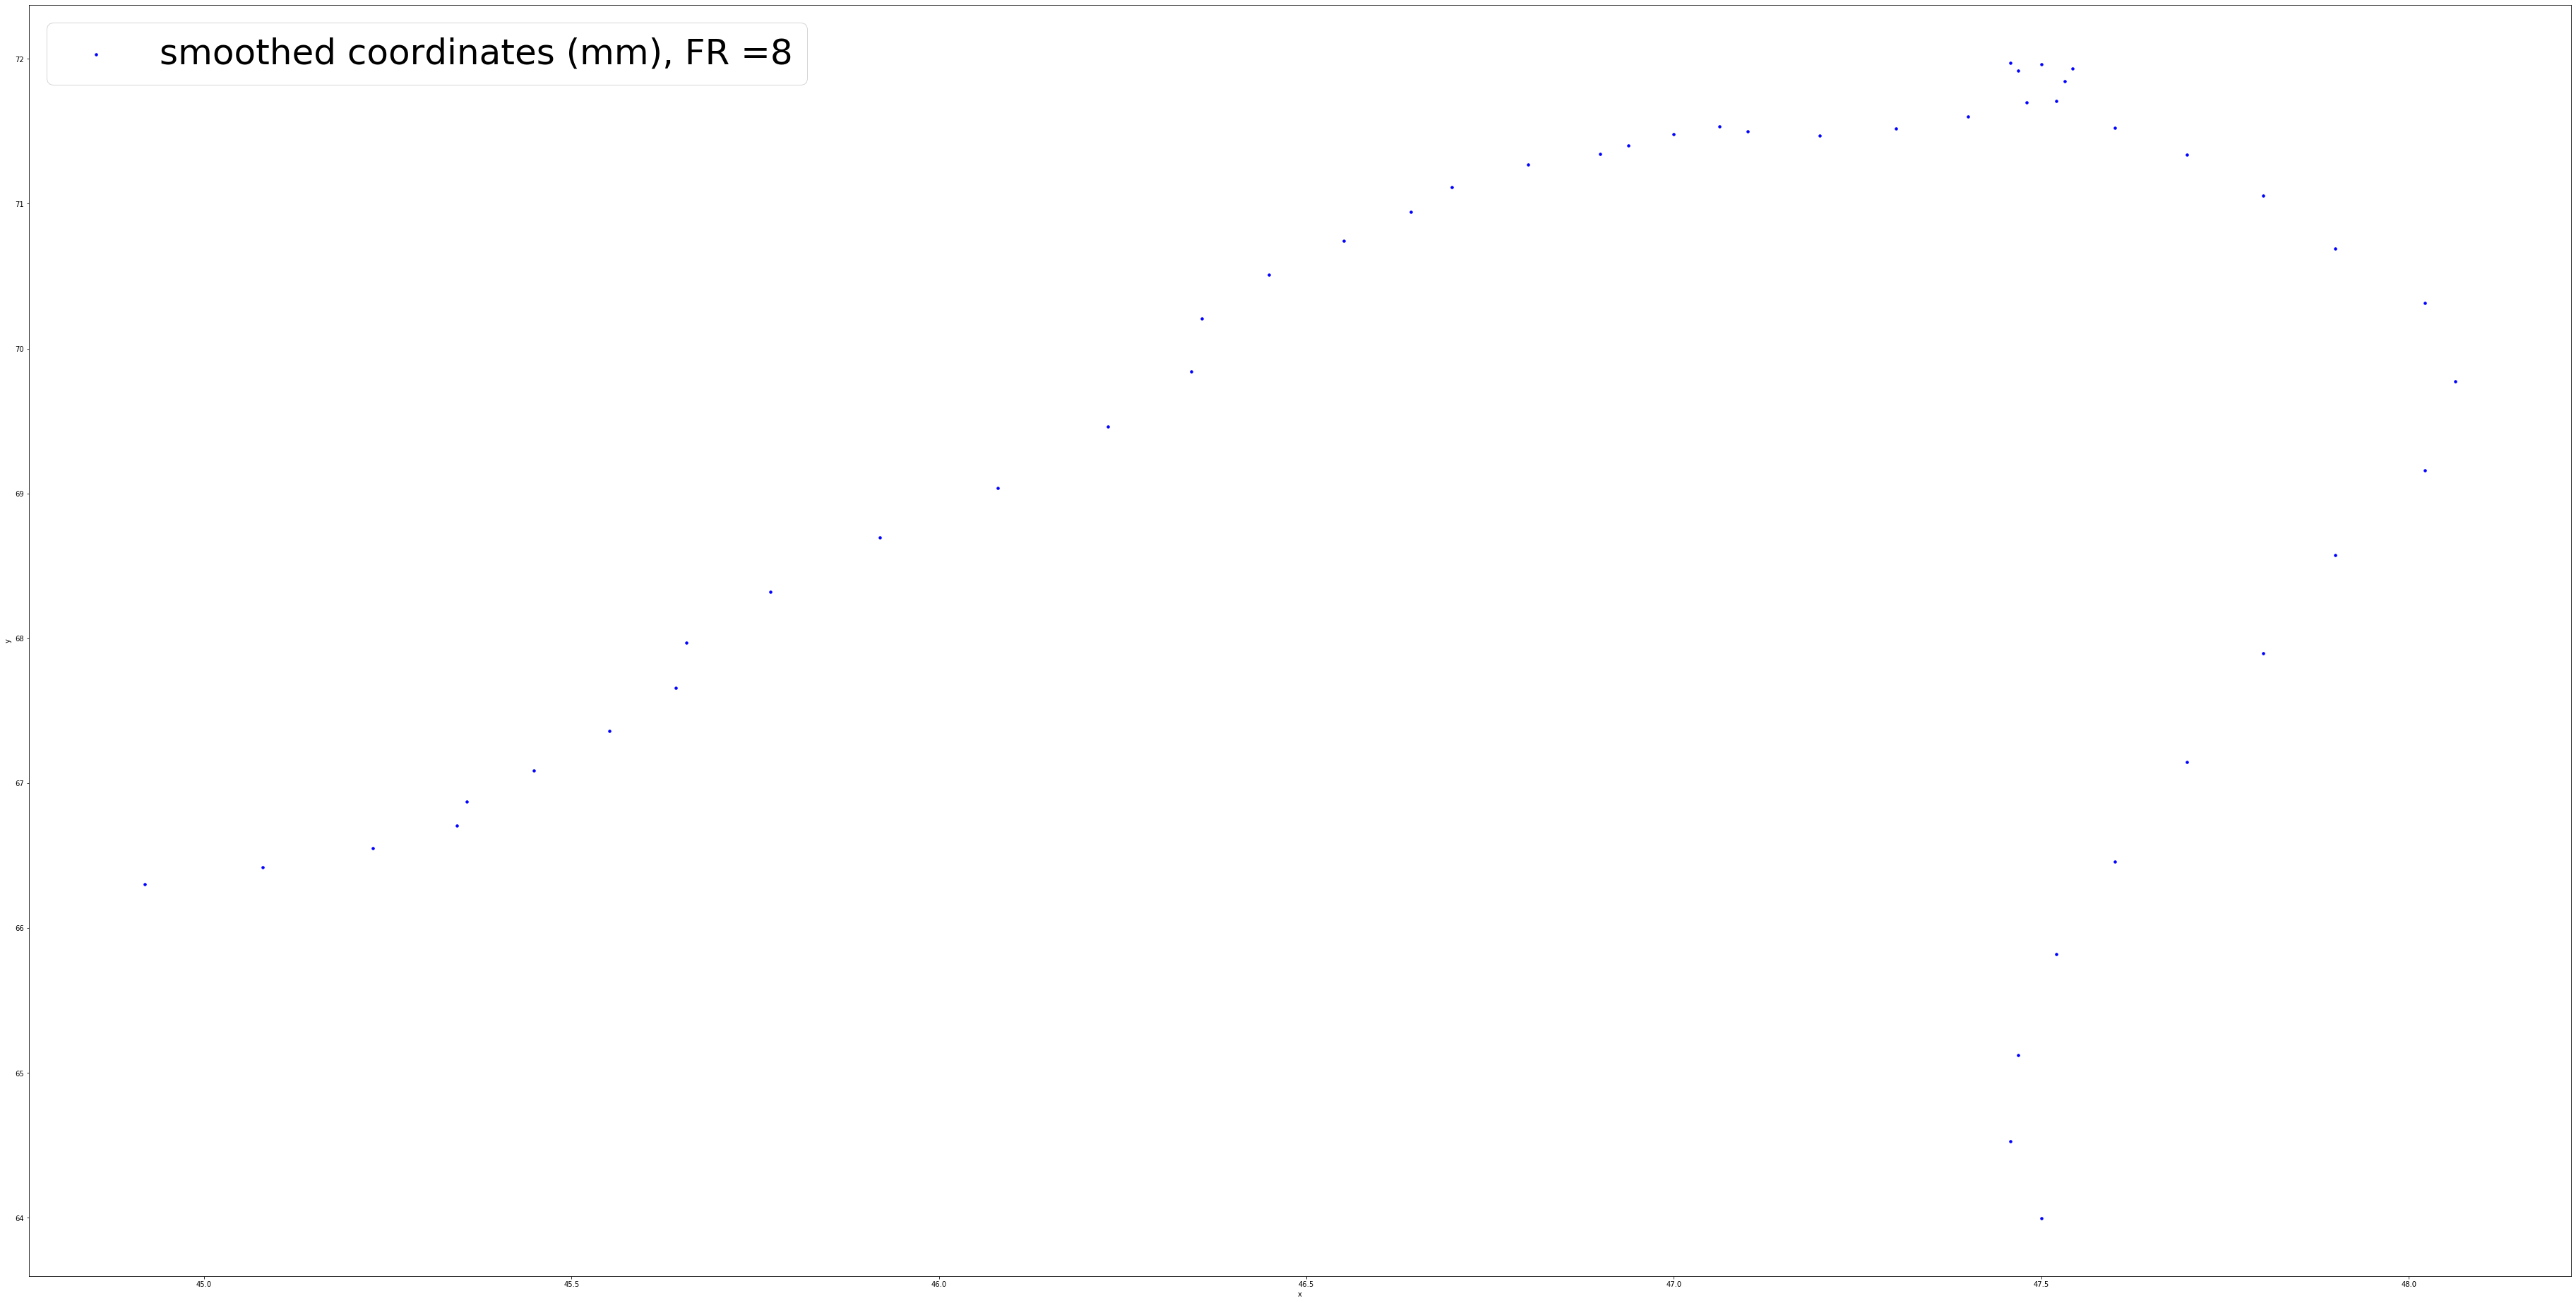

range(200, 370)
170
170


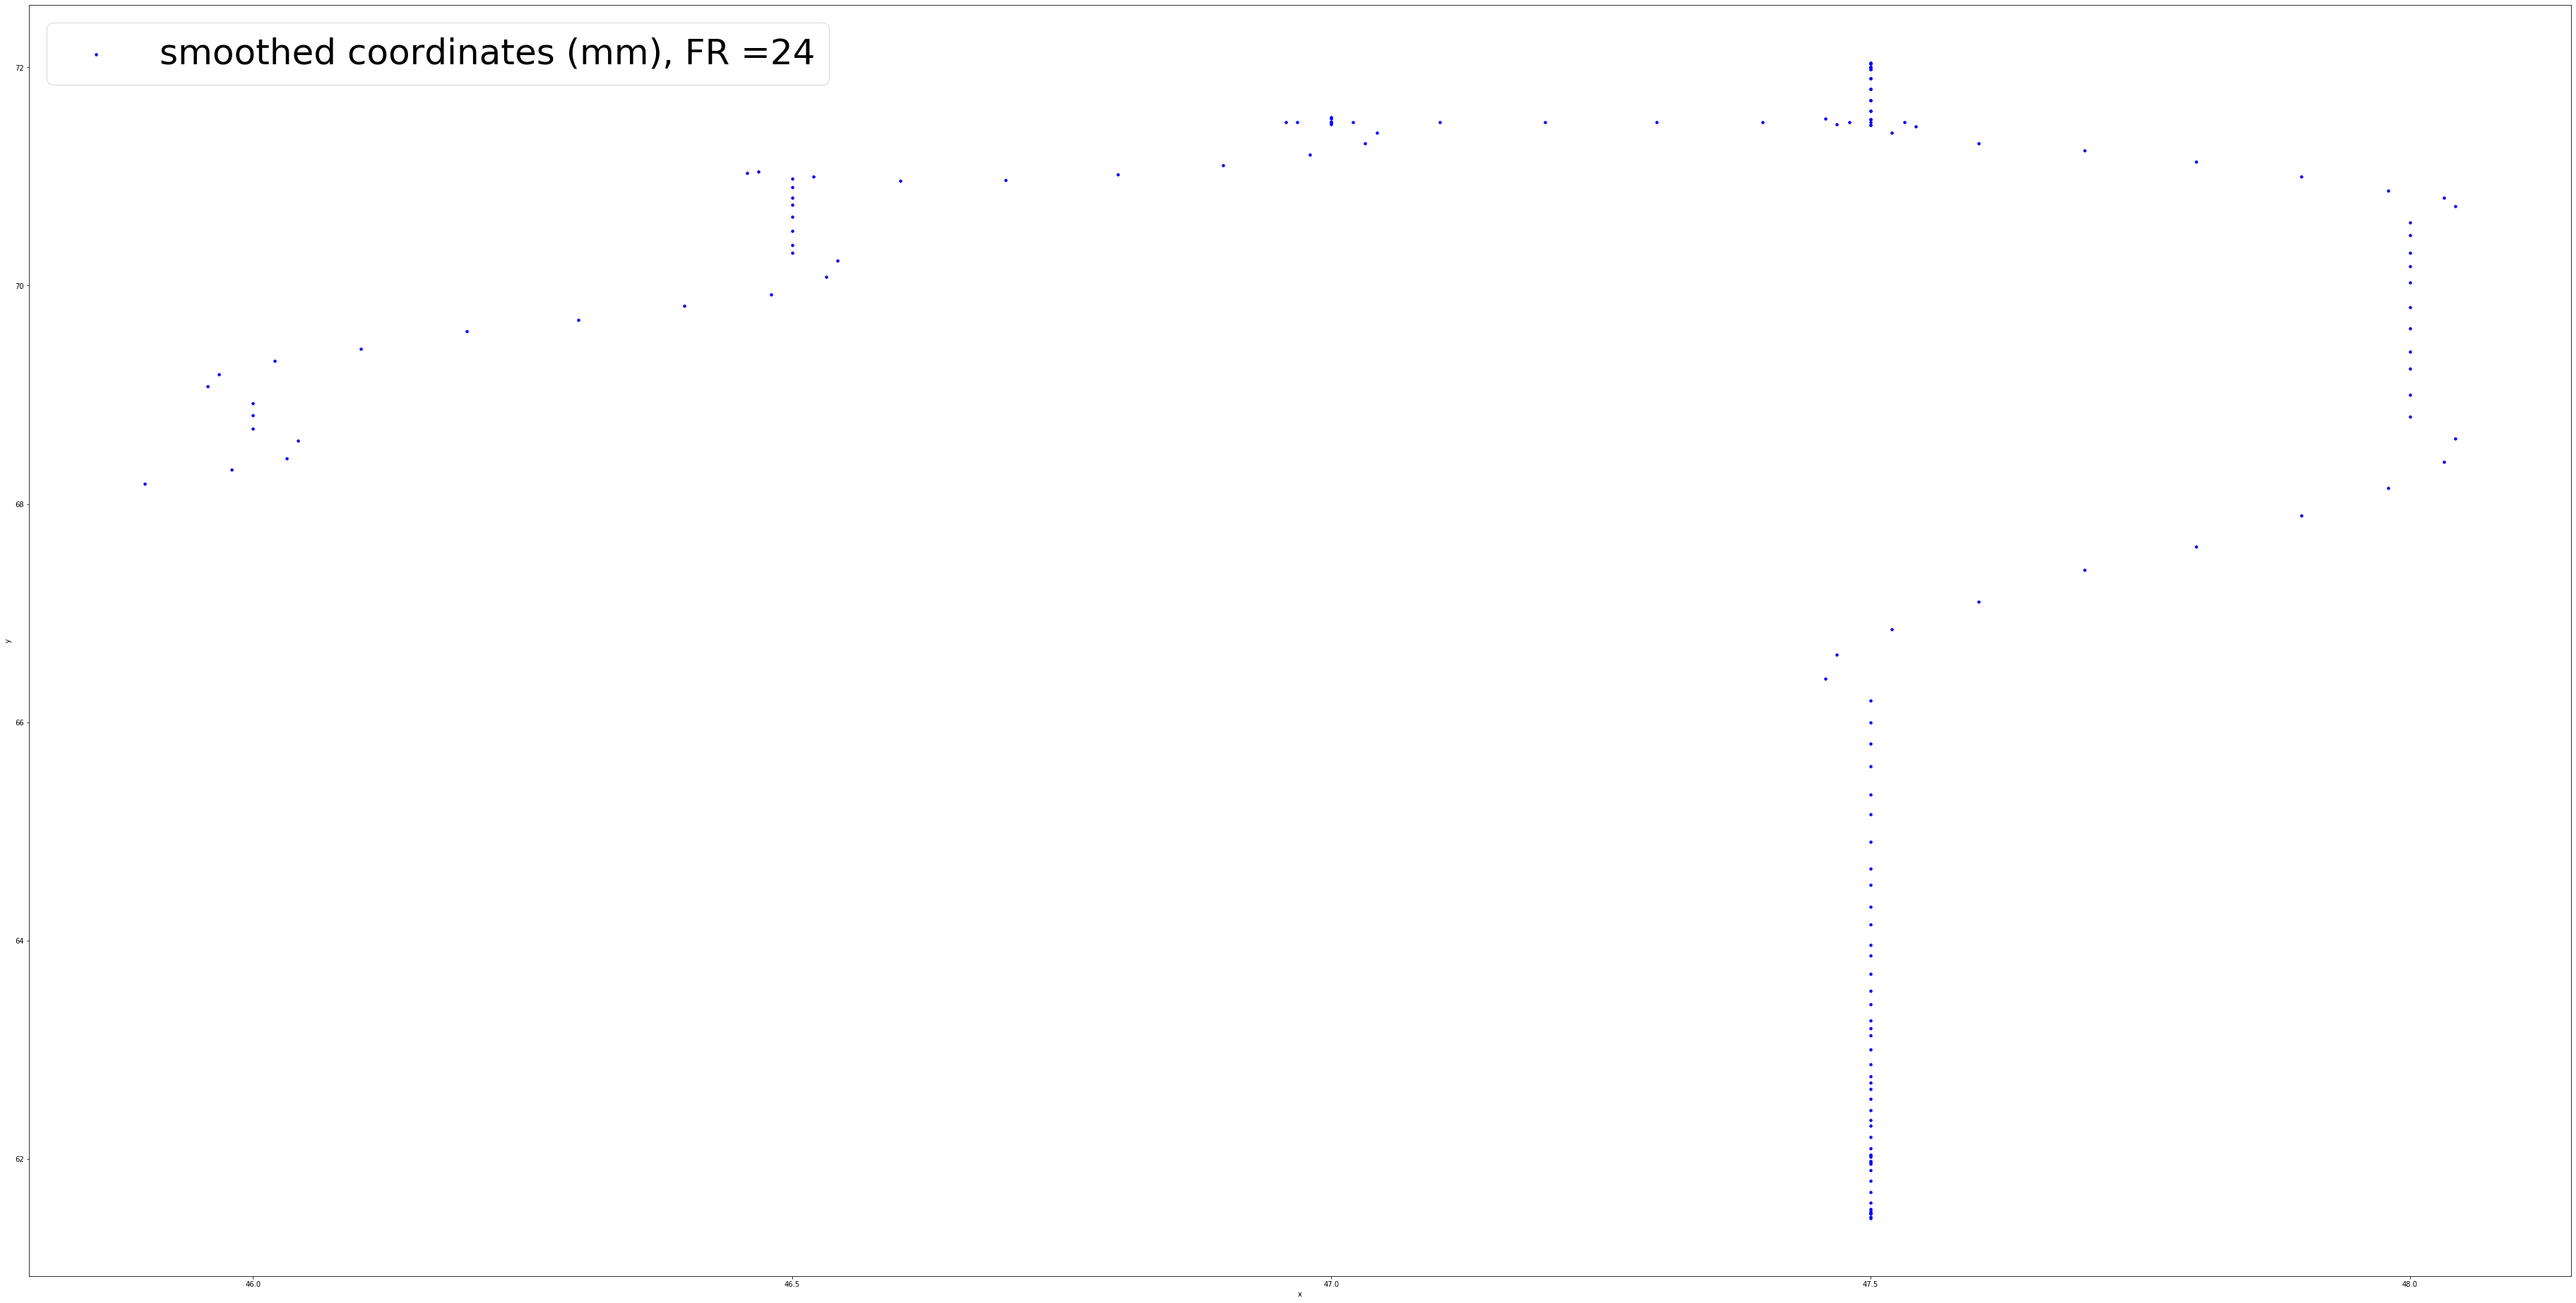

In [1]:
import os
import sys

#USER INPUT: MODIFY RELEVANT PATHS
current_path = os.getcwd()
path_to_locomotion = '/Users/karolinagrzeszkiewicz/locomotion'
path_to_results_folder = '/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/'

sys.path.remove(current_path)
sys.path.append(path_to_locomotion)

import csv
import random
import math
import operator
import numpy as np

import locomotion
import locomotion.extendedDTW as extendedDTW
import locomotion.write as write
import locomotion.animal as animal
from locomotion.animal import throwError
#from locomotion.trajectory import smooth
from scipy.signal import savgol_filter
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import locomotion.trajectory

import import_ipynb
import trajectory_new

In [2]:
info_file_low28 = "/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_lower/CRV_28.json"
info_file_high28 = "/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_higher/CRV_28.json"
animals_low28 = animal.getAnimalObjs( info_file_low28 )
animals_high28 = animal.getAnimalObjs( info_file_high28 )

LOG: Extracting coordinates for Animal CRV_28_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_28_TEST_00...
LOG: Extracting coordinates for Animal CRV_28_TEST_01...
LOG: Extracting coordinates for Animal CRV_28_TEST_02...
LOG: Extracting coordinates for Animal CRV_28_TEST_03...
LOG: Extracting coordinates for Animal CRV_28_TEST_04...
LOG: Extracting coordinates for Animal CRV_28_TEST_05...
LOG: Extracting coordinates for Animal CRV_28_TEST_06...
LOG: Extracting coordinates for Animal CRV_28_TEST_07...
LOG: Extracting coordinates for Animal CRV_28_TEST_08...
LOG: Extracting coordinates for Animal CRV_28_TEST_09...
LOG: Extracting coordinates for Animal CRV_28_TEST_10...
LOG: Extracting coordinates for Animal CRV_28_TEST_11...
LOG: Extracting coordinates for Animal CRV_28_TEST_12...
LOG: Extracting coordinates for Animal CRV_28_TEST_13...
LOG: Extracting coordinates for Animal CRV_28_TEST_14...
LOG: Extracting coordinates for Animal CRV_28_TEST_15...
LOG: Extracting coordinates f

range(223, 270)
47
47


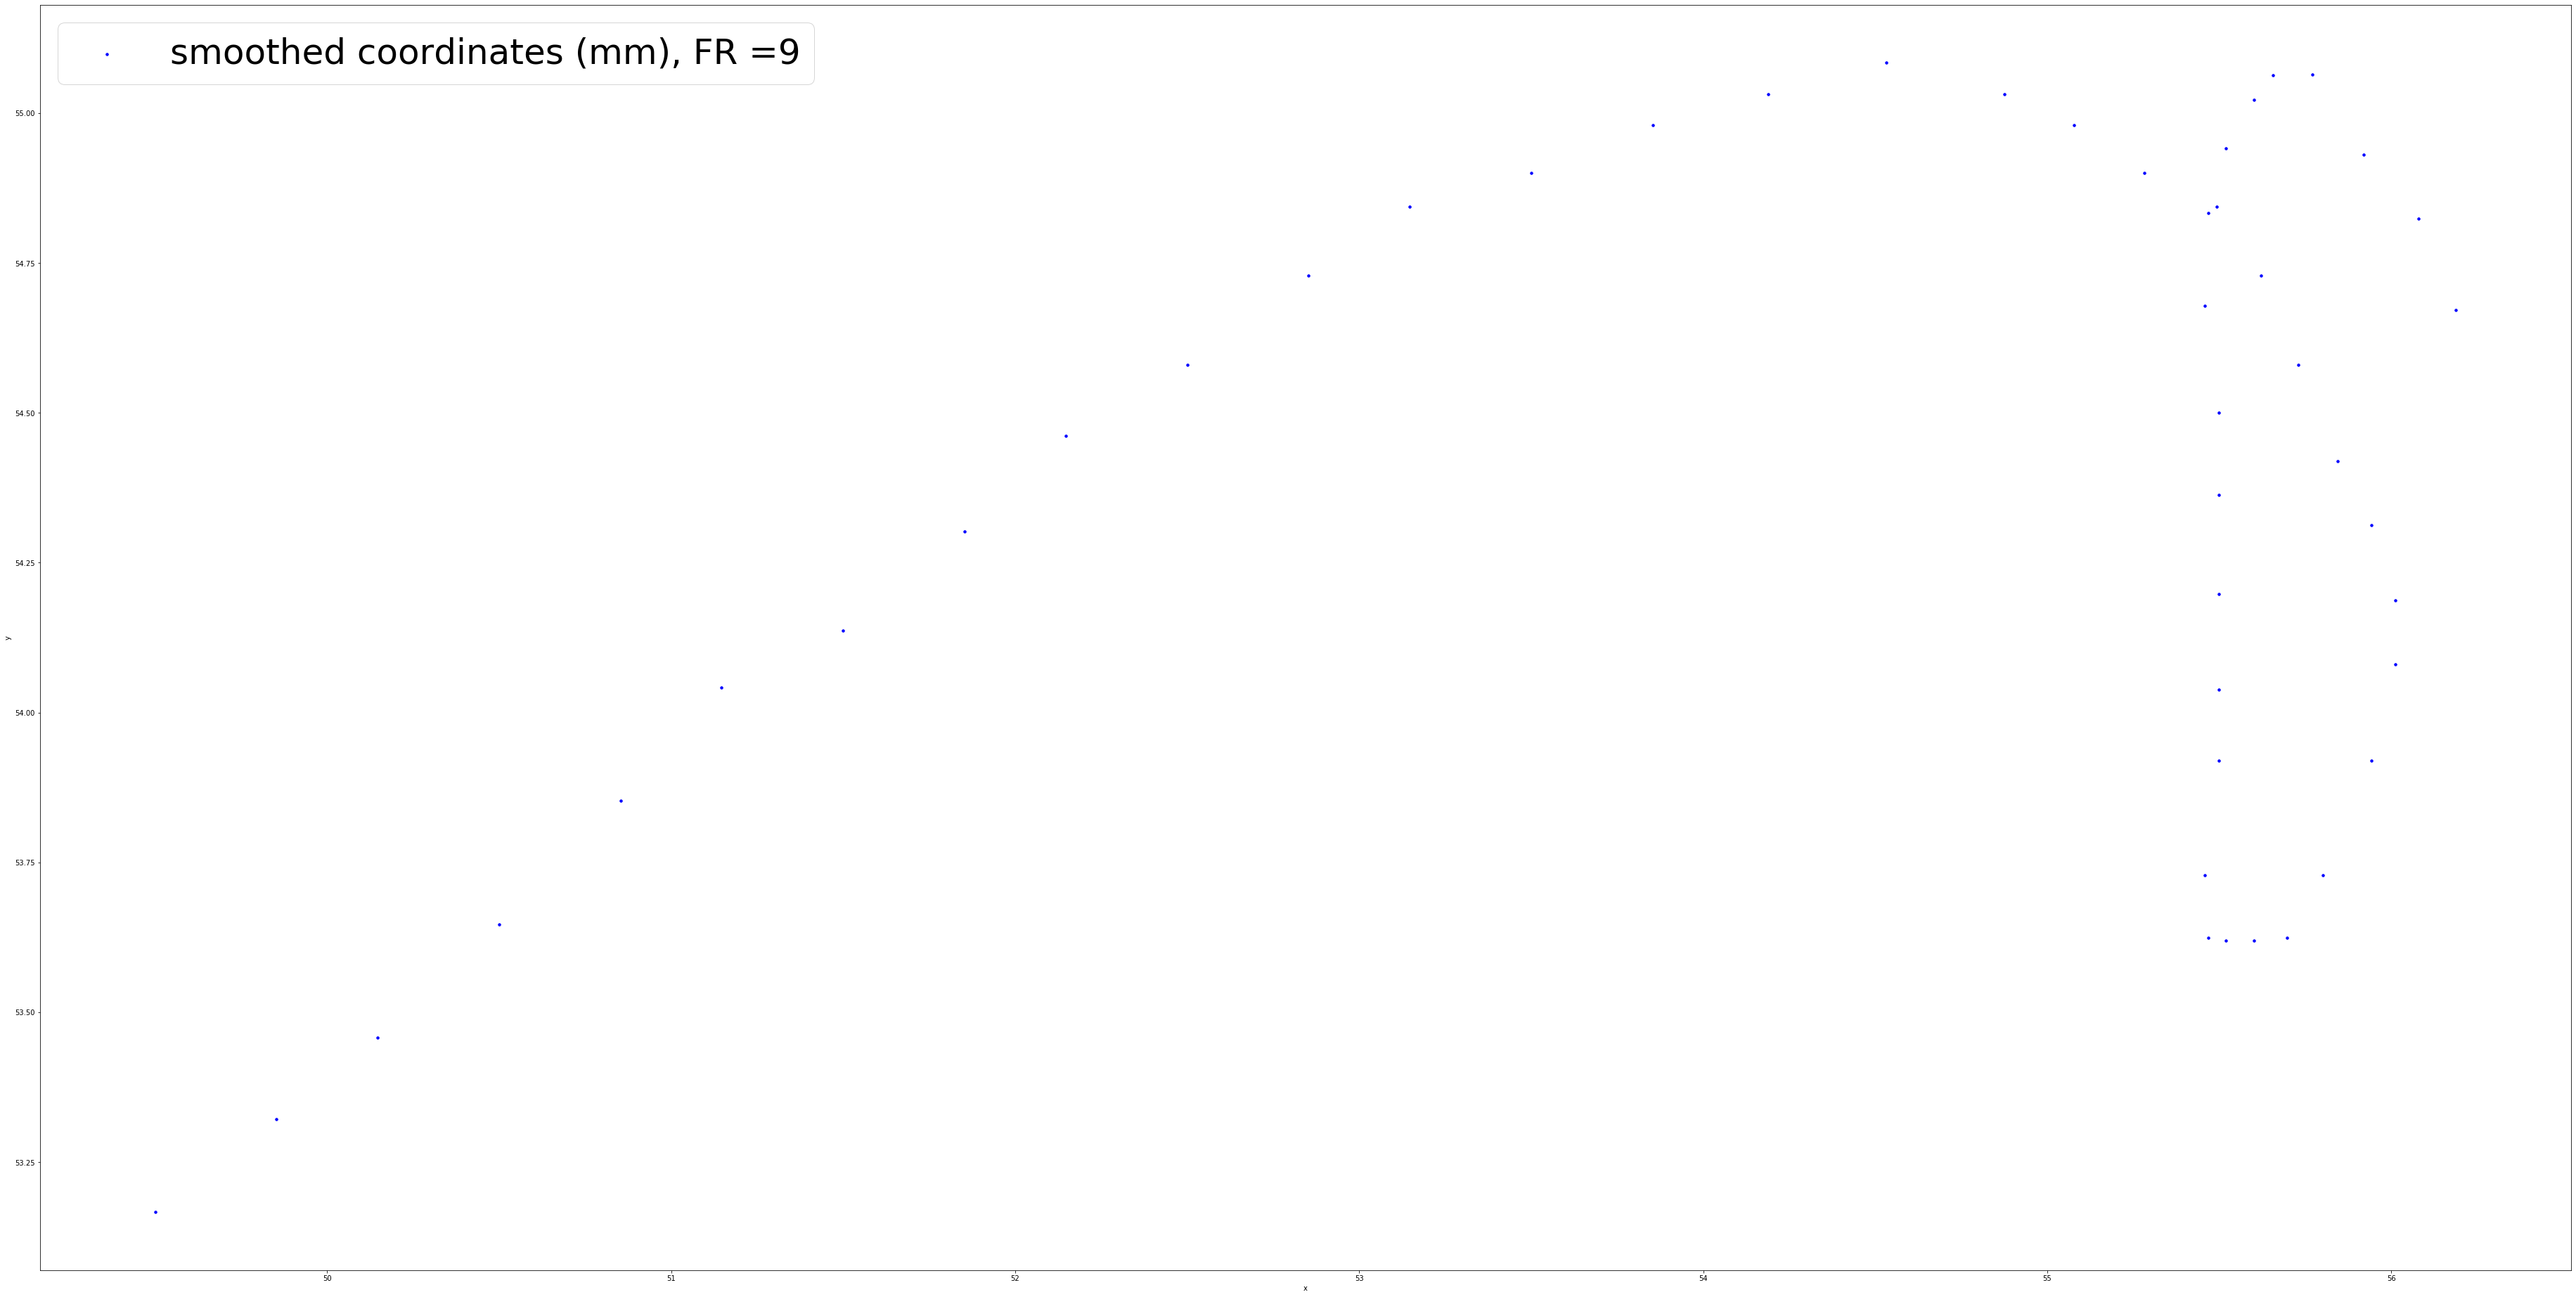

range(248, 300)
52
52


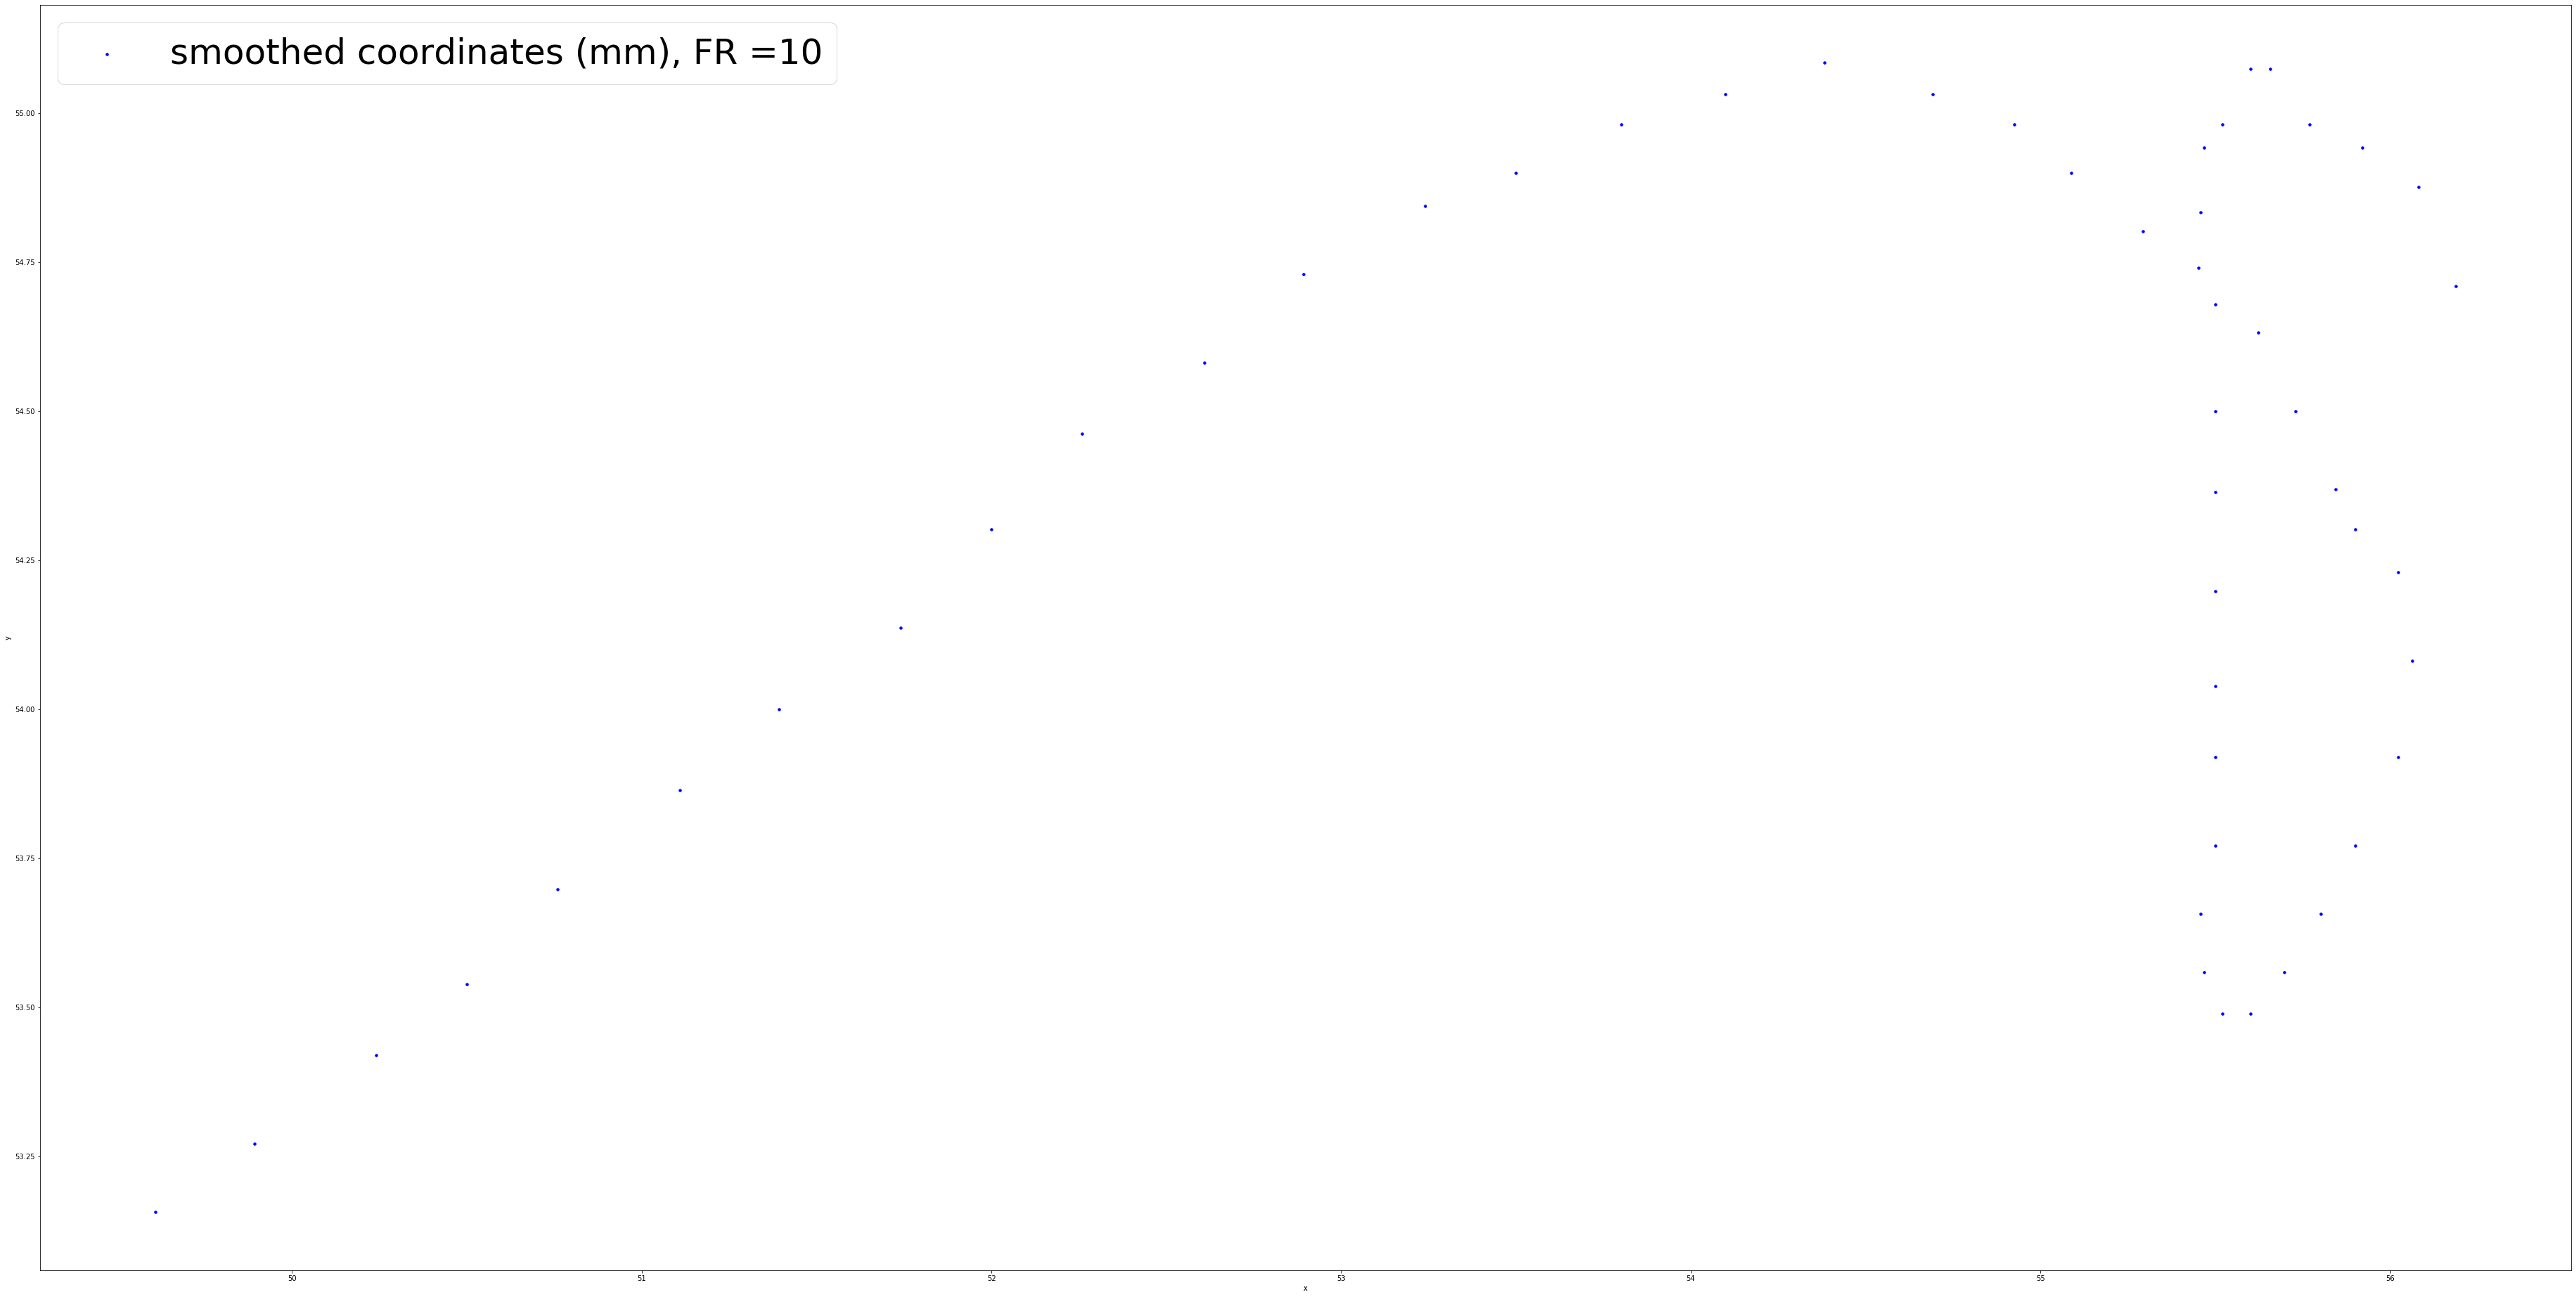

range(595, 719)
124
124


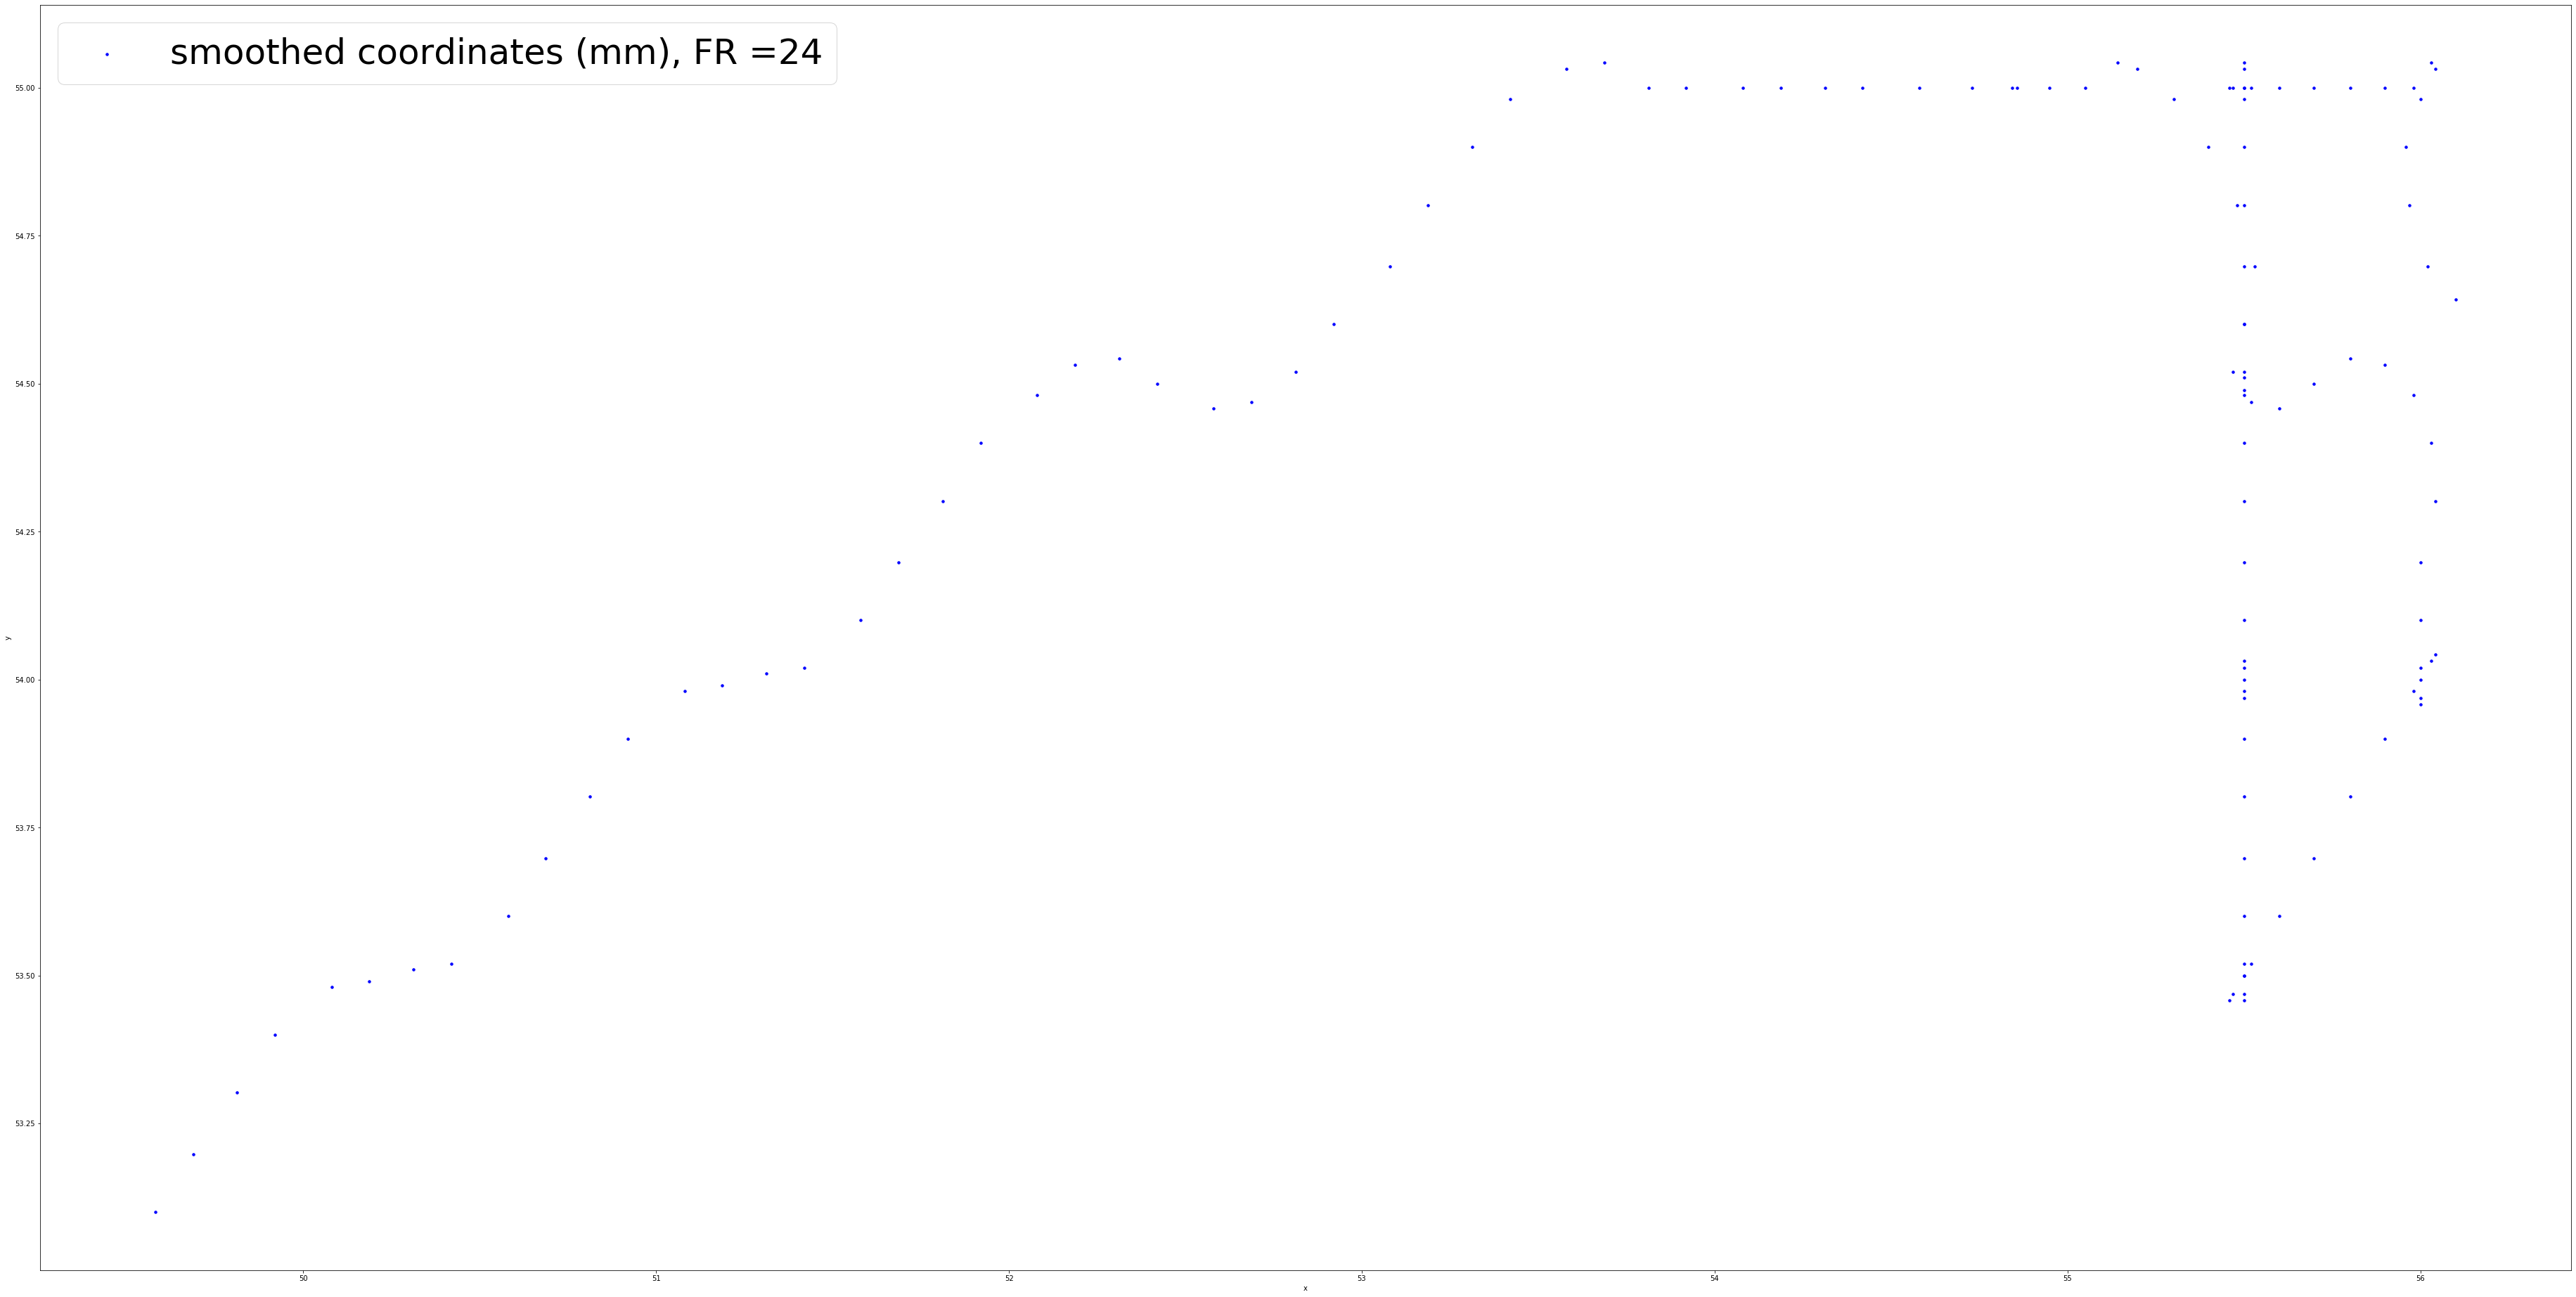

In [3]:
trajectory_new.PlotCurve(animals_low28[4], zoom_in_for_fr_range = range(223,270))
trajectory_new.PlotCurve(animals_low28[5],  zoom_in_for_fr_range = range(248,300))
trajectory_new.PlotCurve(animals_high28[0],  zoom_in_for_fr_range = range(595,719))

In [4]:
(9/24)*595

223.125

In [5]:
#for curve 34 there was different smoothing for each FR for the specified range
info_file_low34 = "/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_lower/CRV_34.json"
info_file_high34 = "/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_higher/CRV_34.json"
animals_low34 = animal.getAnimalObjs( info_file_low34 )
animals_high34 = animal.getAnimalObjs( info_file_high34 )

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

range(50, 93)
43
43


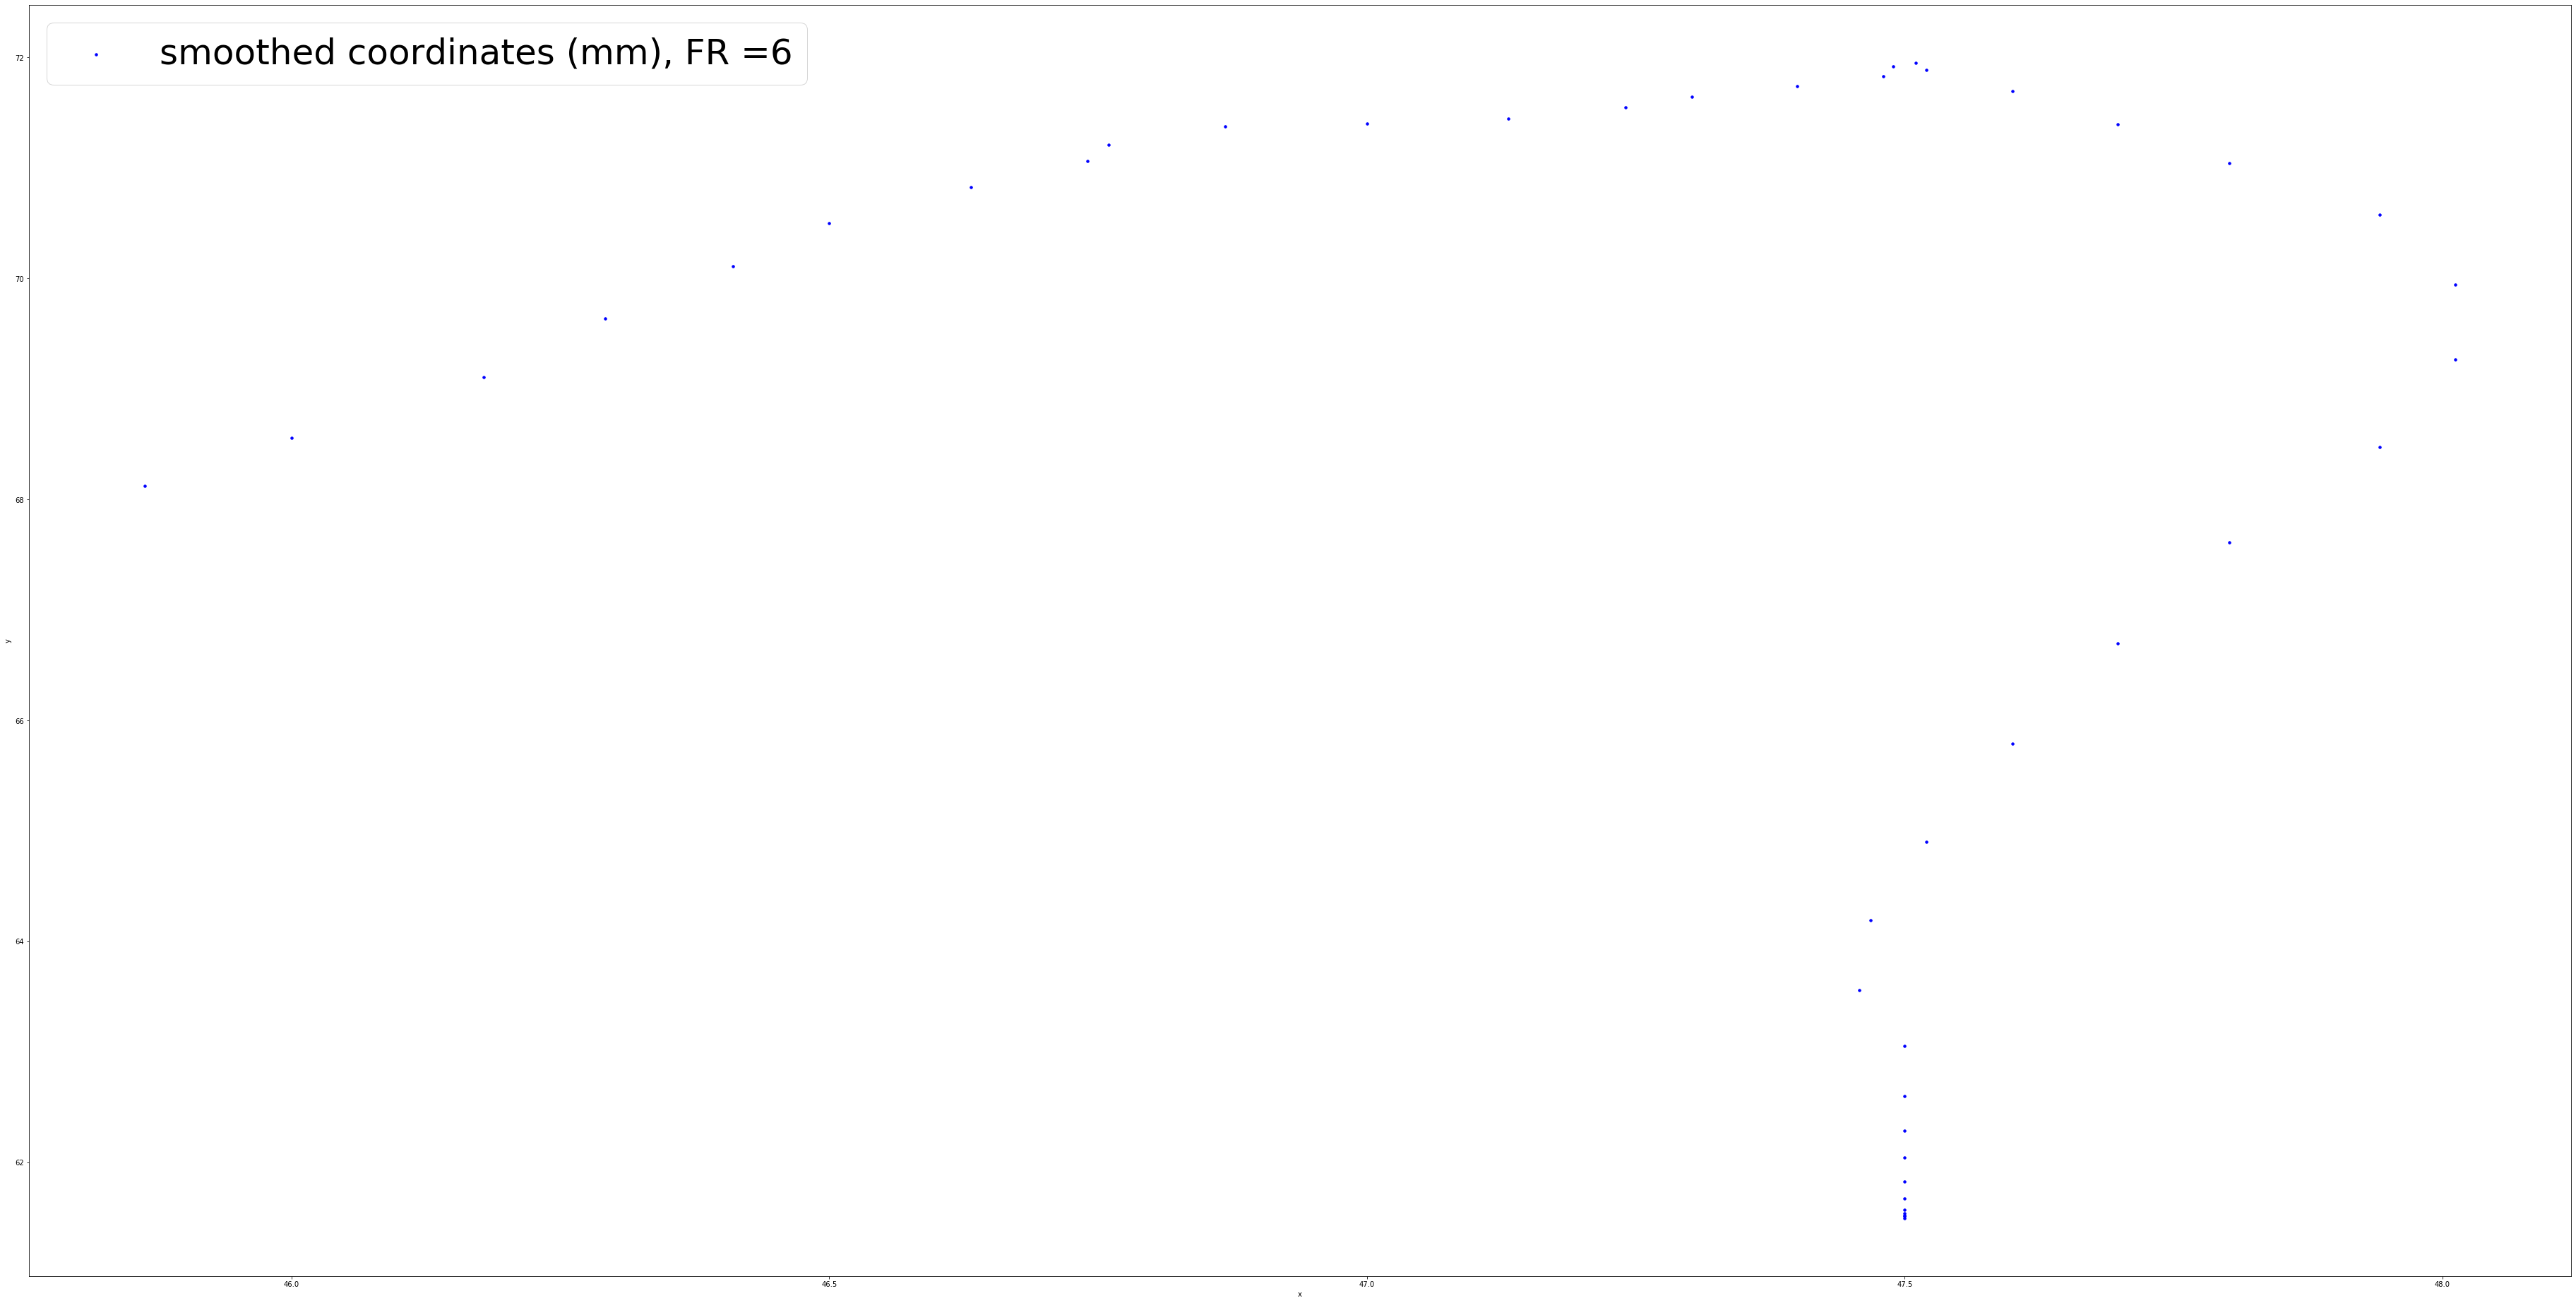

range(58, 108)
50
50


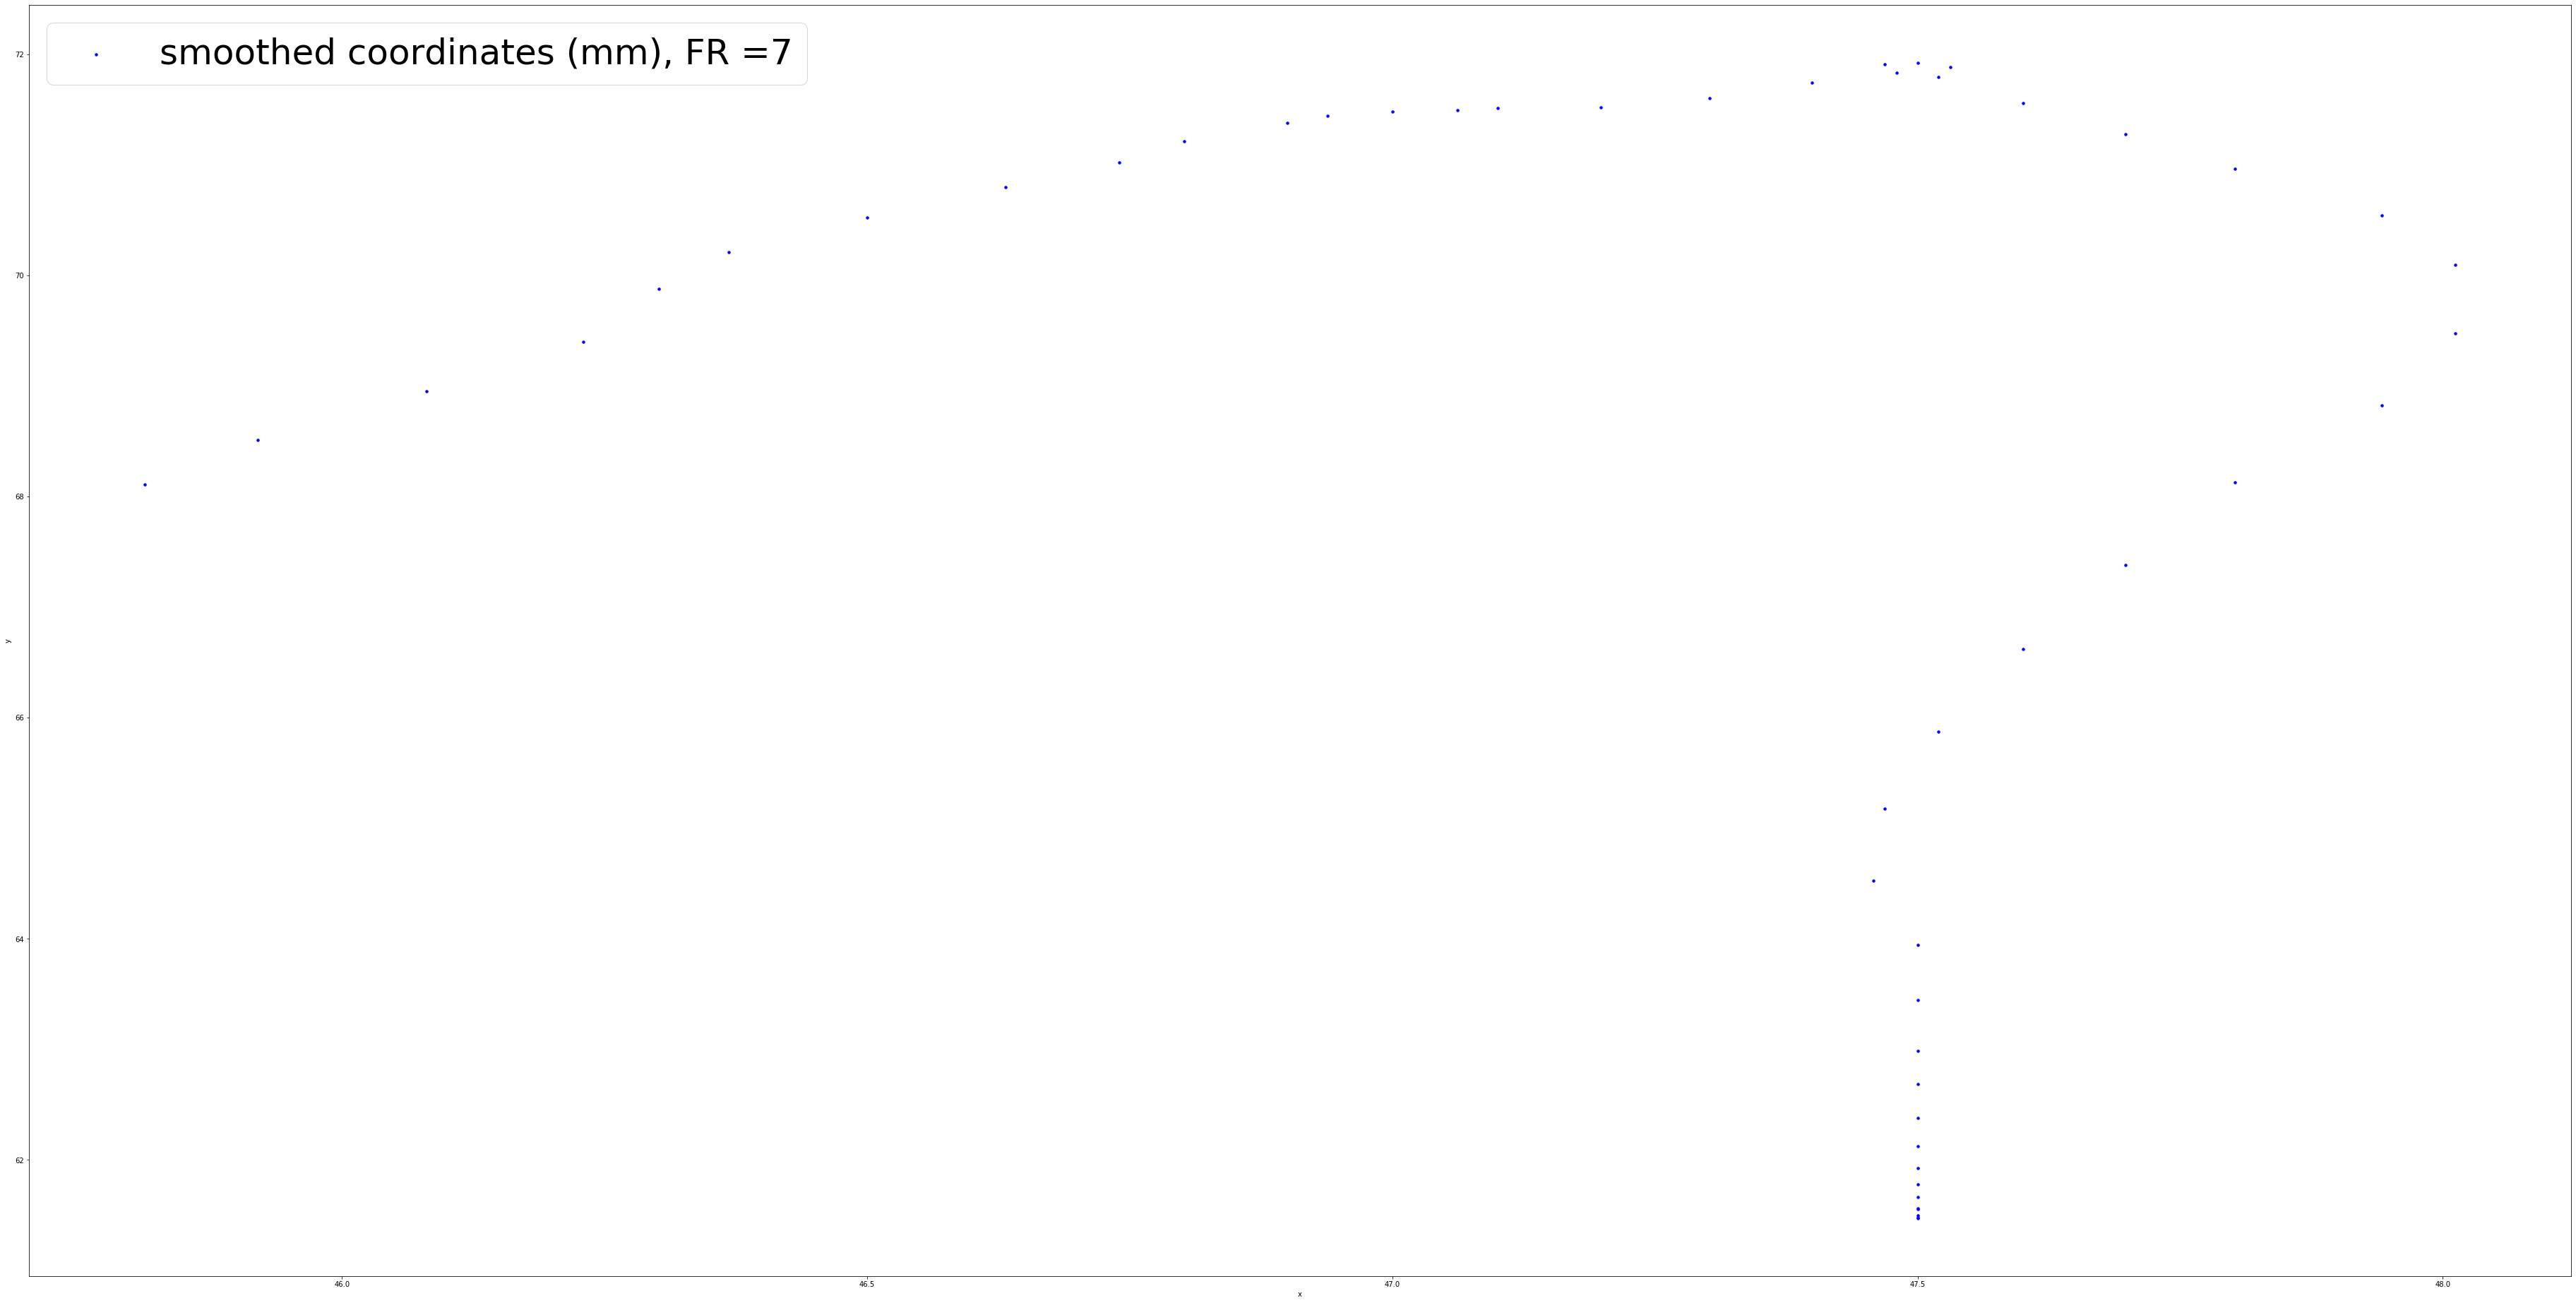

range(200, 370)
170
170


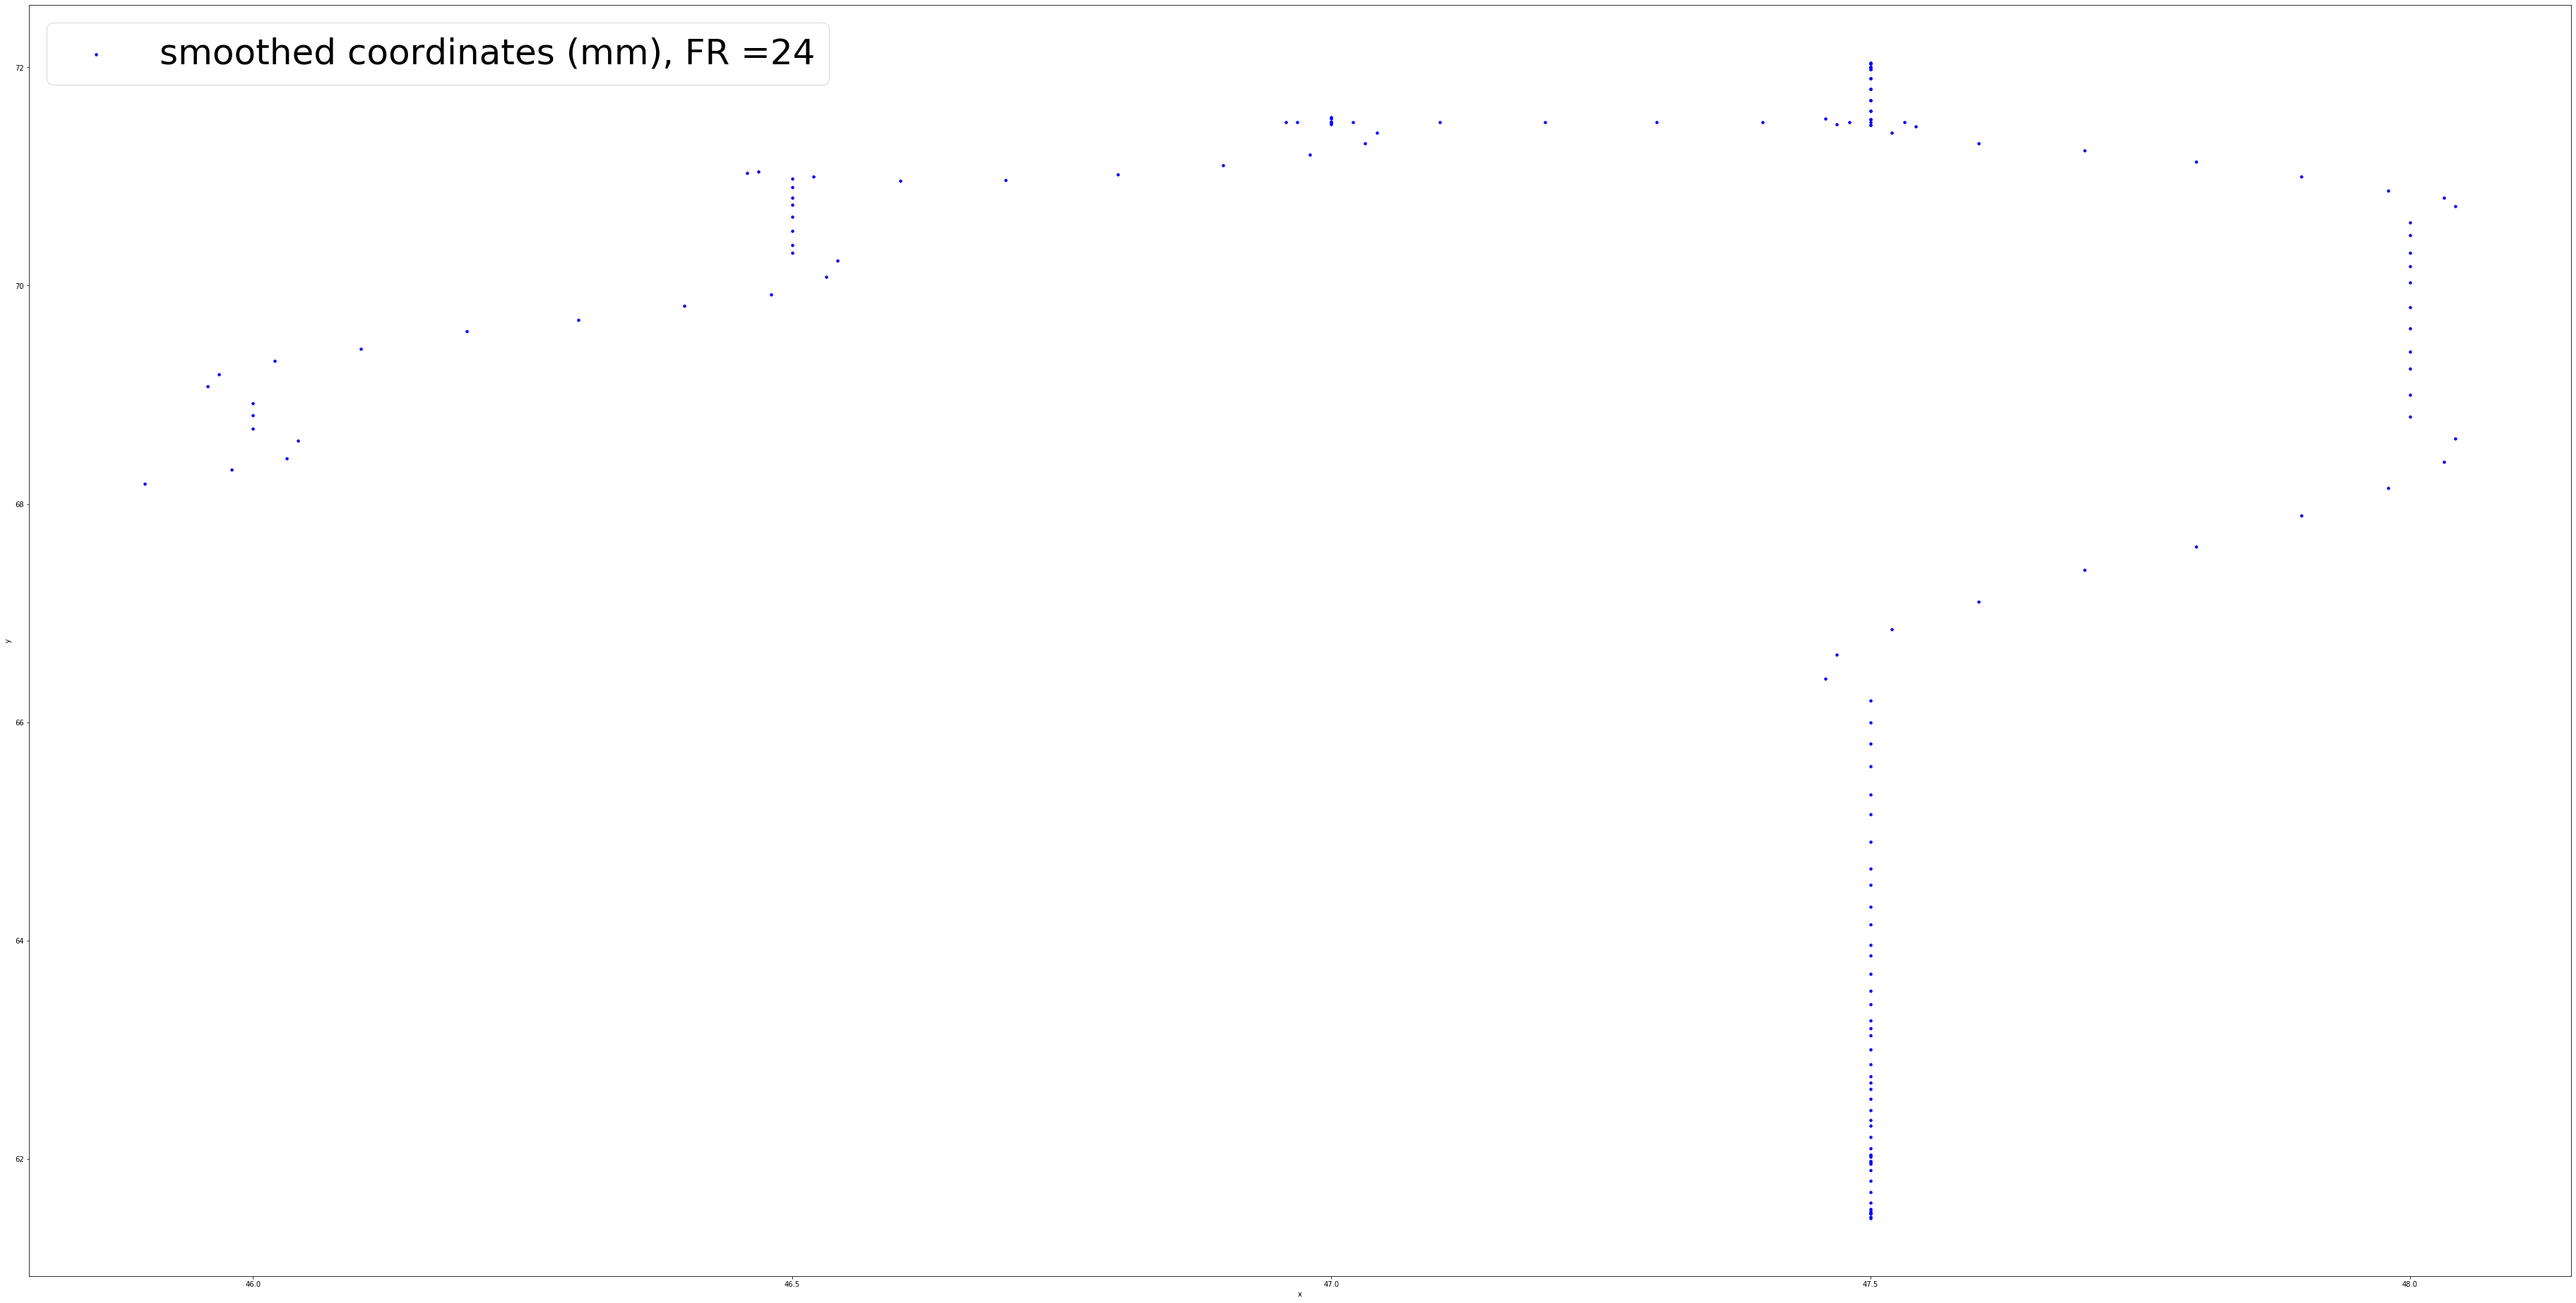

In [6]:
trajectory_new.PlotCurve(animals_low34[1], zoom_in_for_fr_range = range(50,93))
trajectory_new.PlotCurve(animals_low34[2], zoom_in_for_fr_range = range(58,108))
trajectory_new.PlotCurve(animals_high34[0], zoom_in_for_fr_range = range(200,370))

range(50, 93)
43
43


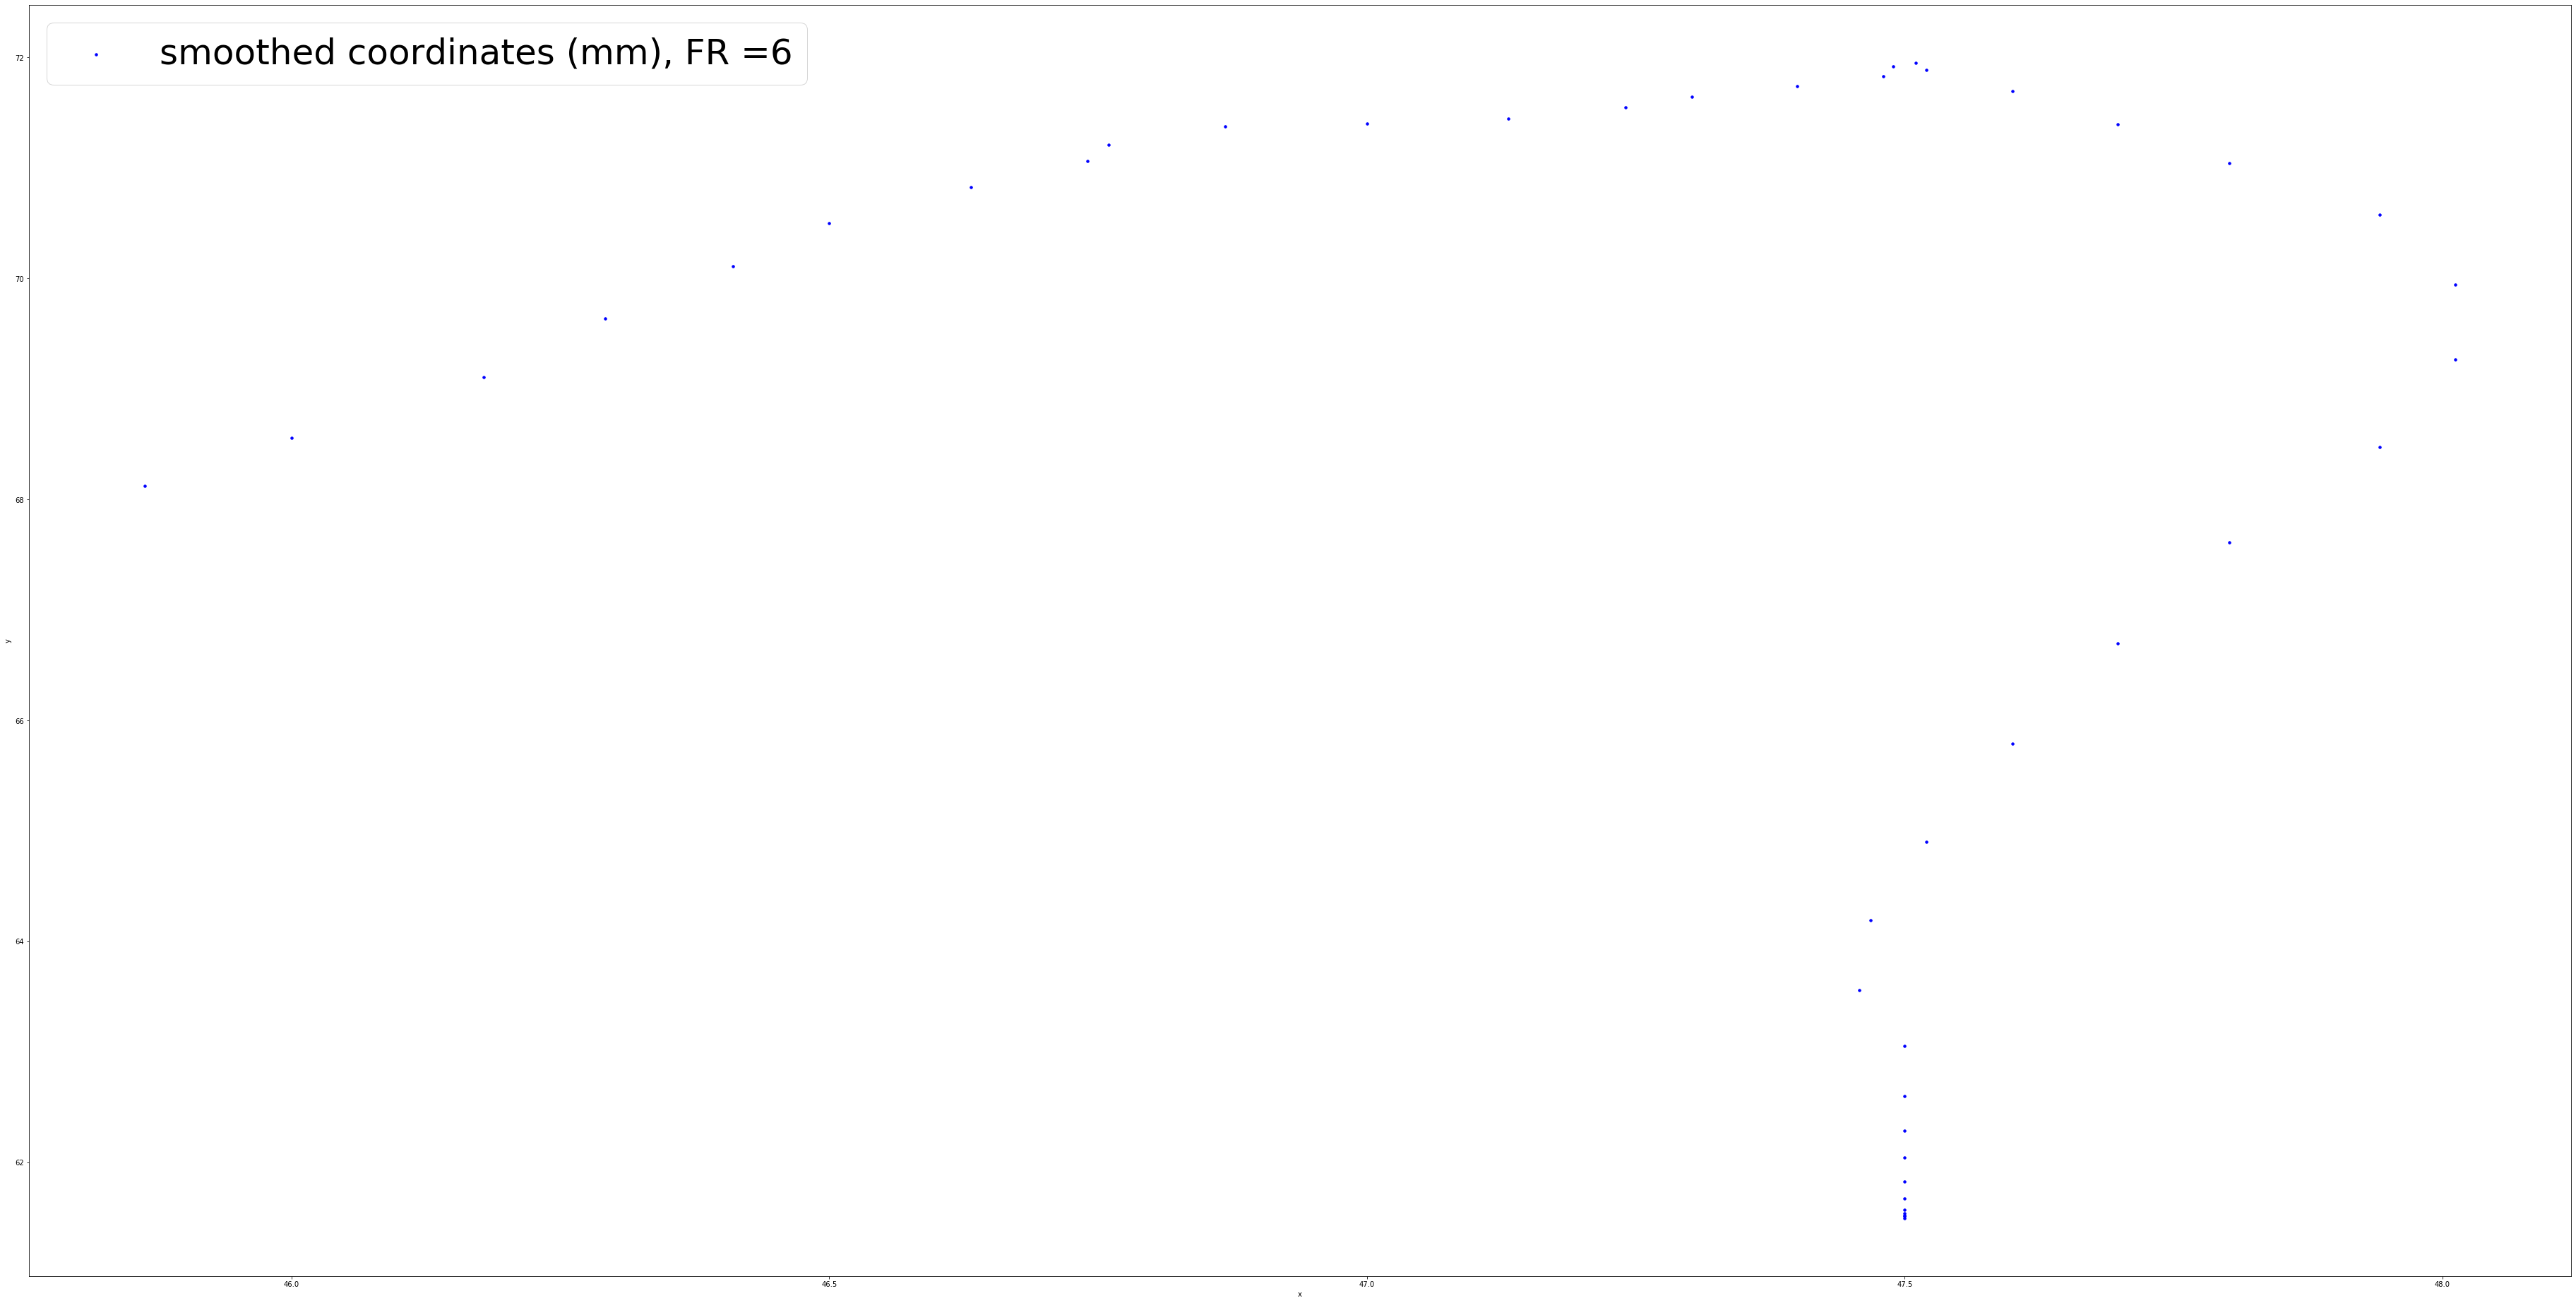

range(58, 108)
50
50


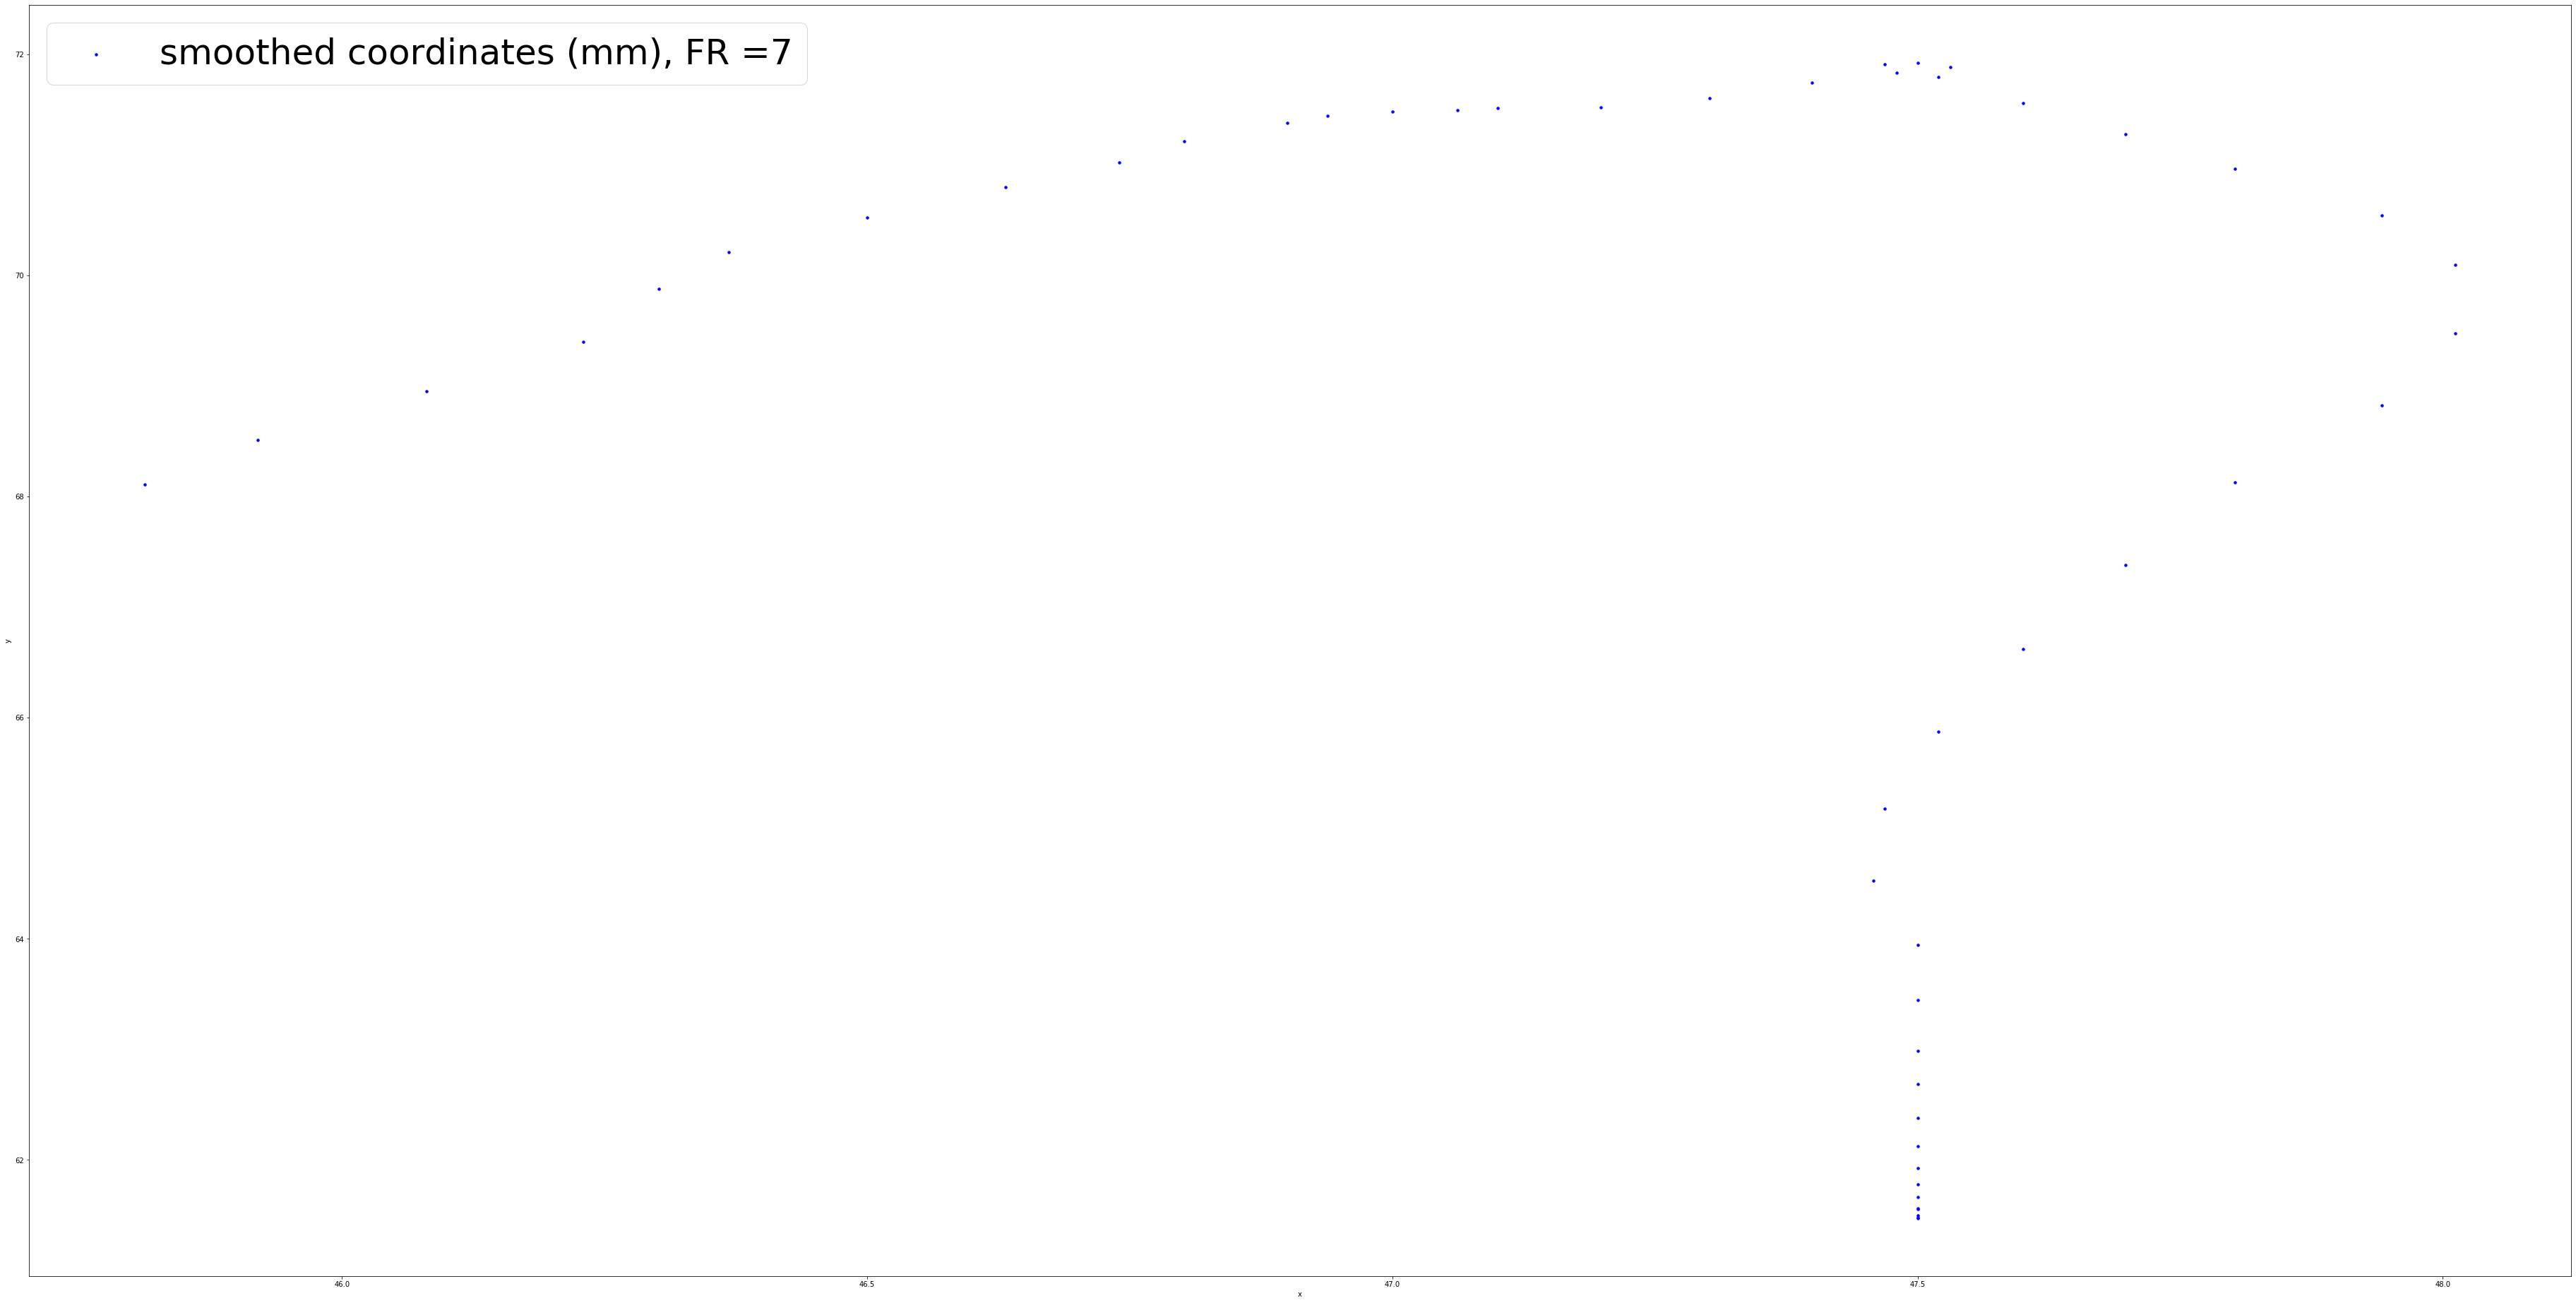

range(200, 370)
170
170


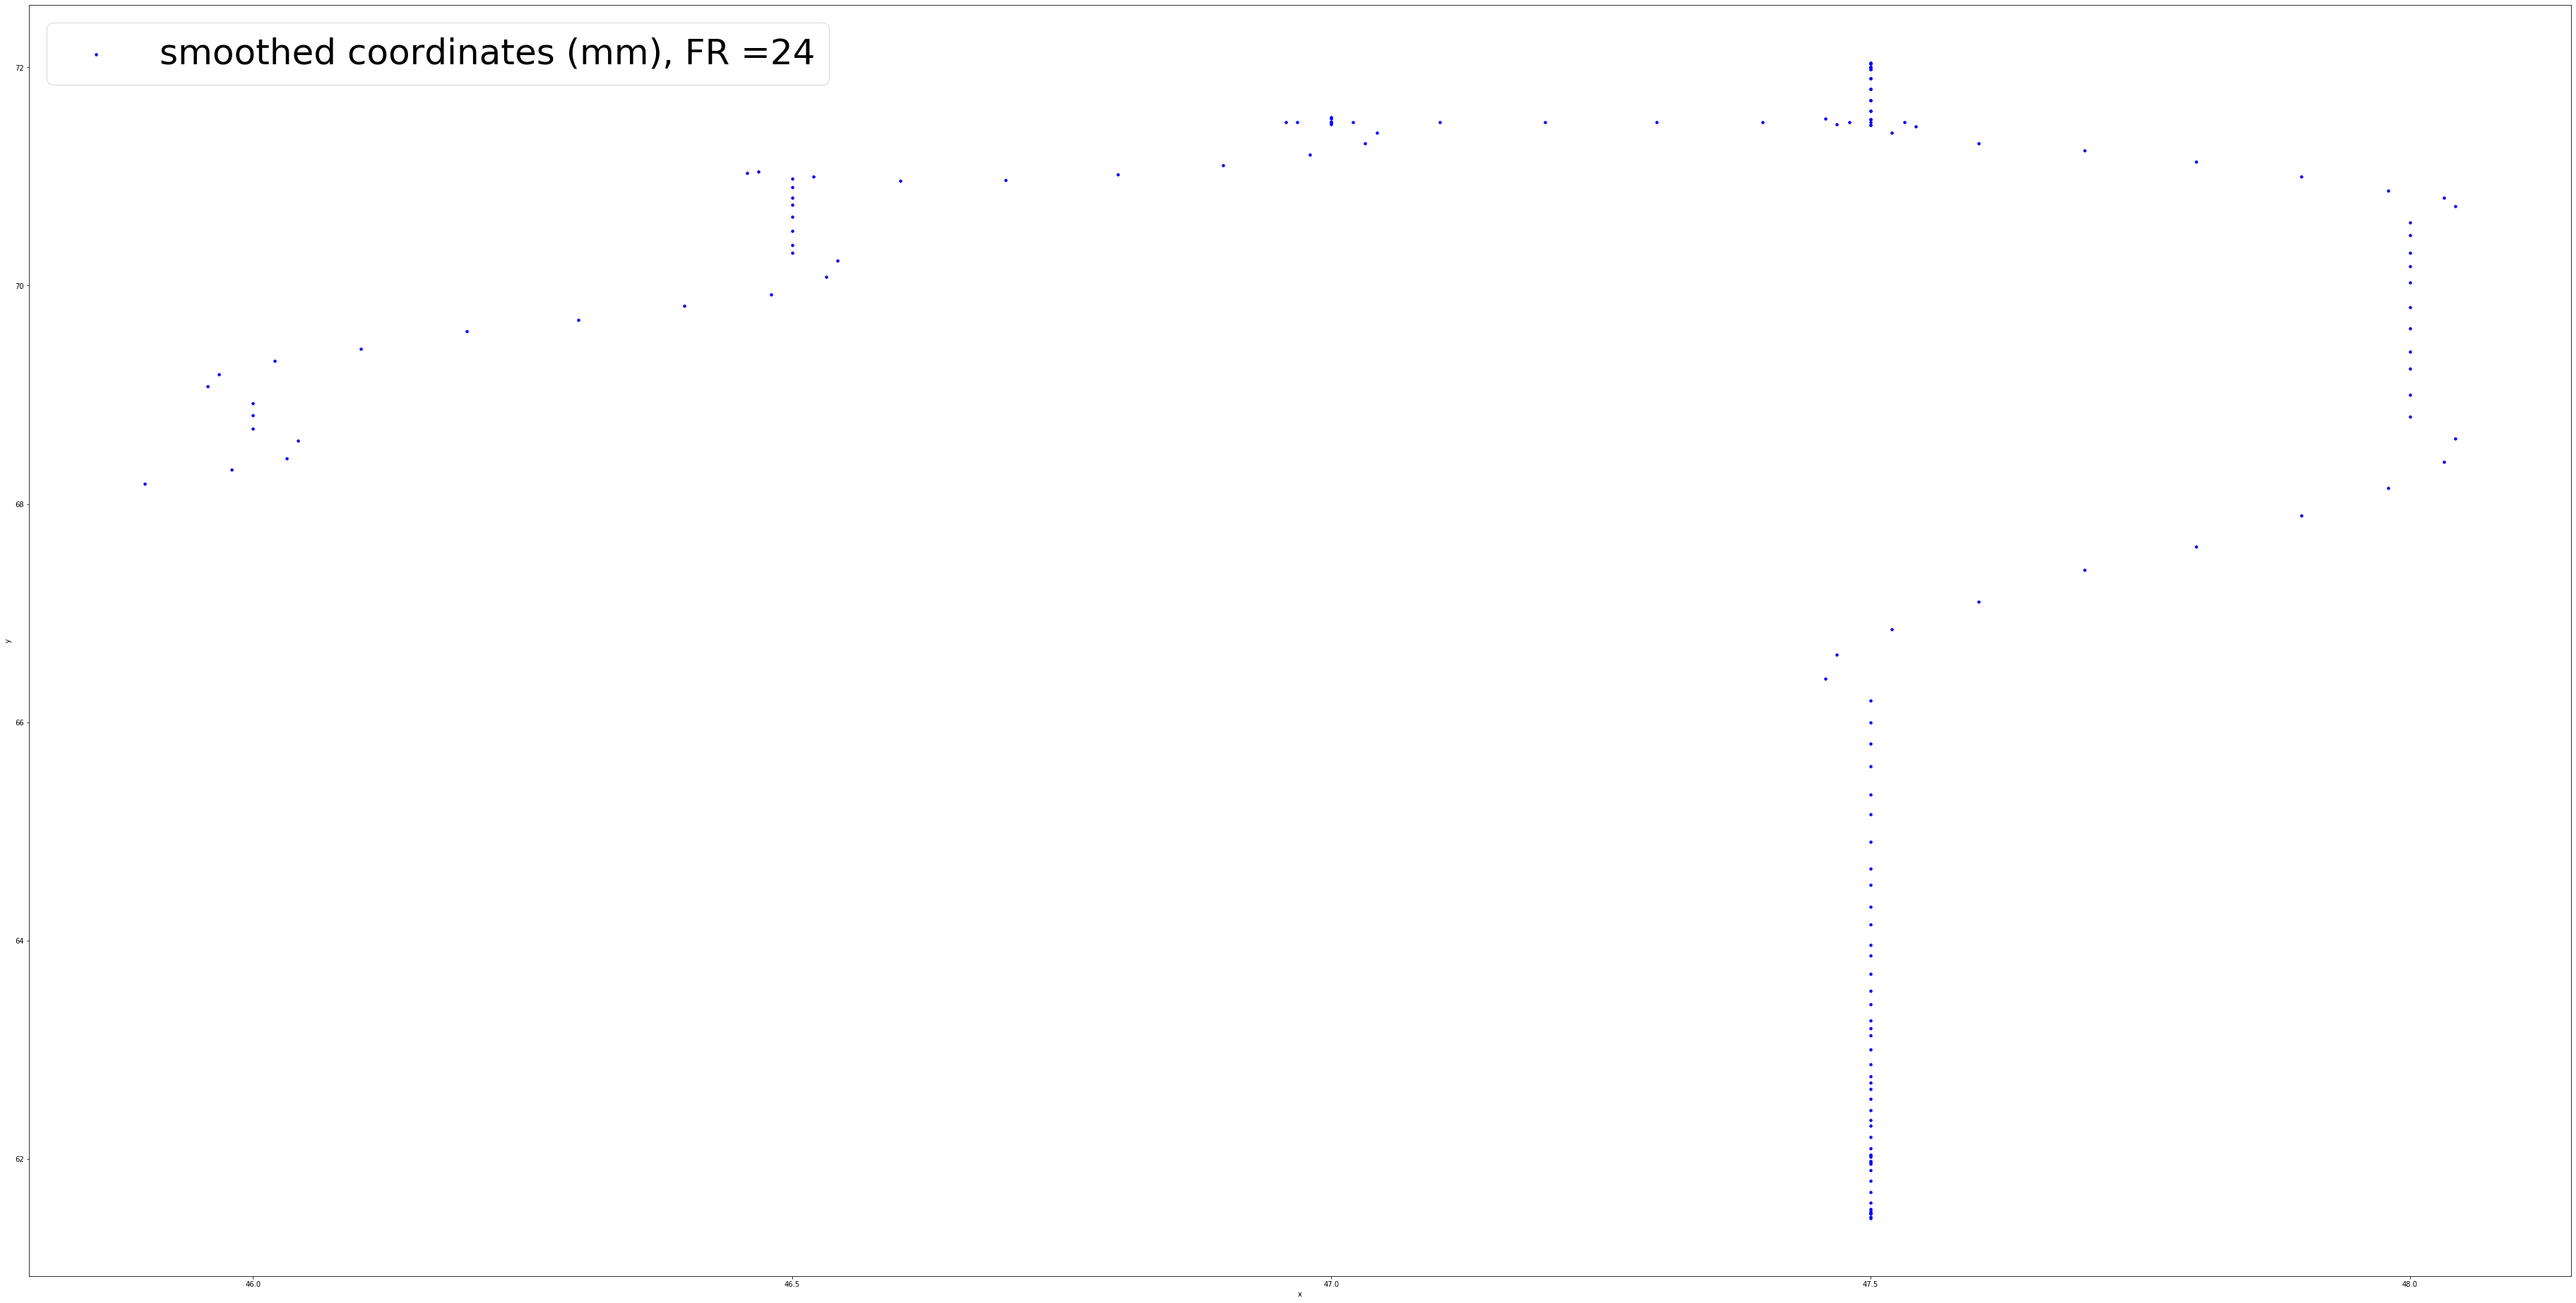

In [7]:
trajectory_new.PlotCurve(animals_low34[1], zoom_in_for_fr_range = range(50,93))
trajectory_new.PlotCurve(animals_low34[2], zoom_in_for_fr_range = range(58,108))
trajectory_new.PlotCurve(animals_high34[0], zoom_in_for_fr_range = range(200,370))

range(50, 93)
43
43


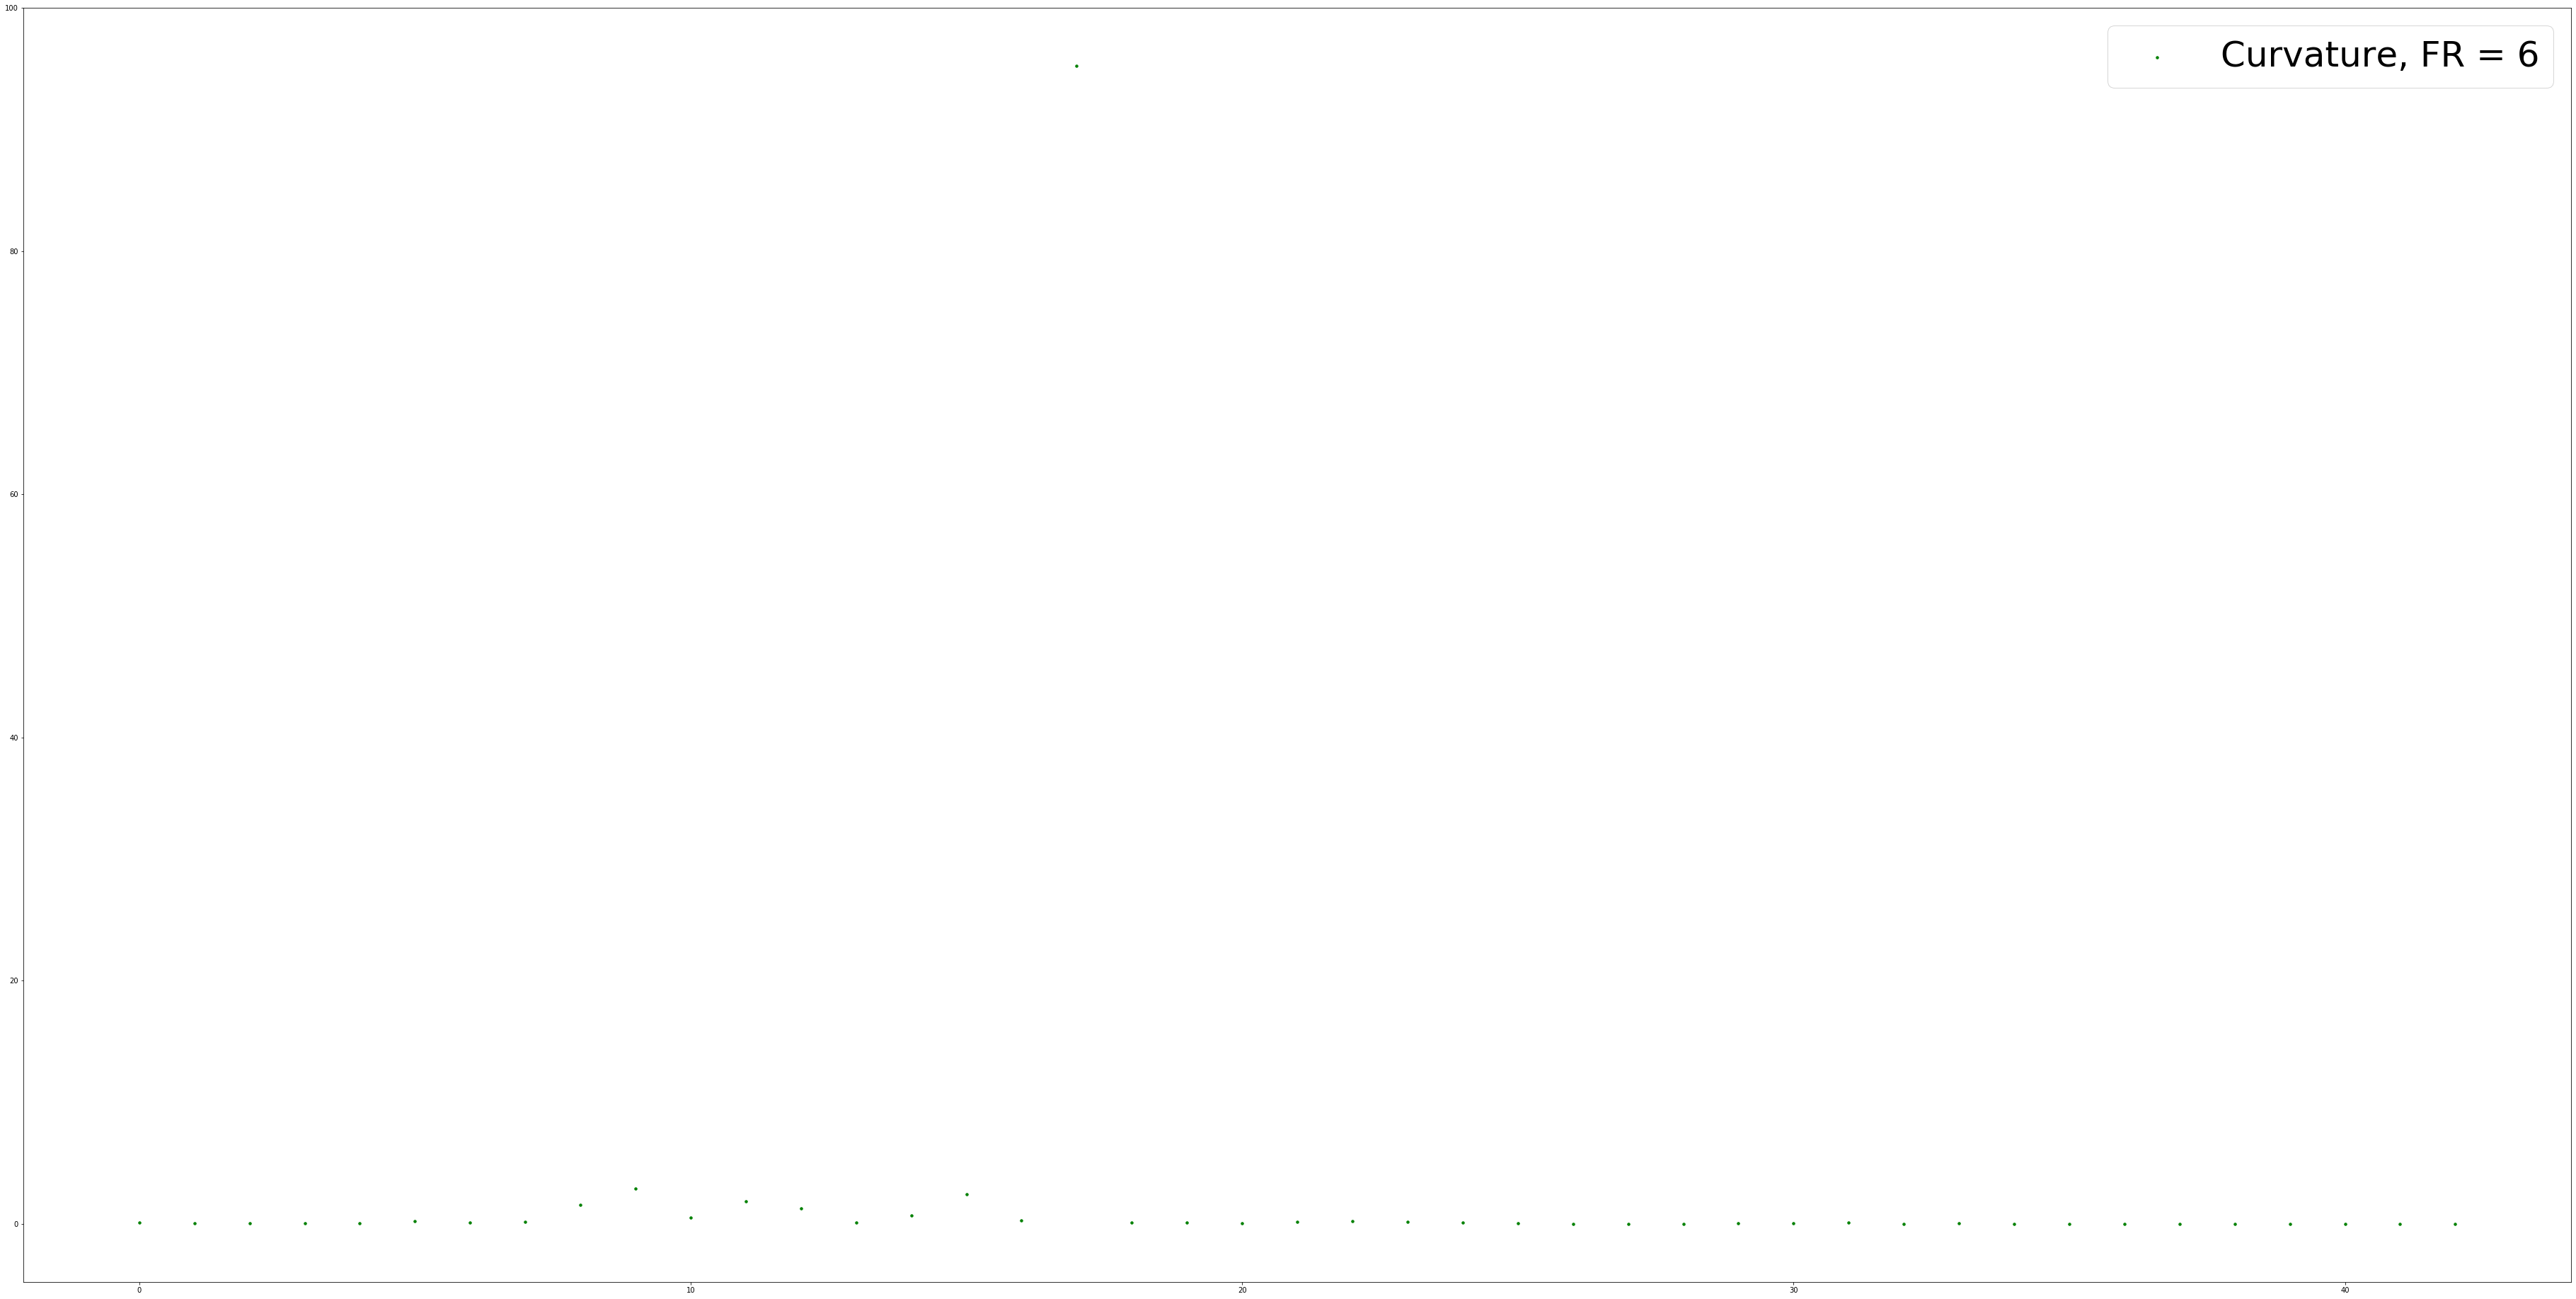

range(58, 108)
50
50


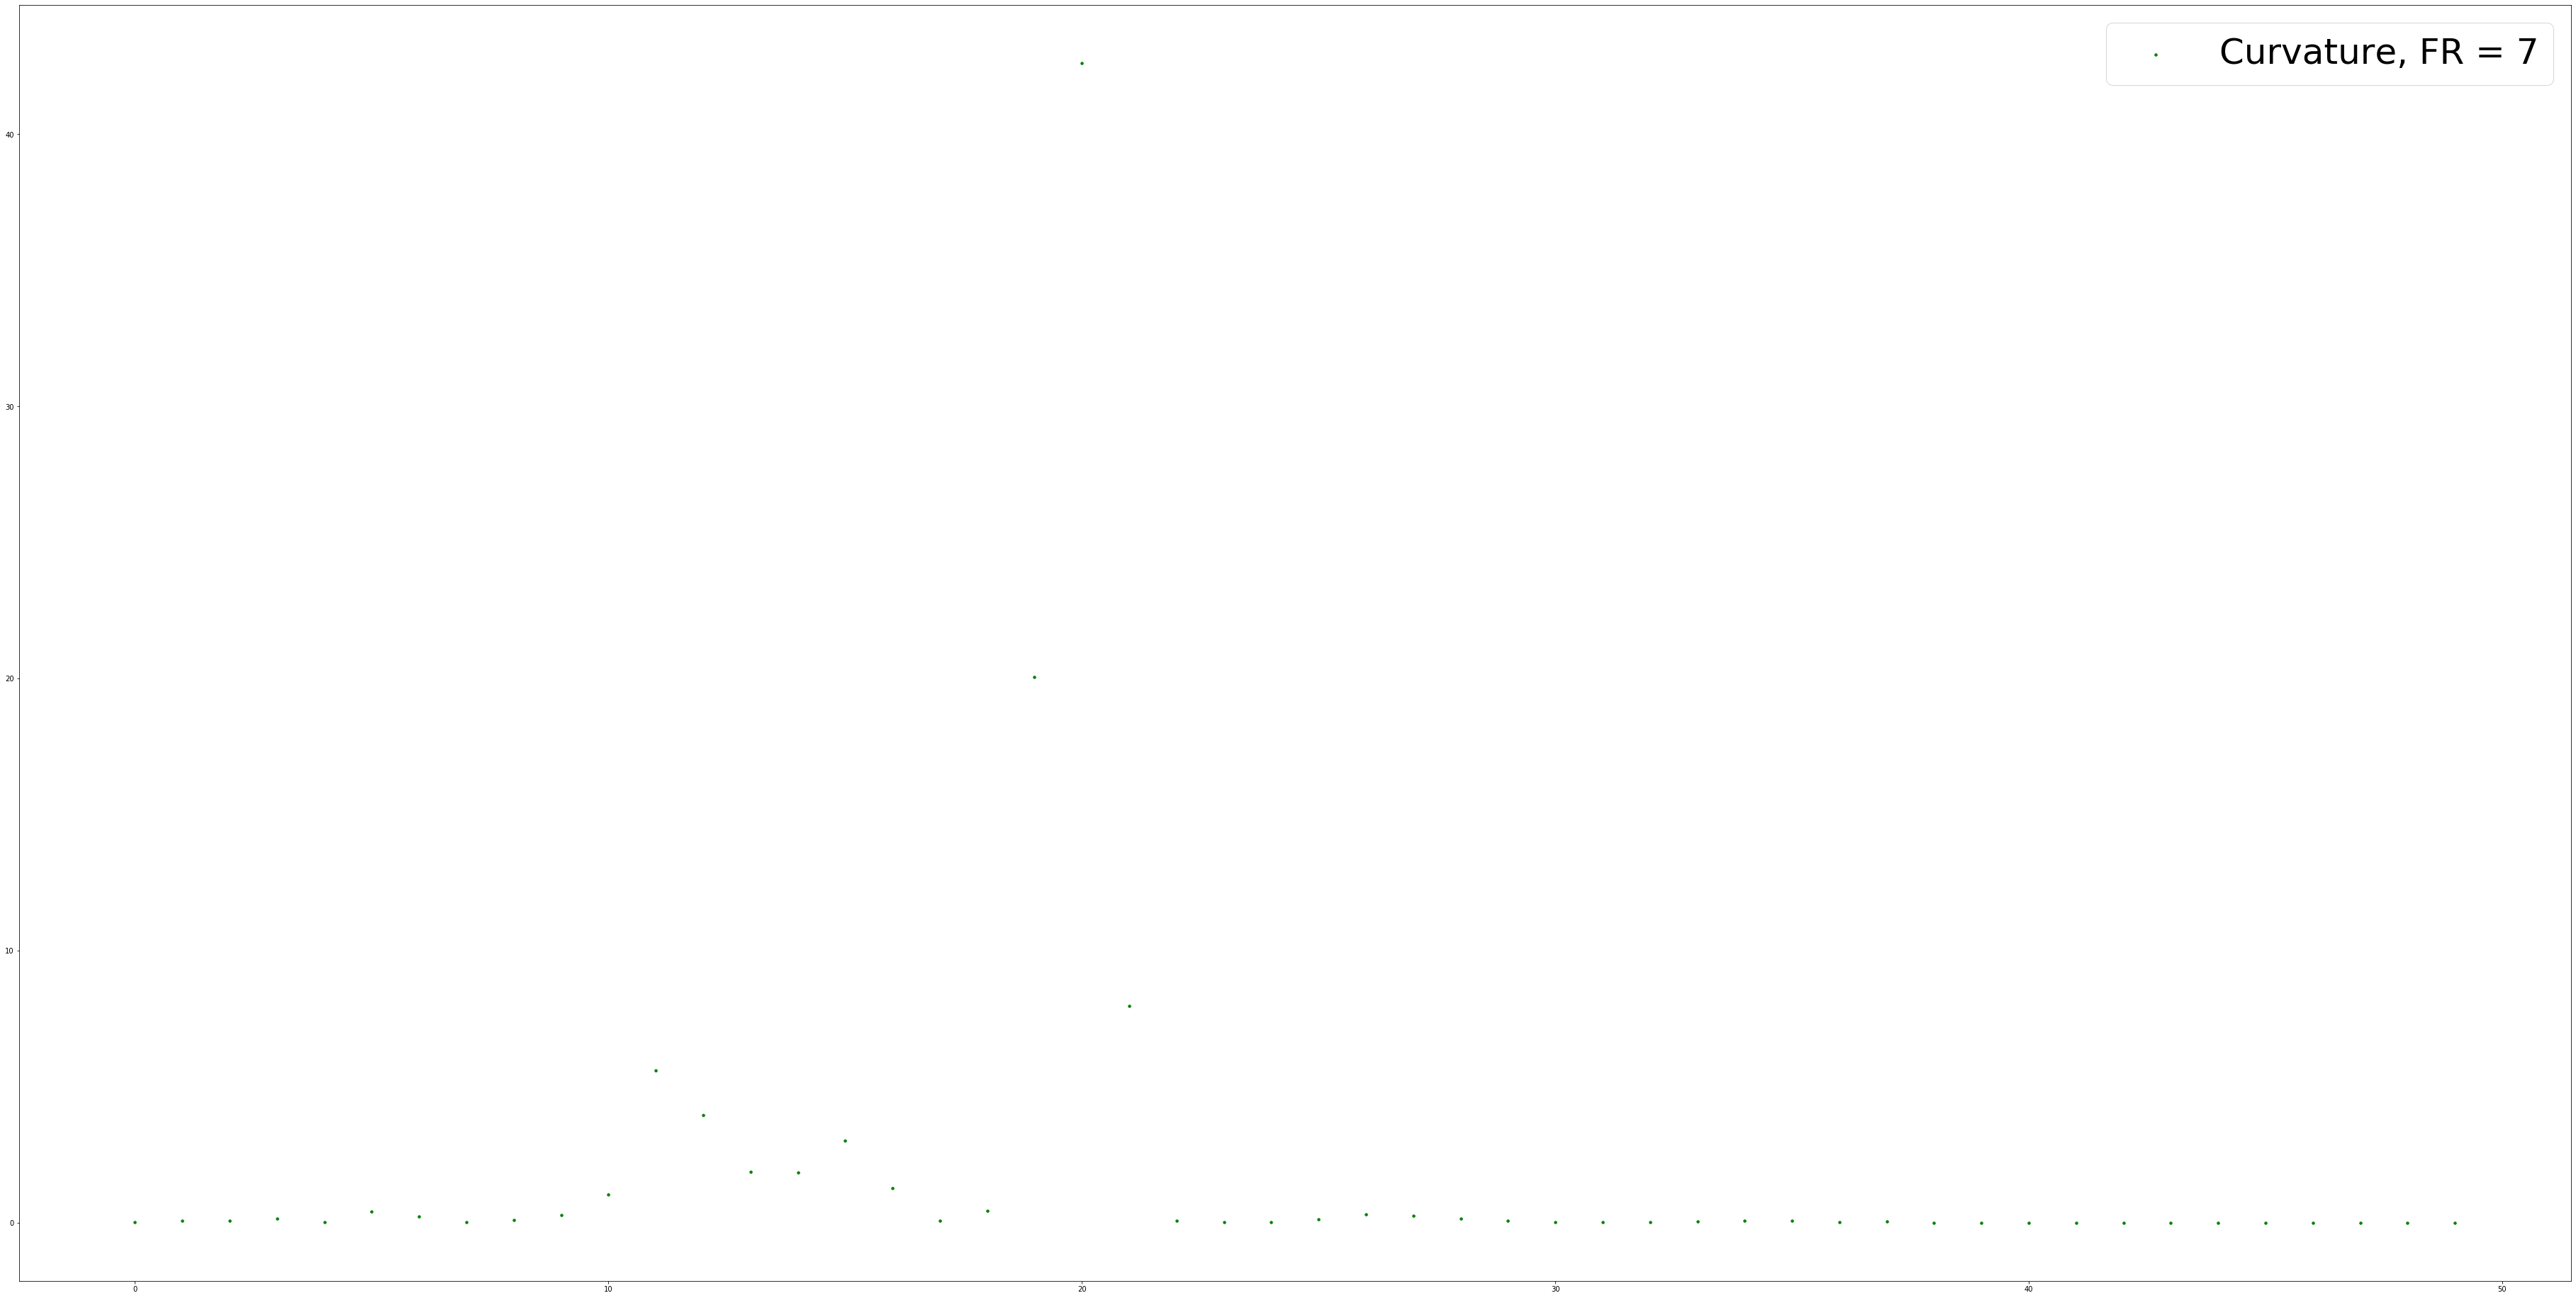

range(200, 370)
170
170


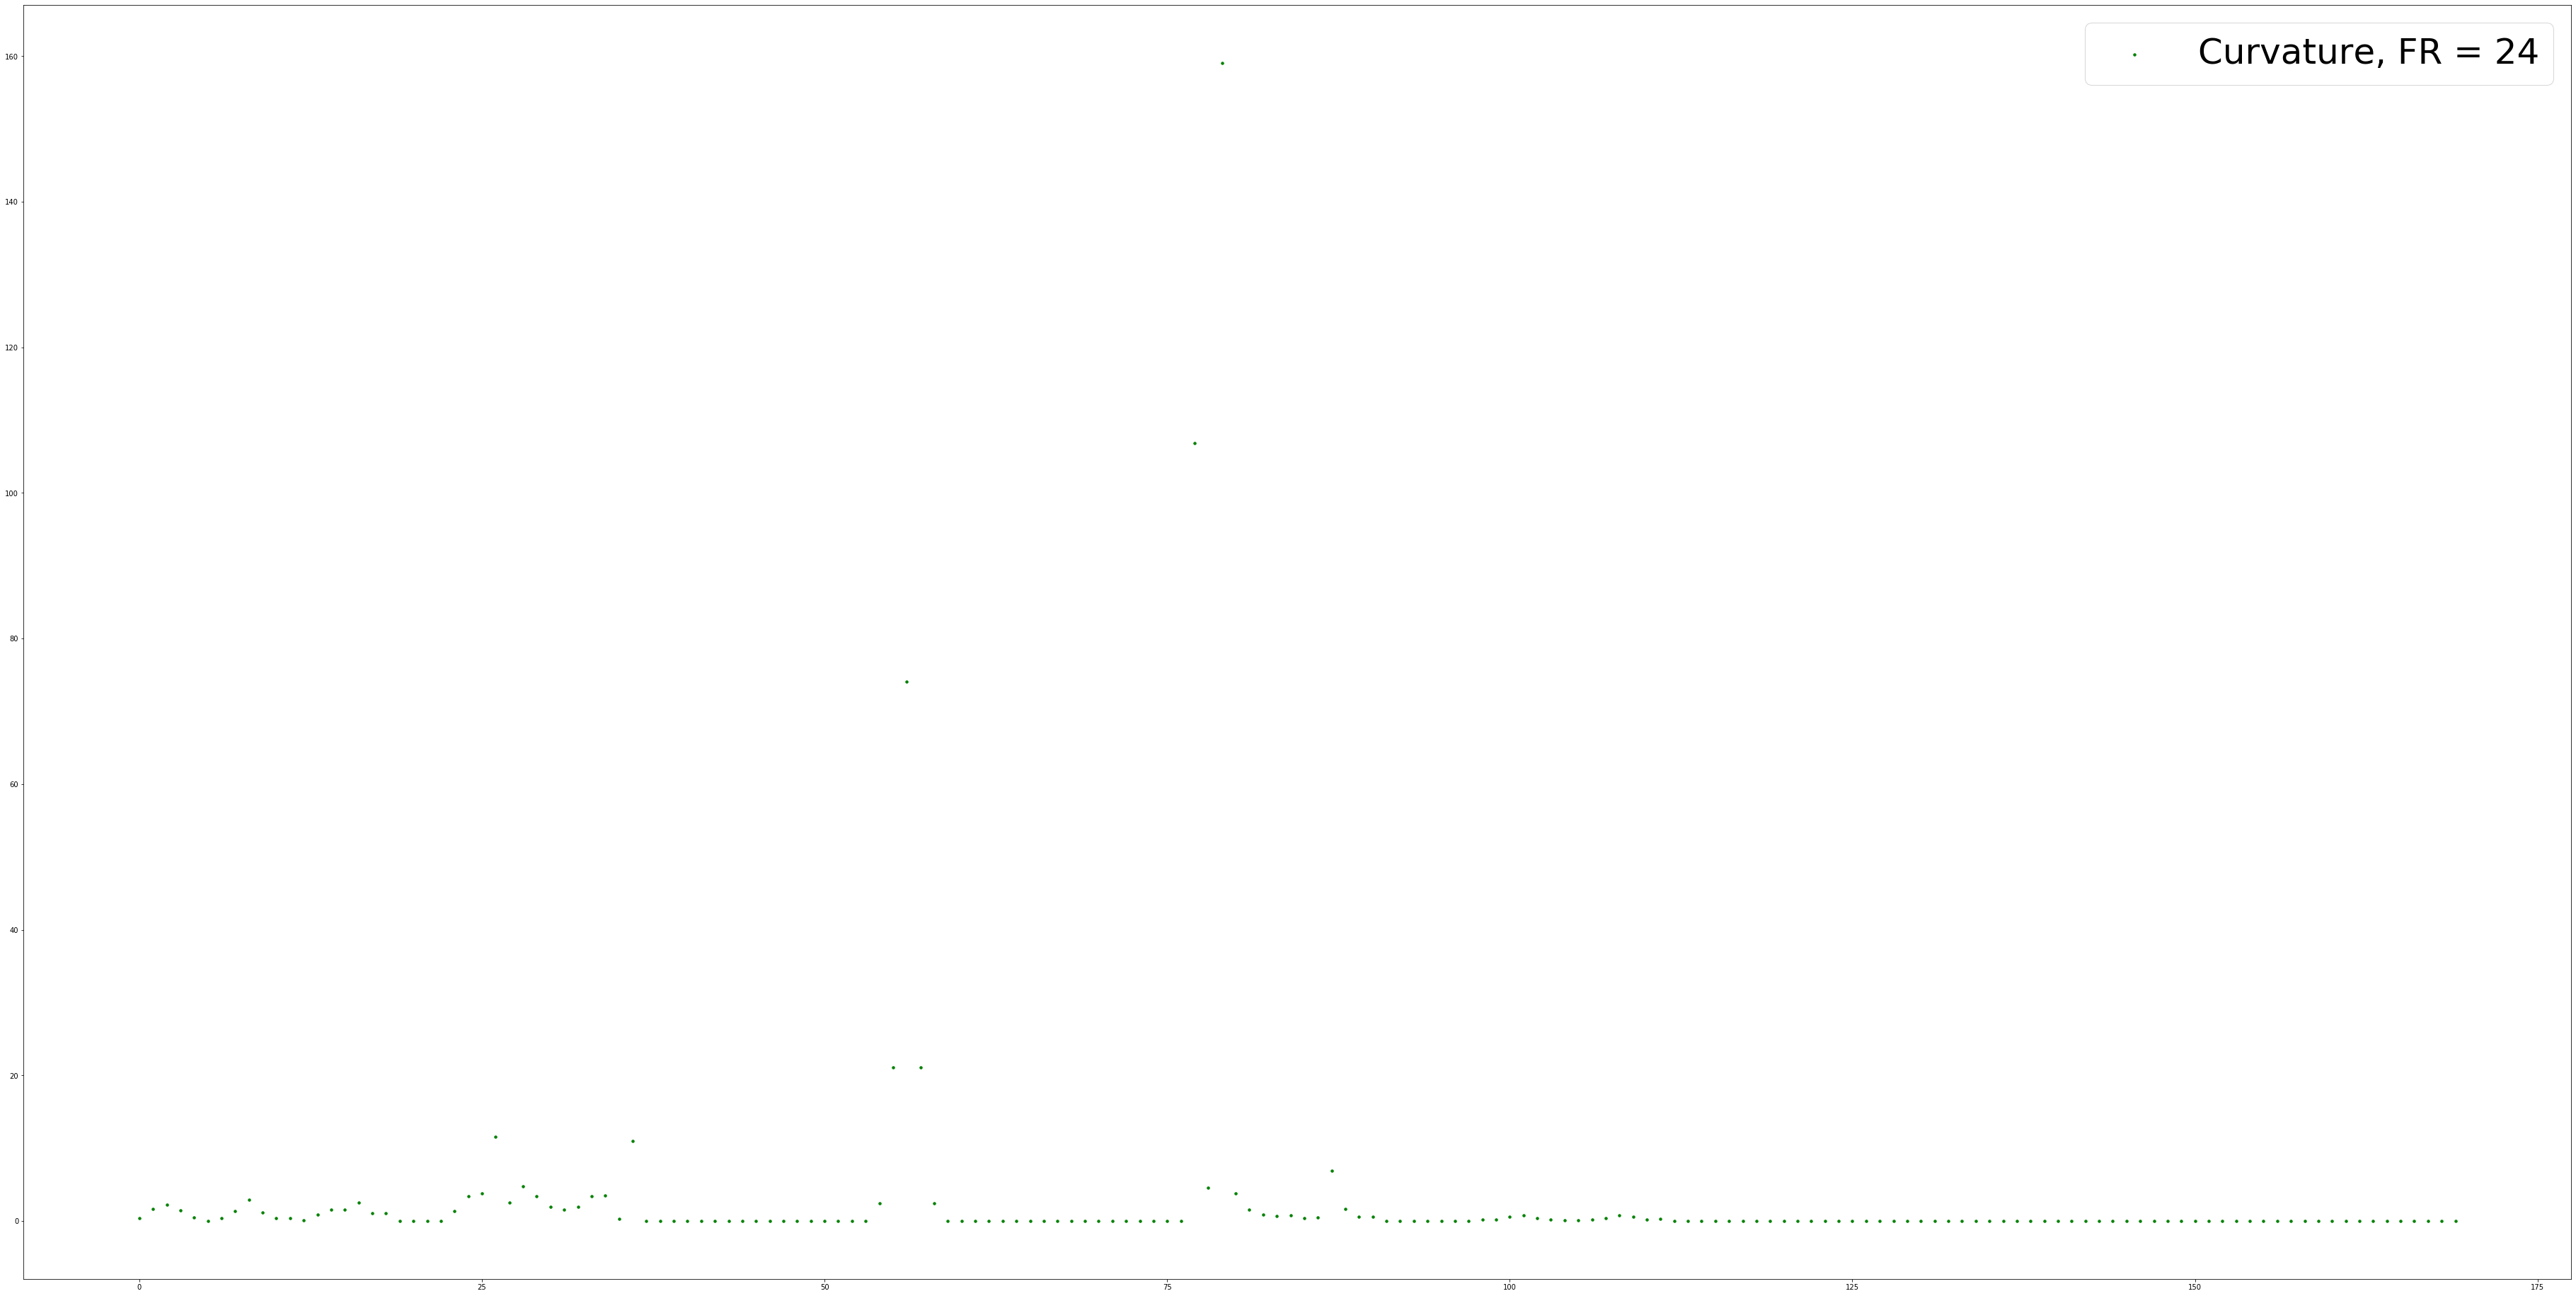

In [8]:
trajectory_new.PlotCurve(animals_low34[1], mode = 'curvature', zoom_in_for_fr_range = range(50,93))
trajectory_new.PlotCurve(animals_low34[2], mode = 'curvature', zoom_in_for_fr_range = range(58,108))
trajectory_new.PlotCurve(animals_high34[0], mode = 'curvature', zoom_in_for_fr_range = range(200,370))

In [9]:
#can we plot original curves to compare?
(8/24)*200
(8/24)*370

123.33333333333333

In [10]:
os.getcwd()

'/Users/karolinagrzeszkiewicz/robustness-tests/locomotion'

In [11]:
os.chdir('/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests')
import trajectory_old

importing Jupyter notebook from trajectory_old.ipynb


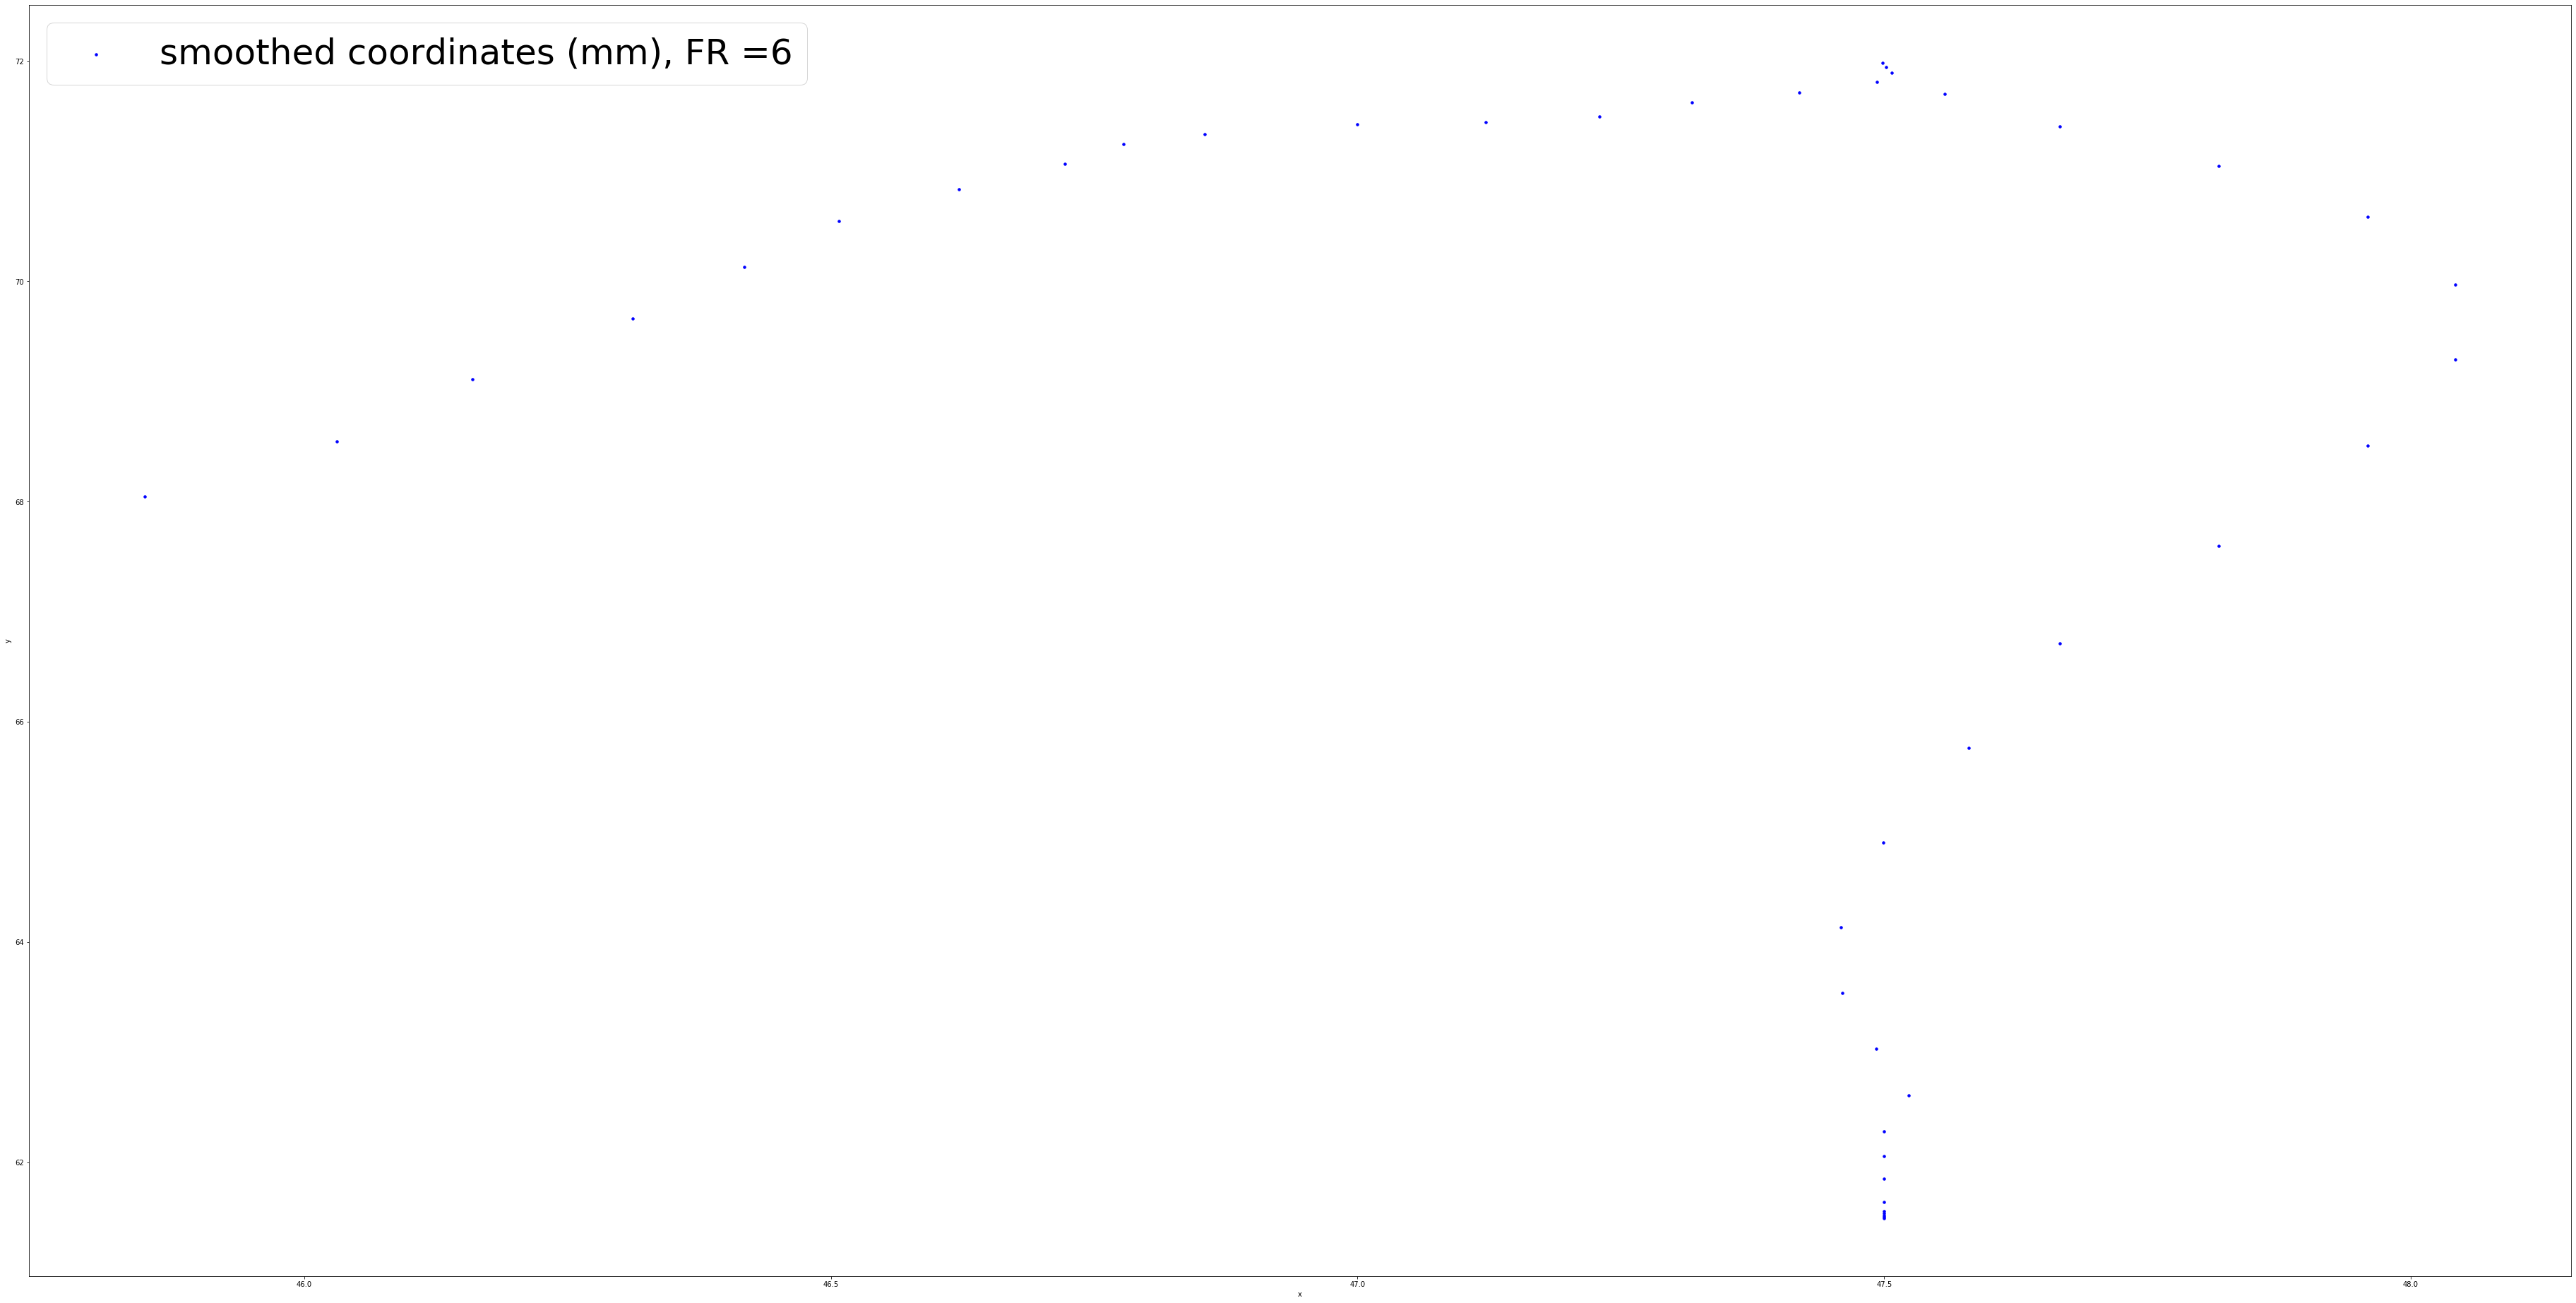

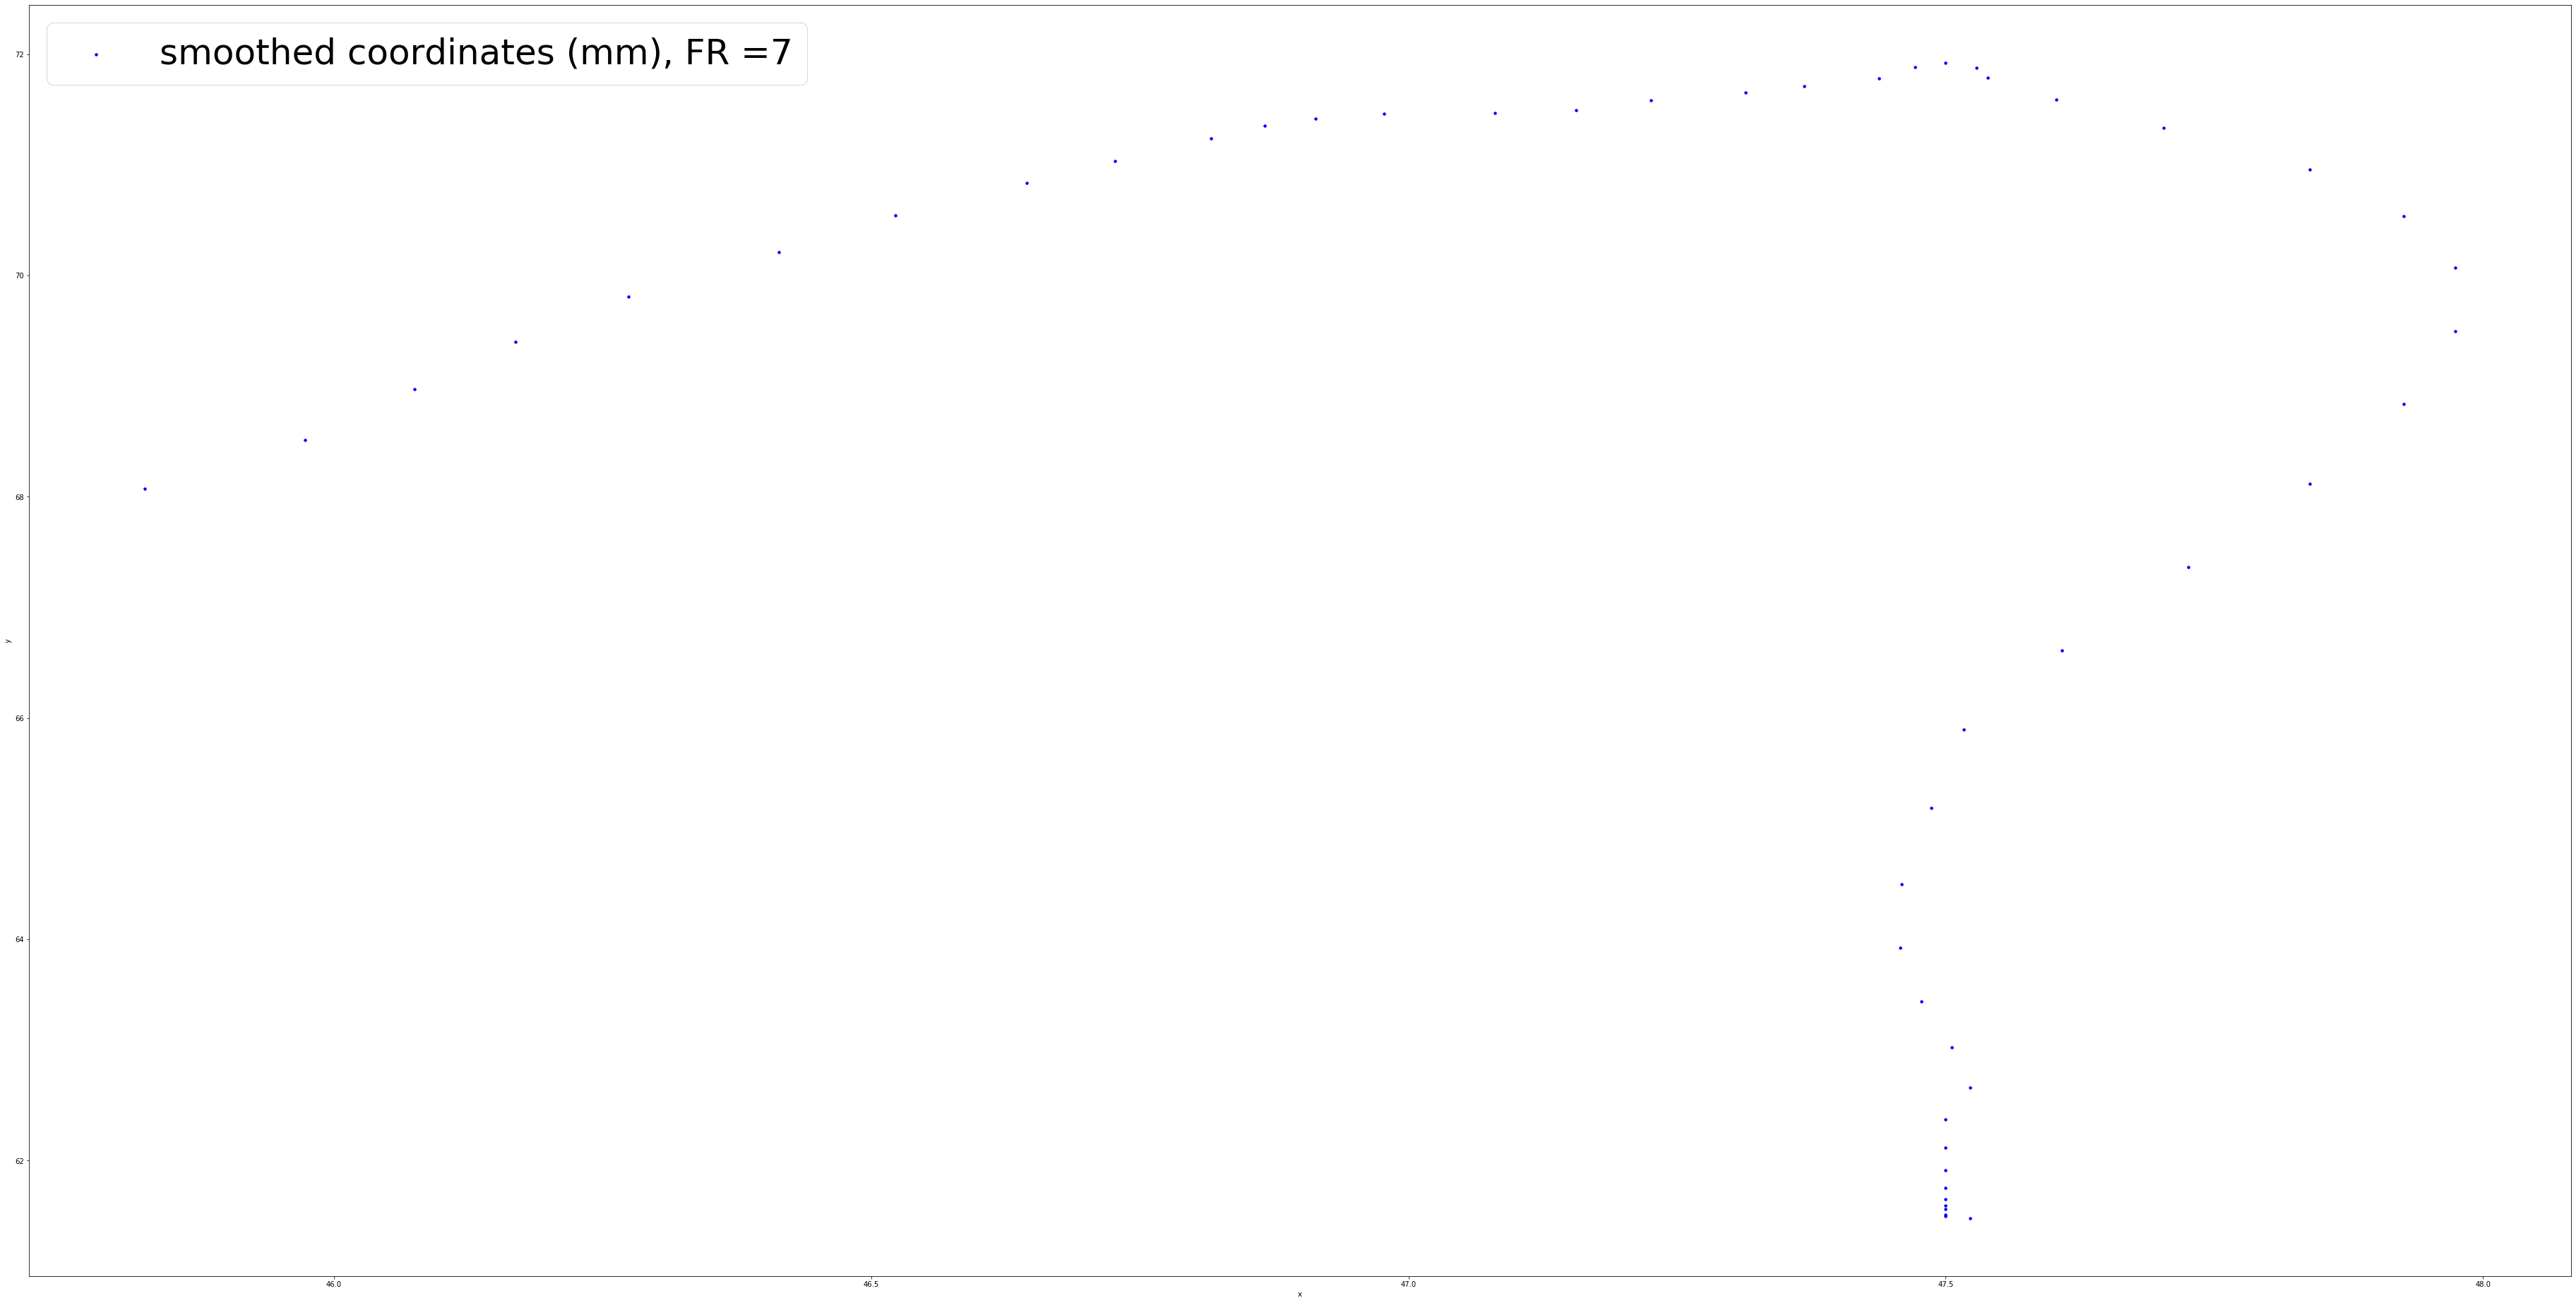

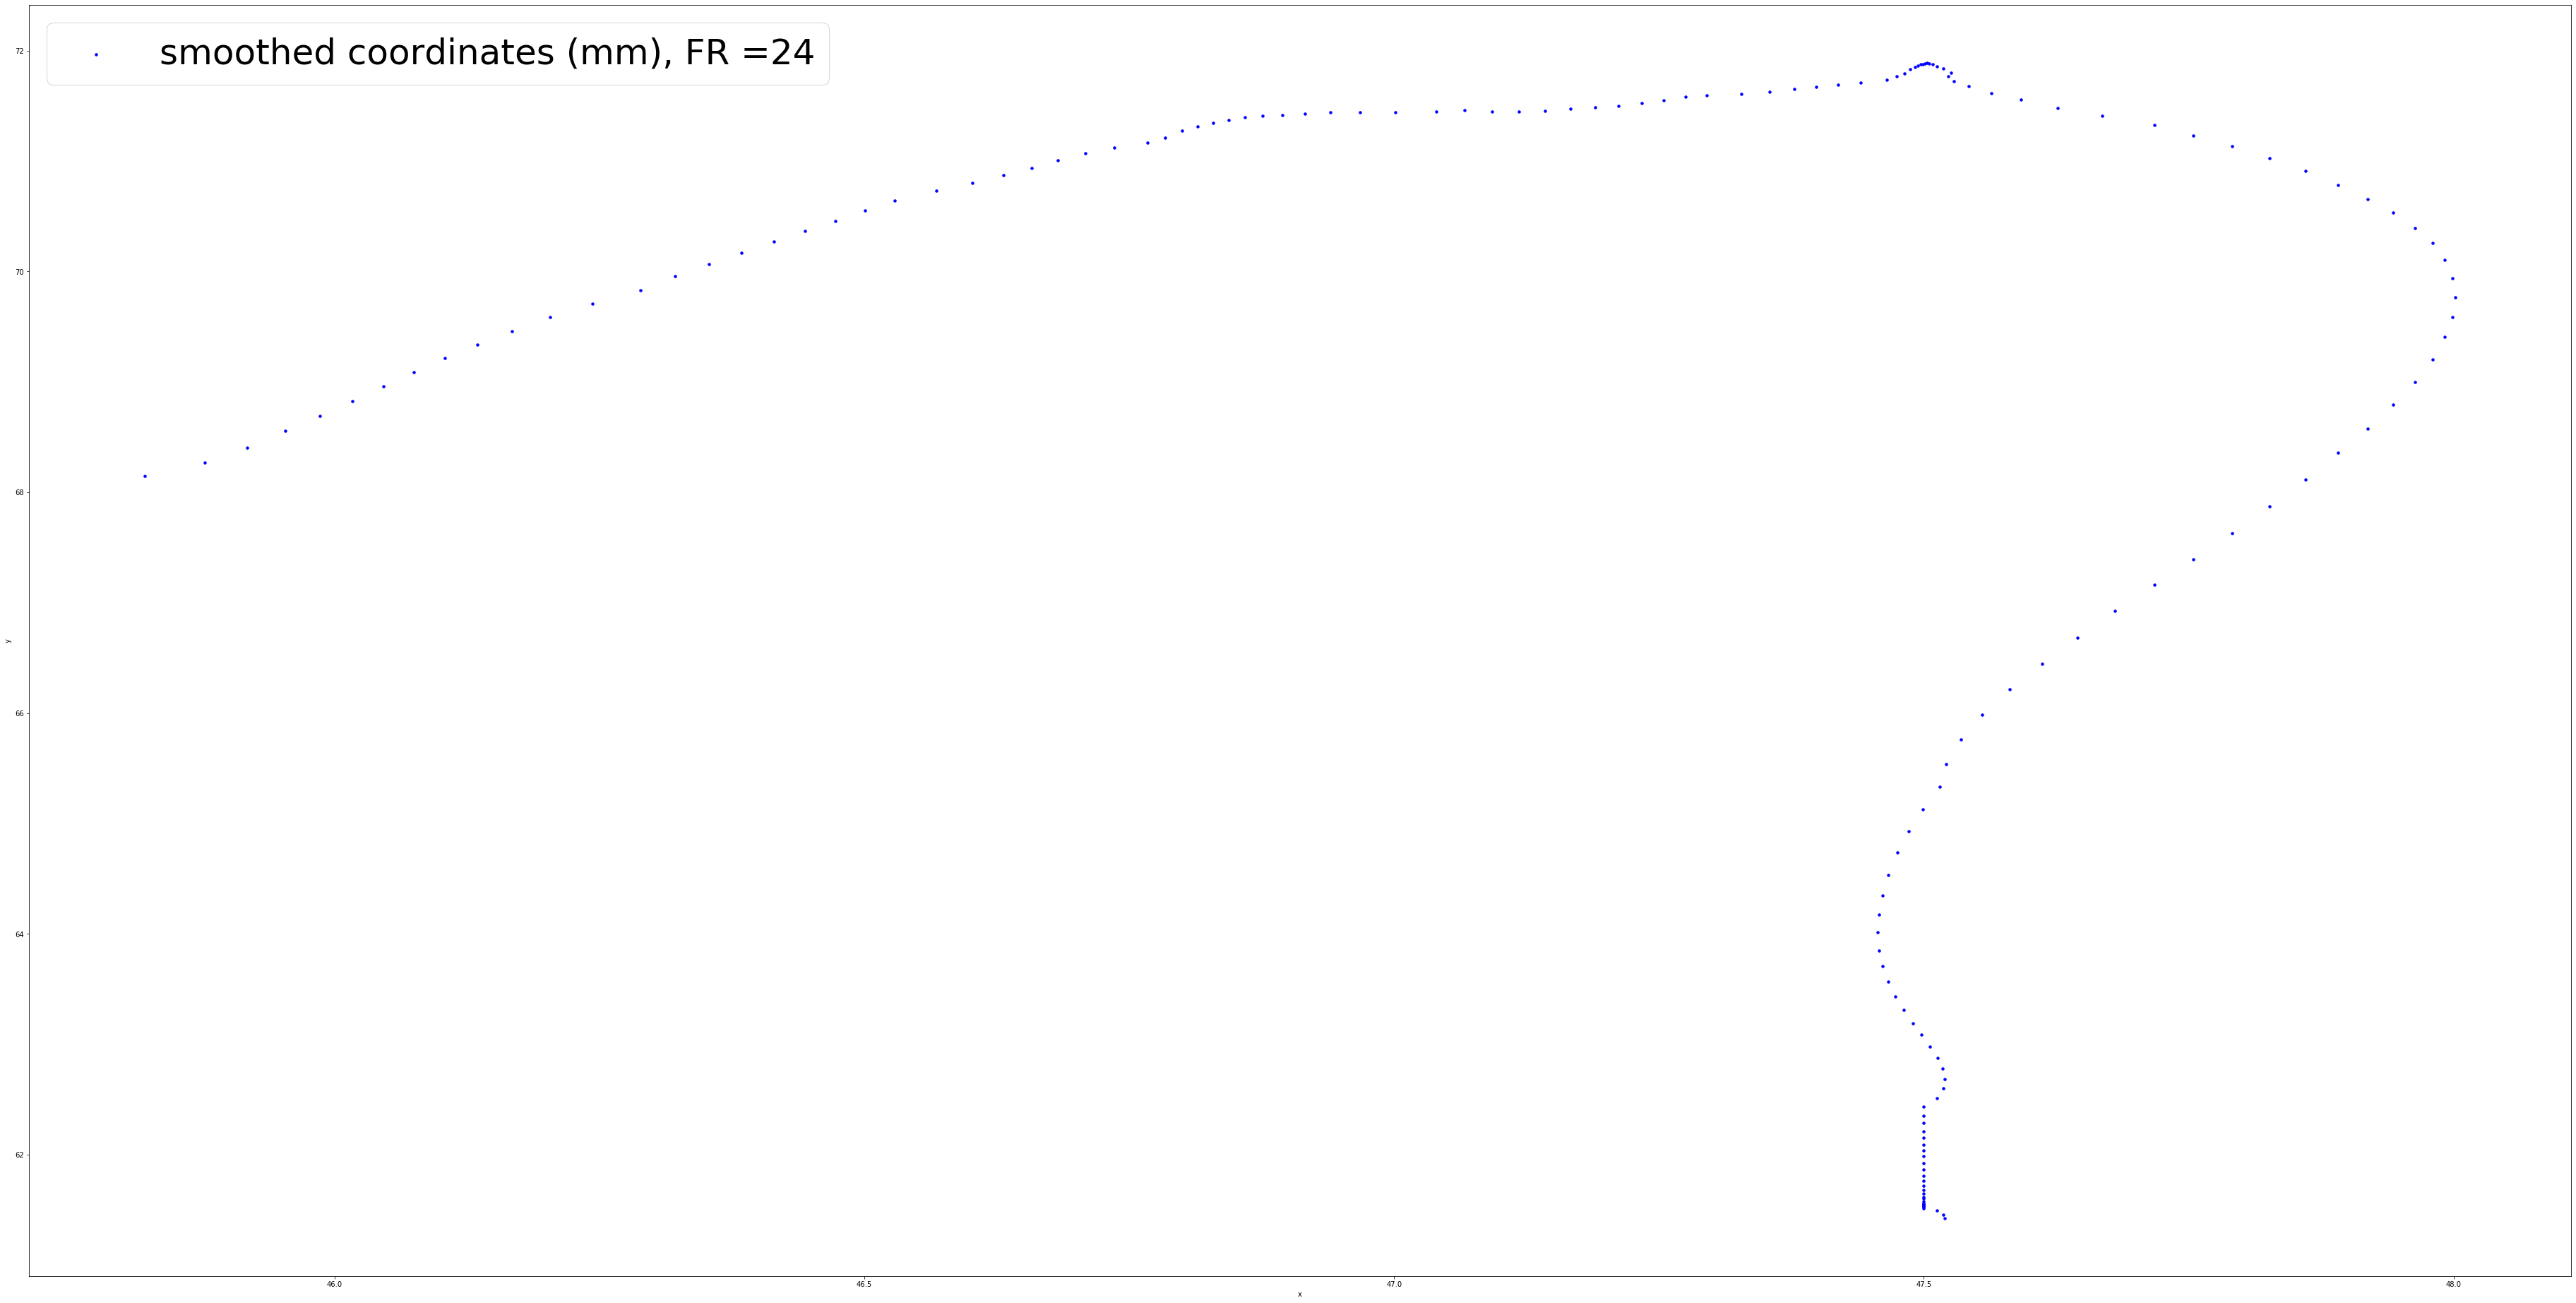

In [12]:
#plots above are for order = 3 and window length = ceiling(FR * 2.5)
#now plot with old order, order = 5, same window length
#trajectory_old performs pretty badly for low FR and loops


trajectory_old.PlotCurve(animals_low34[1], zoom_in_for_fr_range = range(50,93))
trajectory_old.PlotCurve(animals_low34[2], zoom_in_for_fr_range = range(58,108))
trajectory_old.PlotCurve(animals_high34[0], zoom_in_for_fr_range = range(200,370))

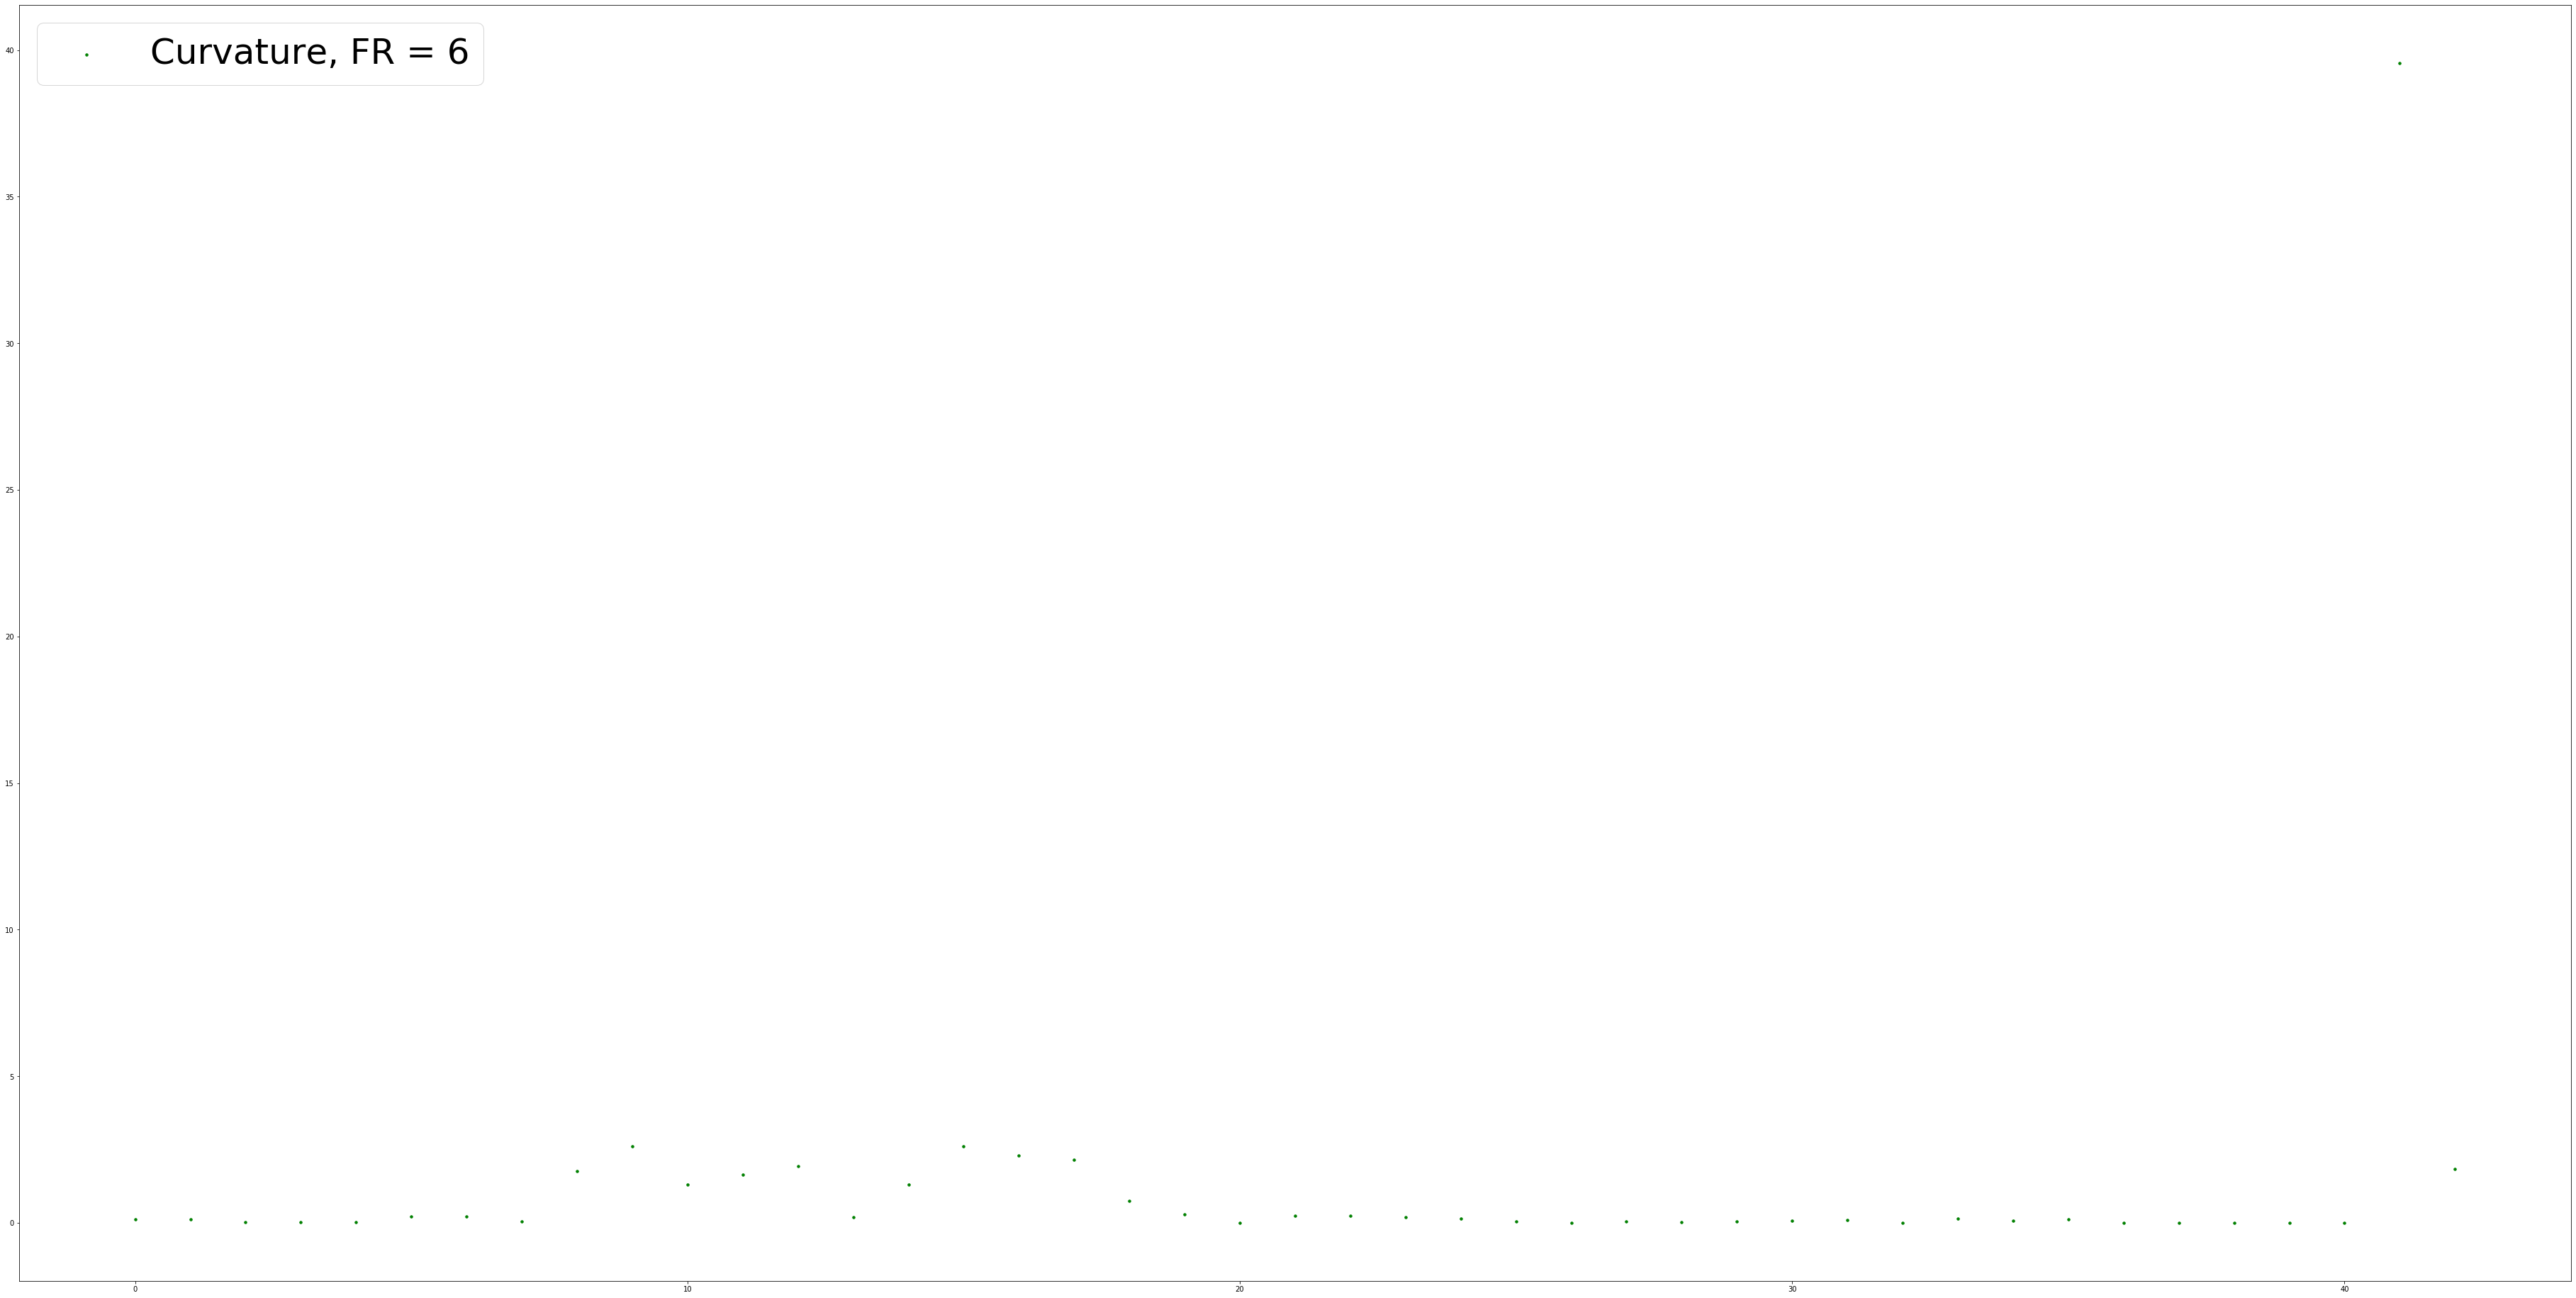

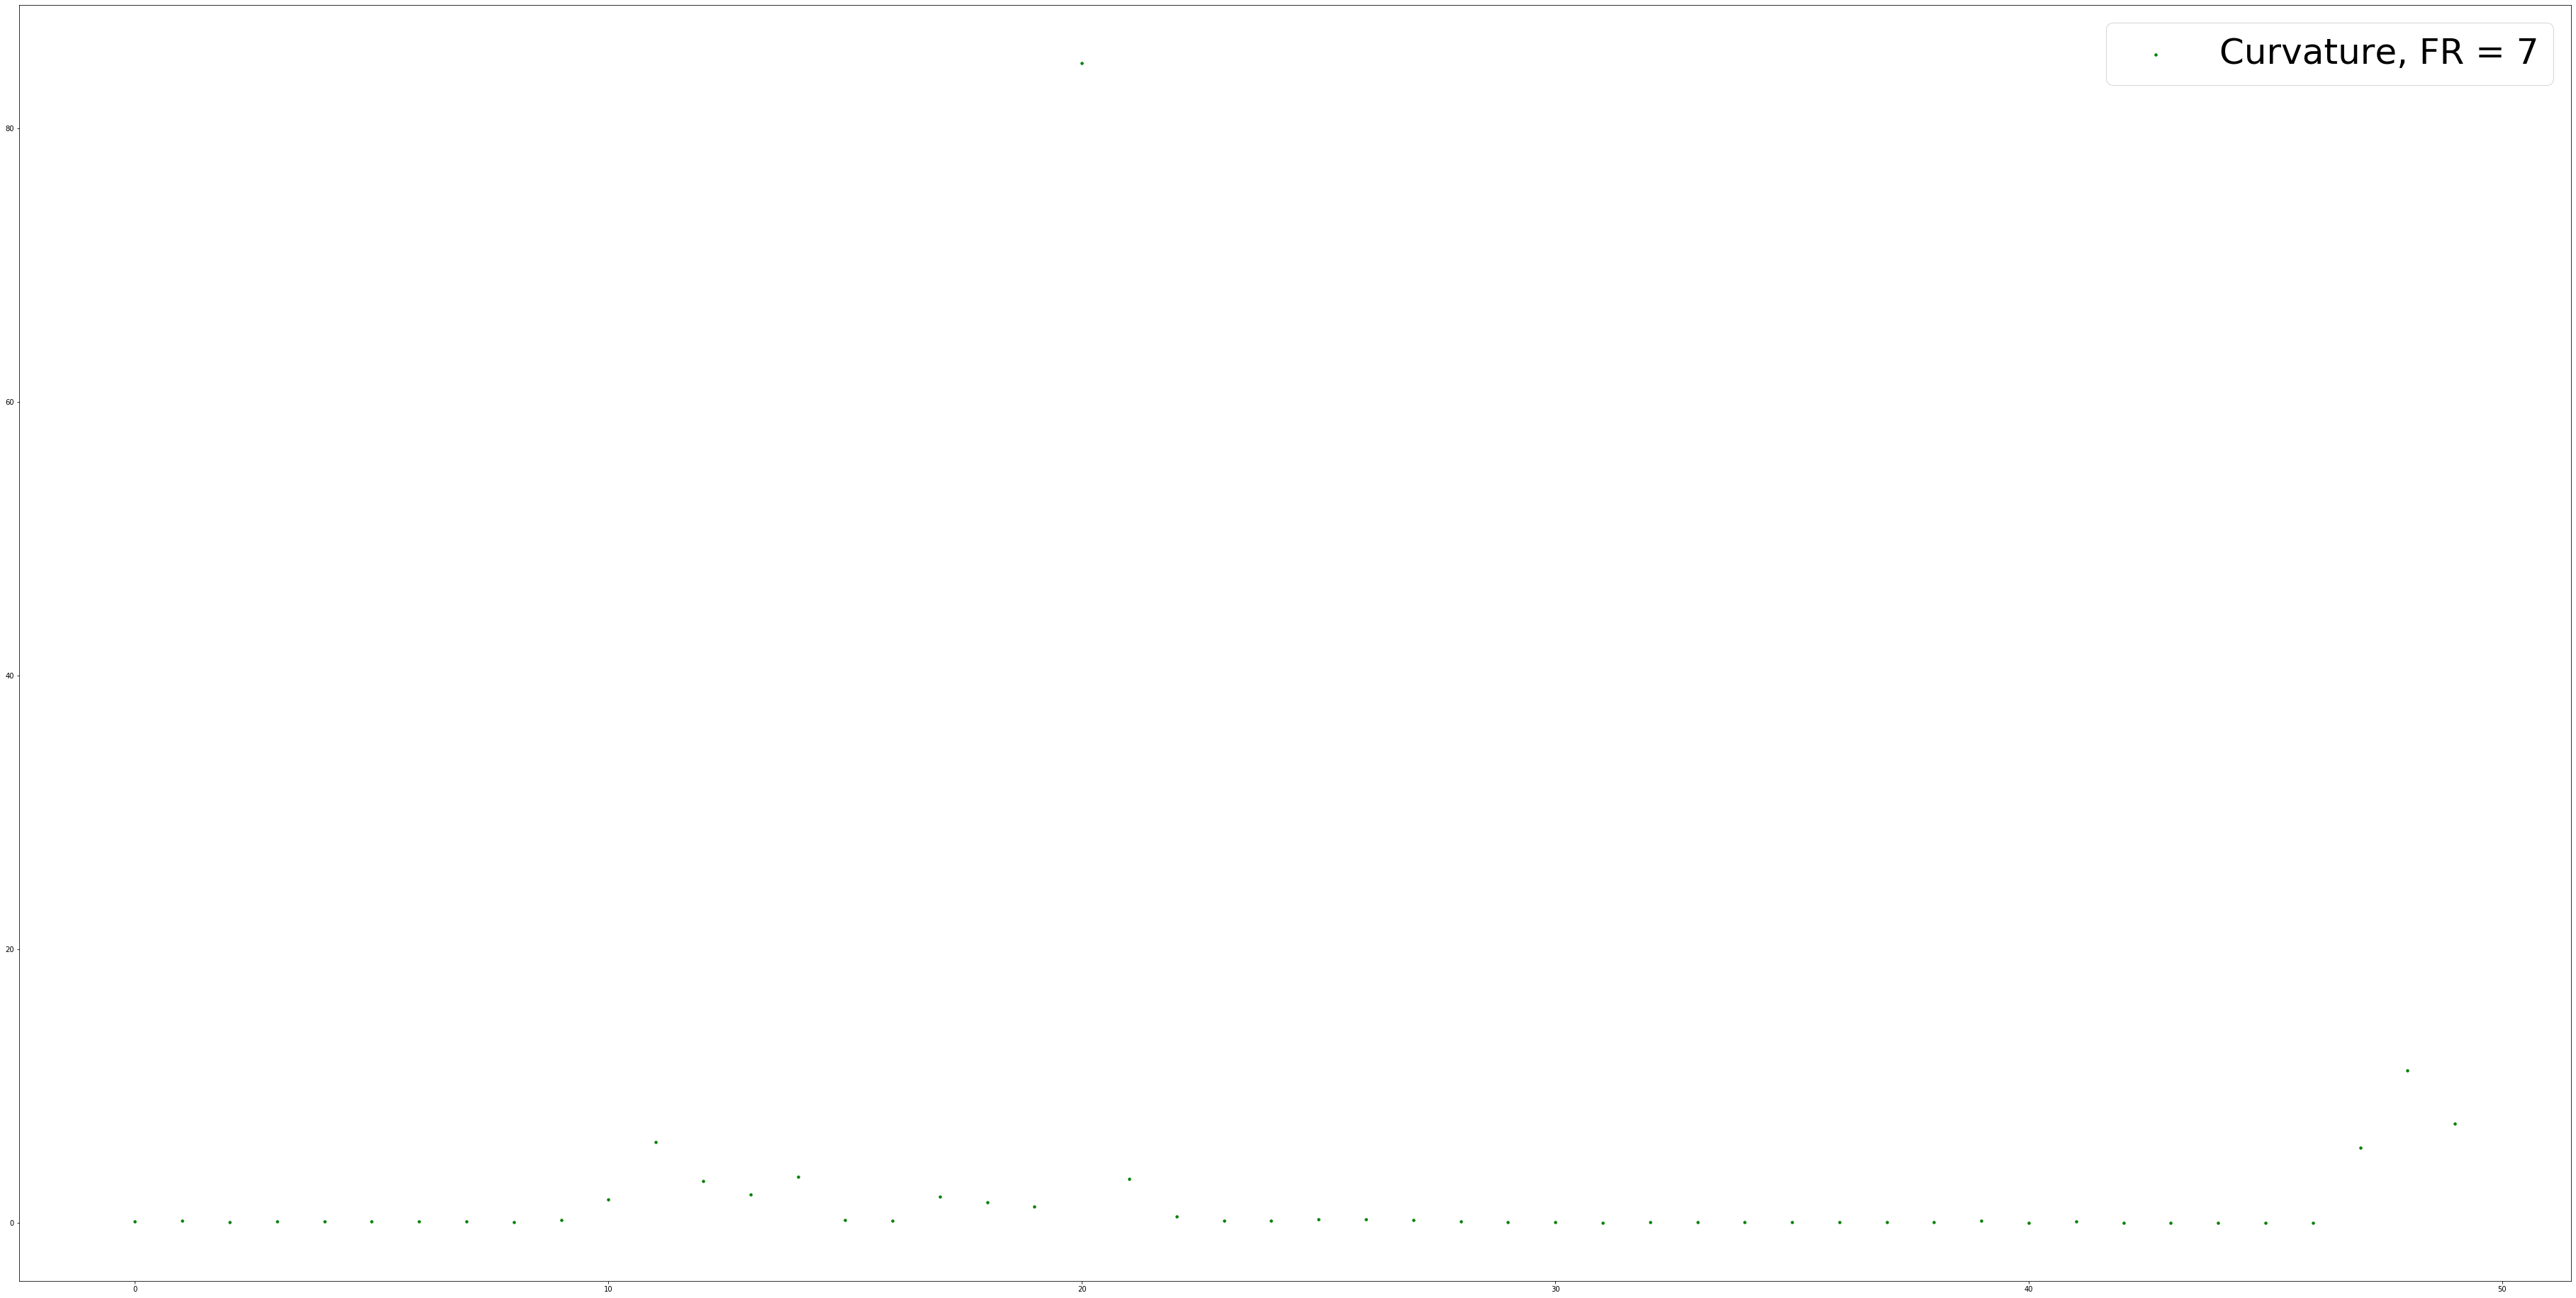

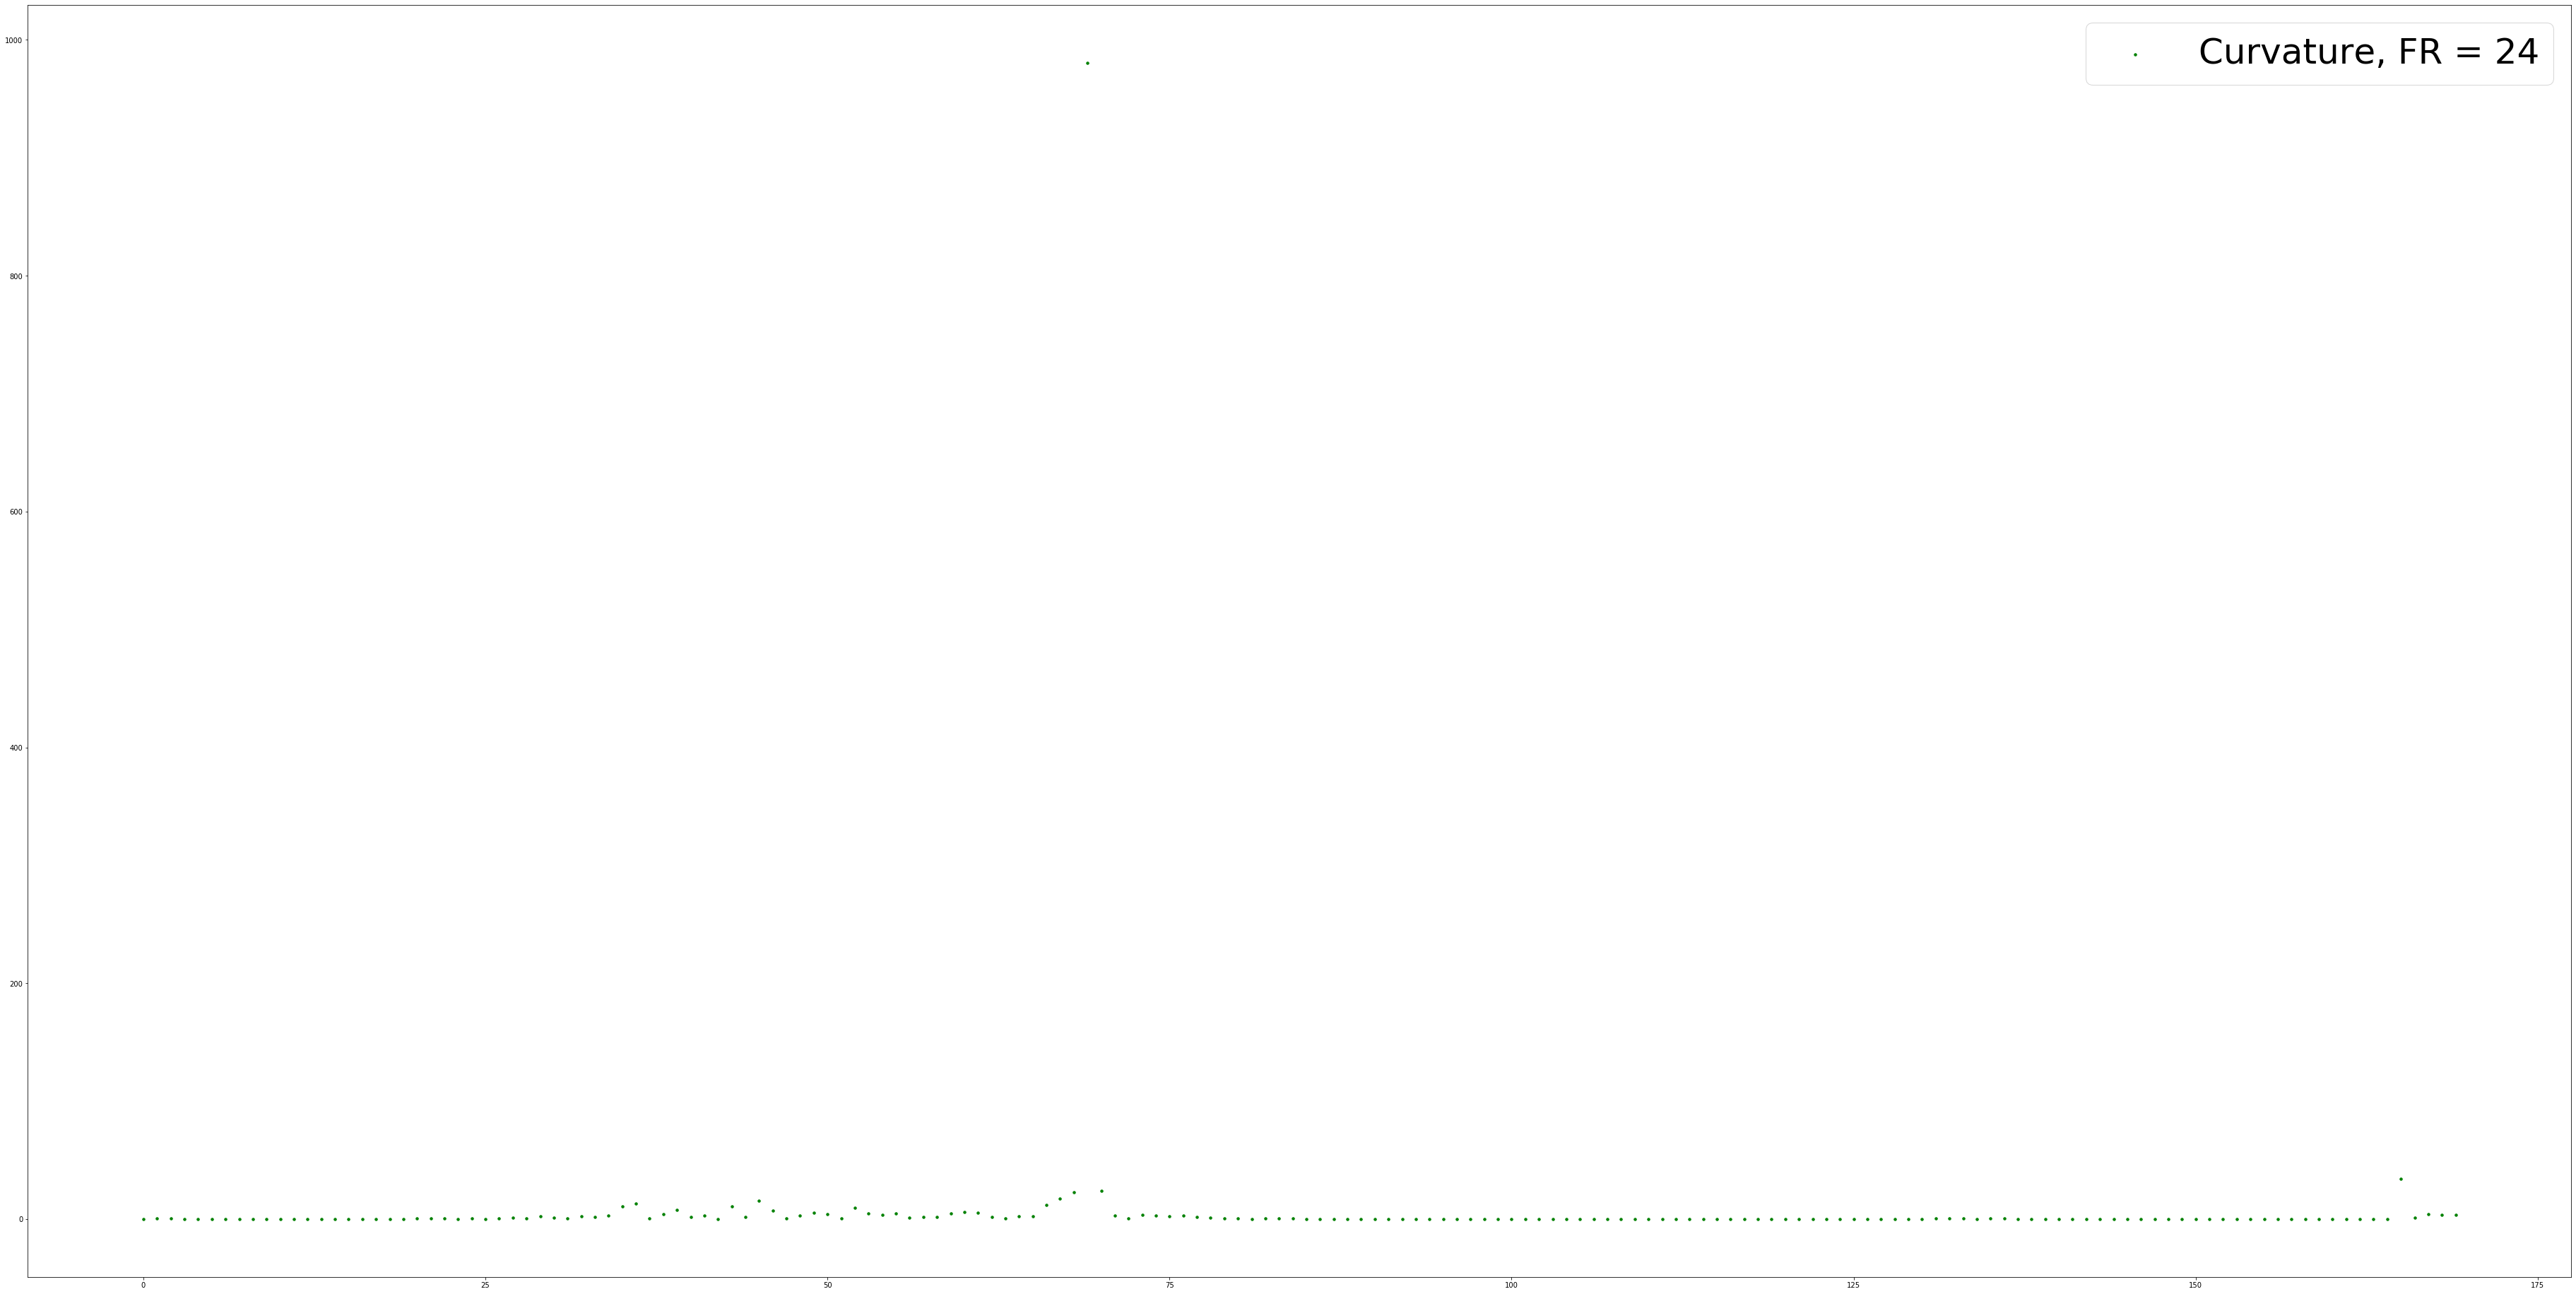

In [13]:
trajectory_old.PlotCurve(animals_low34[1], mode = 'curvature', zoom_in_for_fr_range = range(50,93))
trajectory_old.PlotCurve(animals_low34[2], mode = 'curvature', zoom_in_for_fr_range = range(58,108))
trajectory_old.PlotCurve(animals_high34[0], mode = 'curvature', zoom_in_for_fr_range = range(200,370))

range(0, 360)
360
360


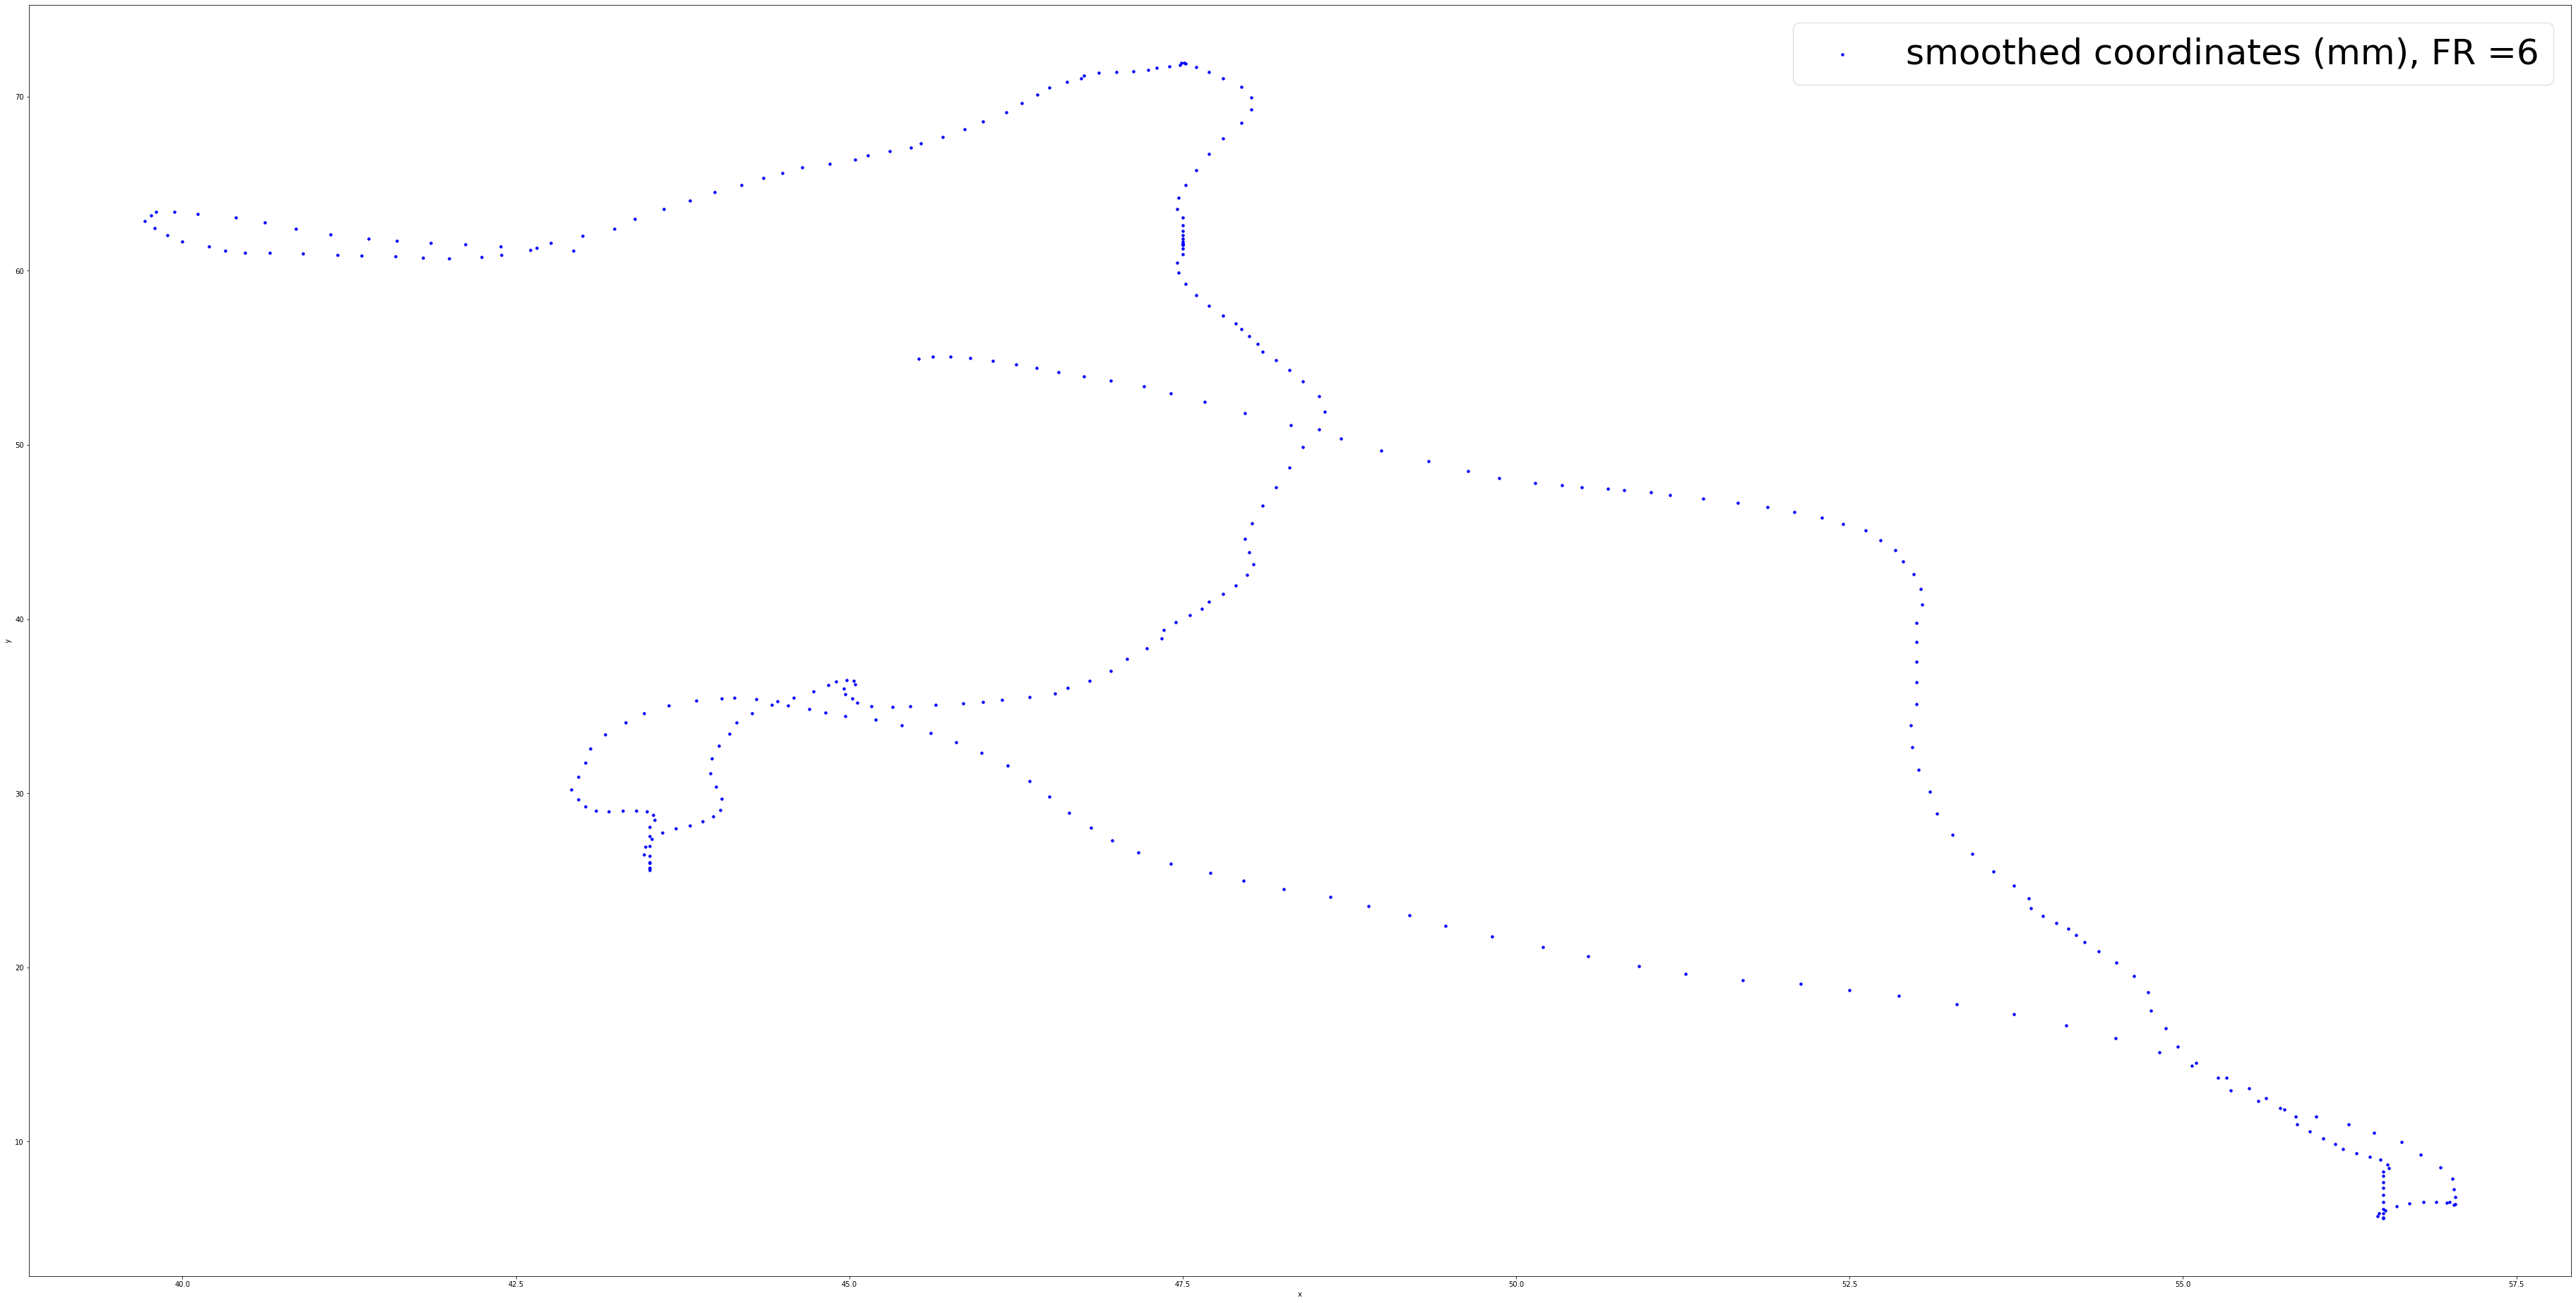

range(0, 1440)
1440
1440


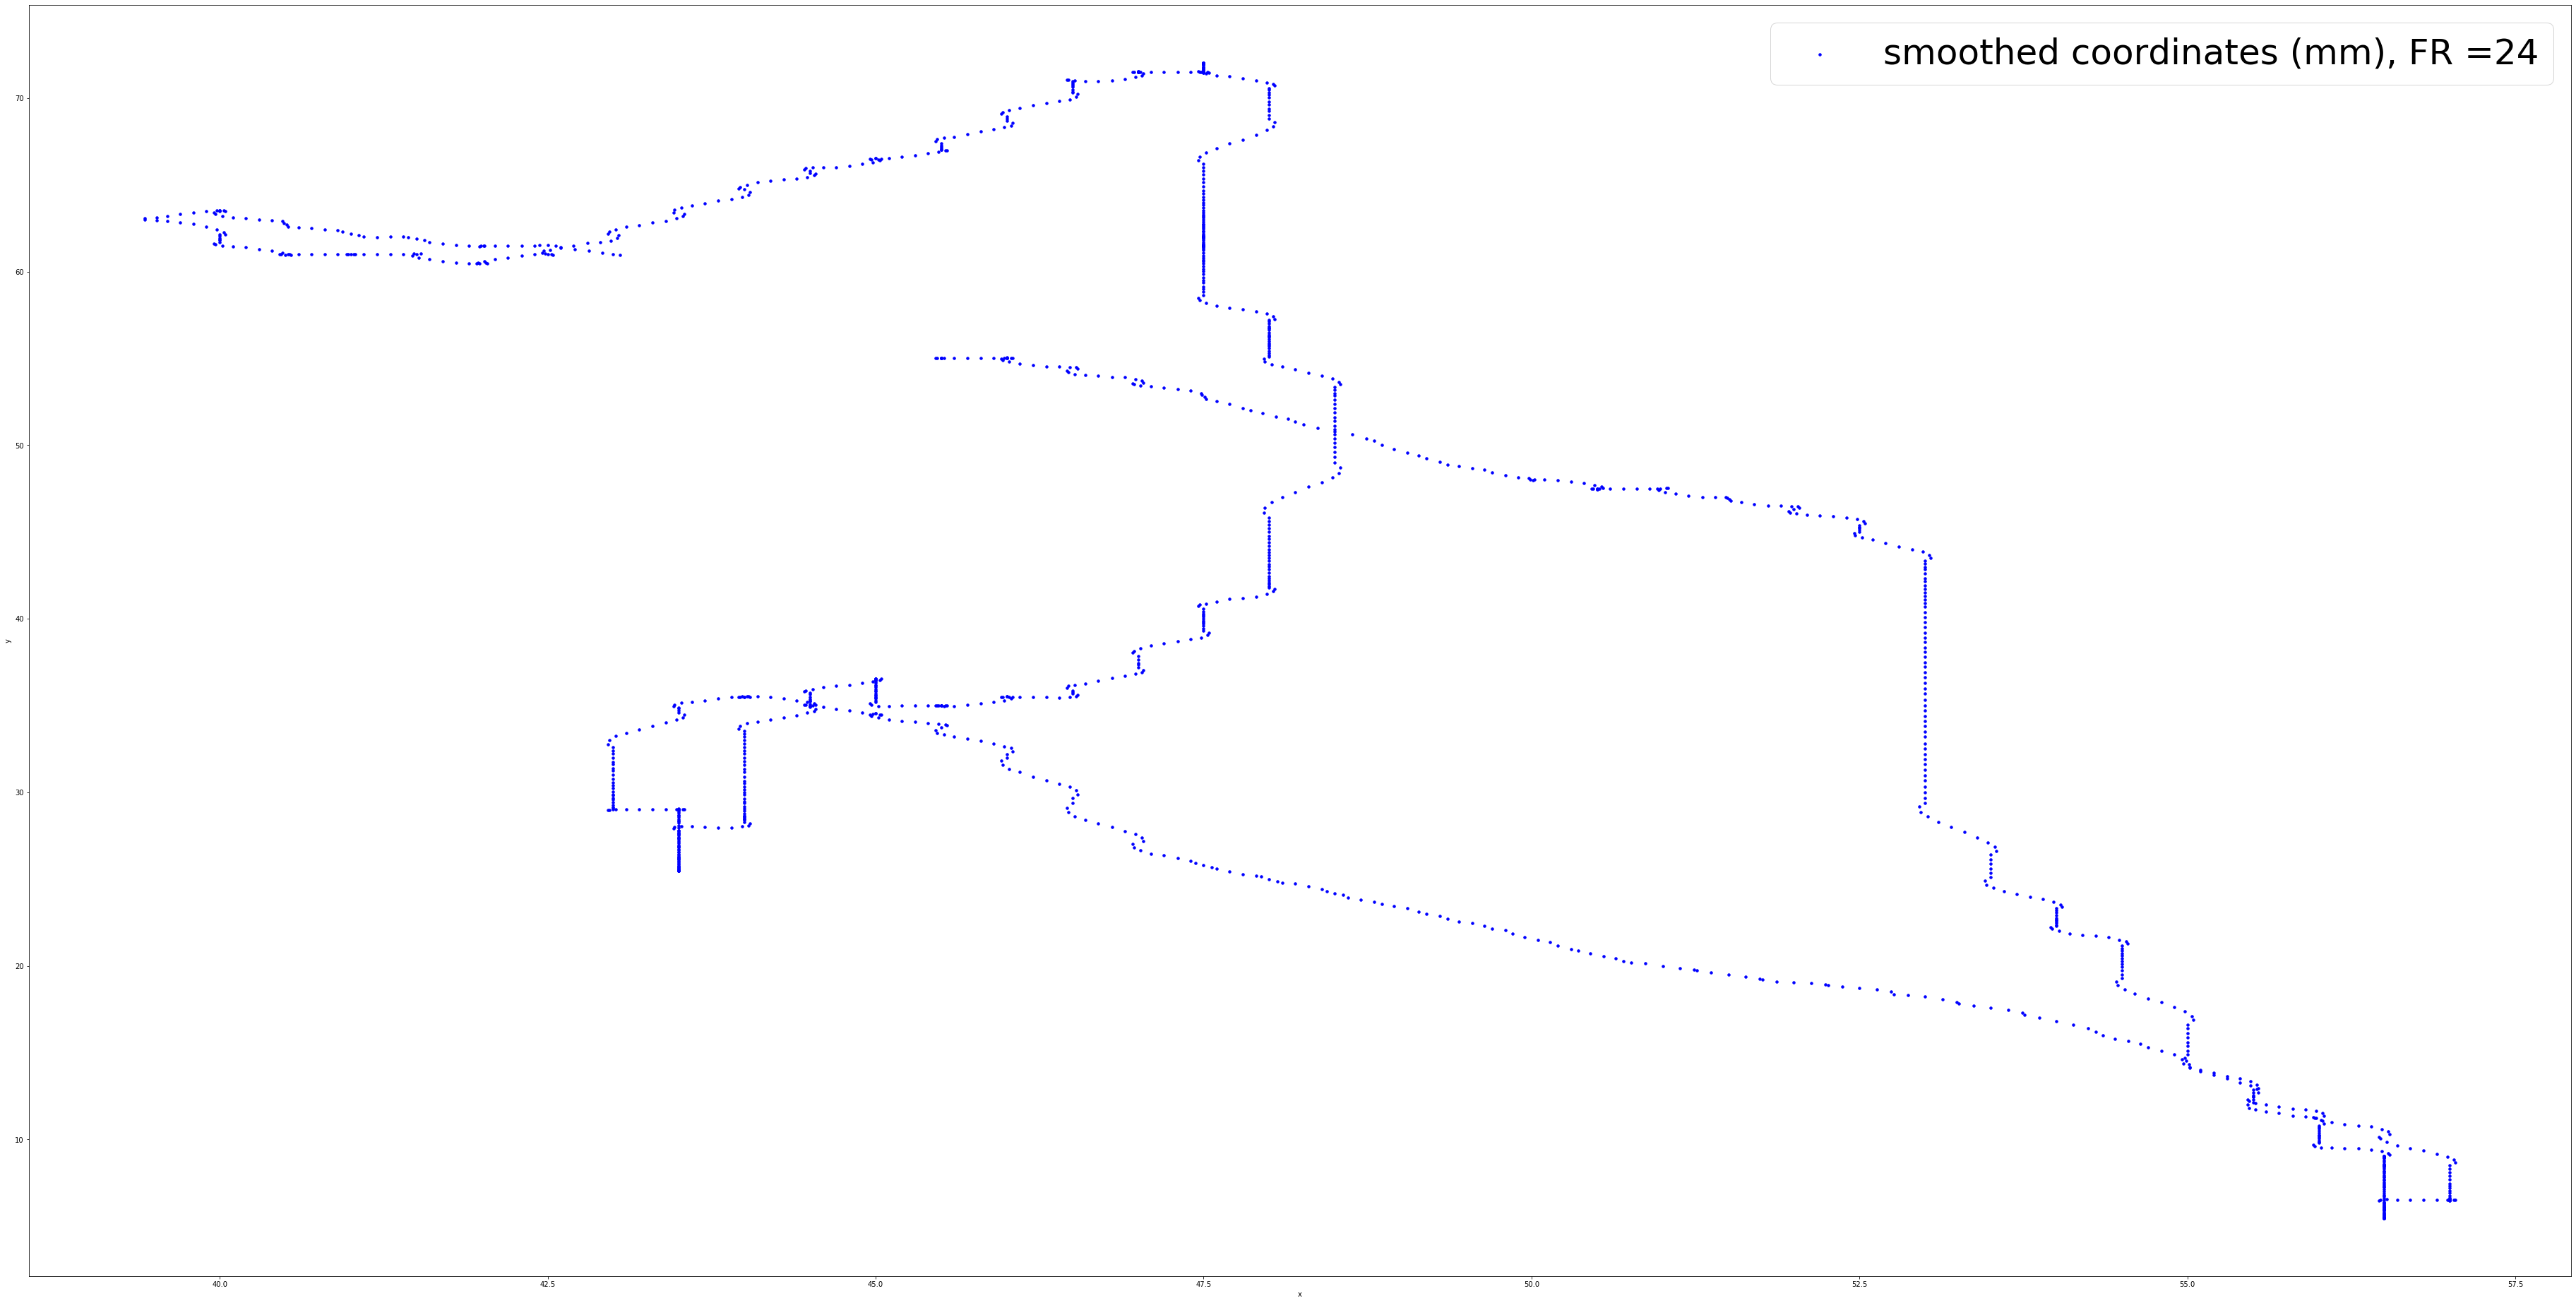

range(0, 6120)
6120
6120


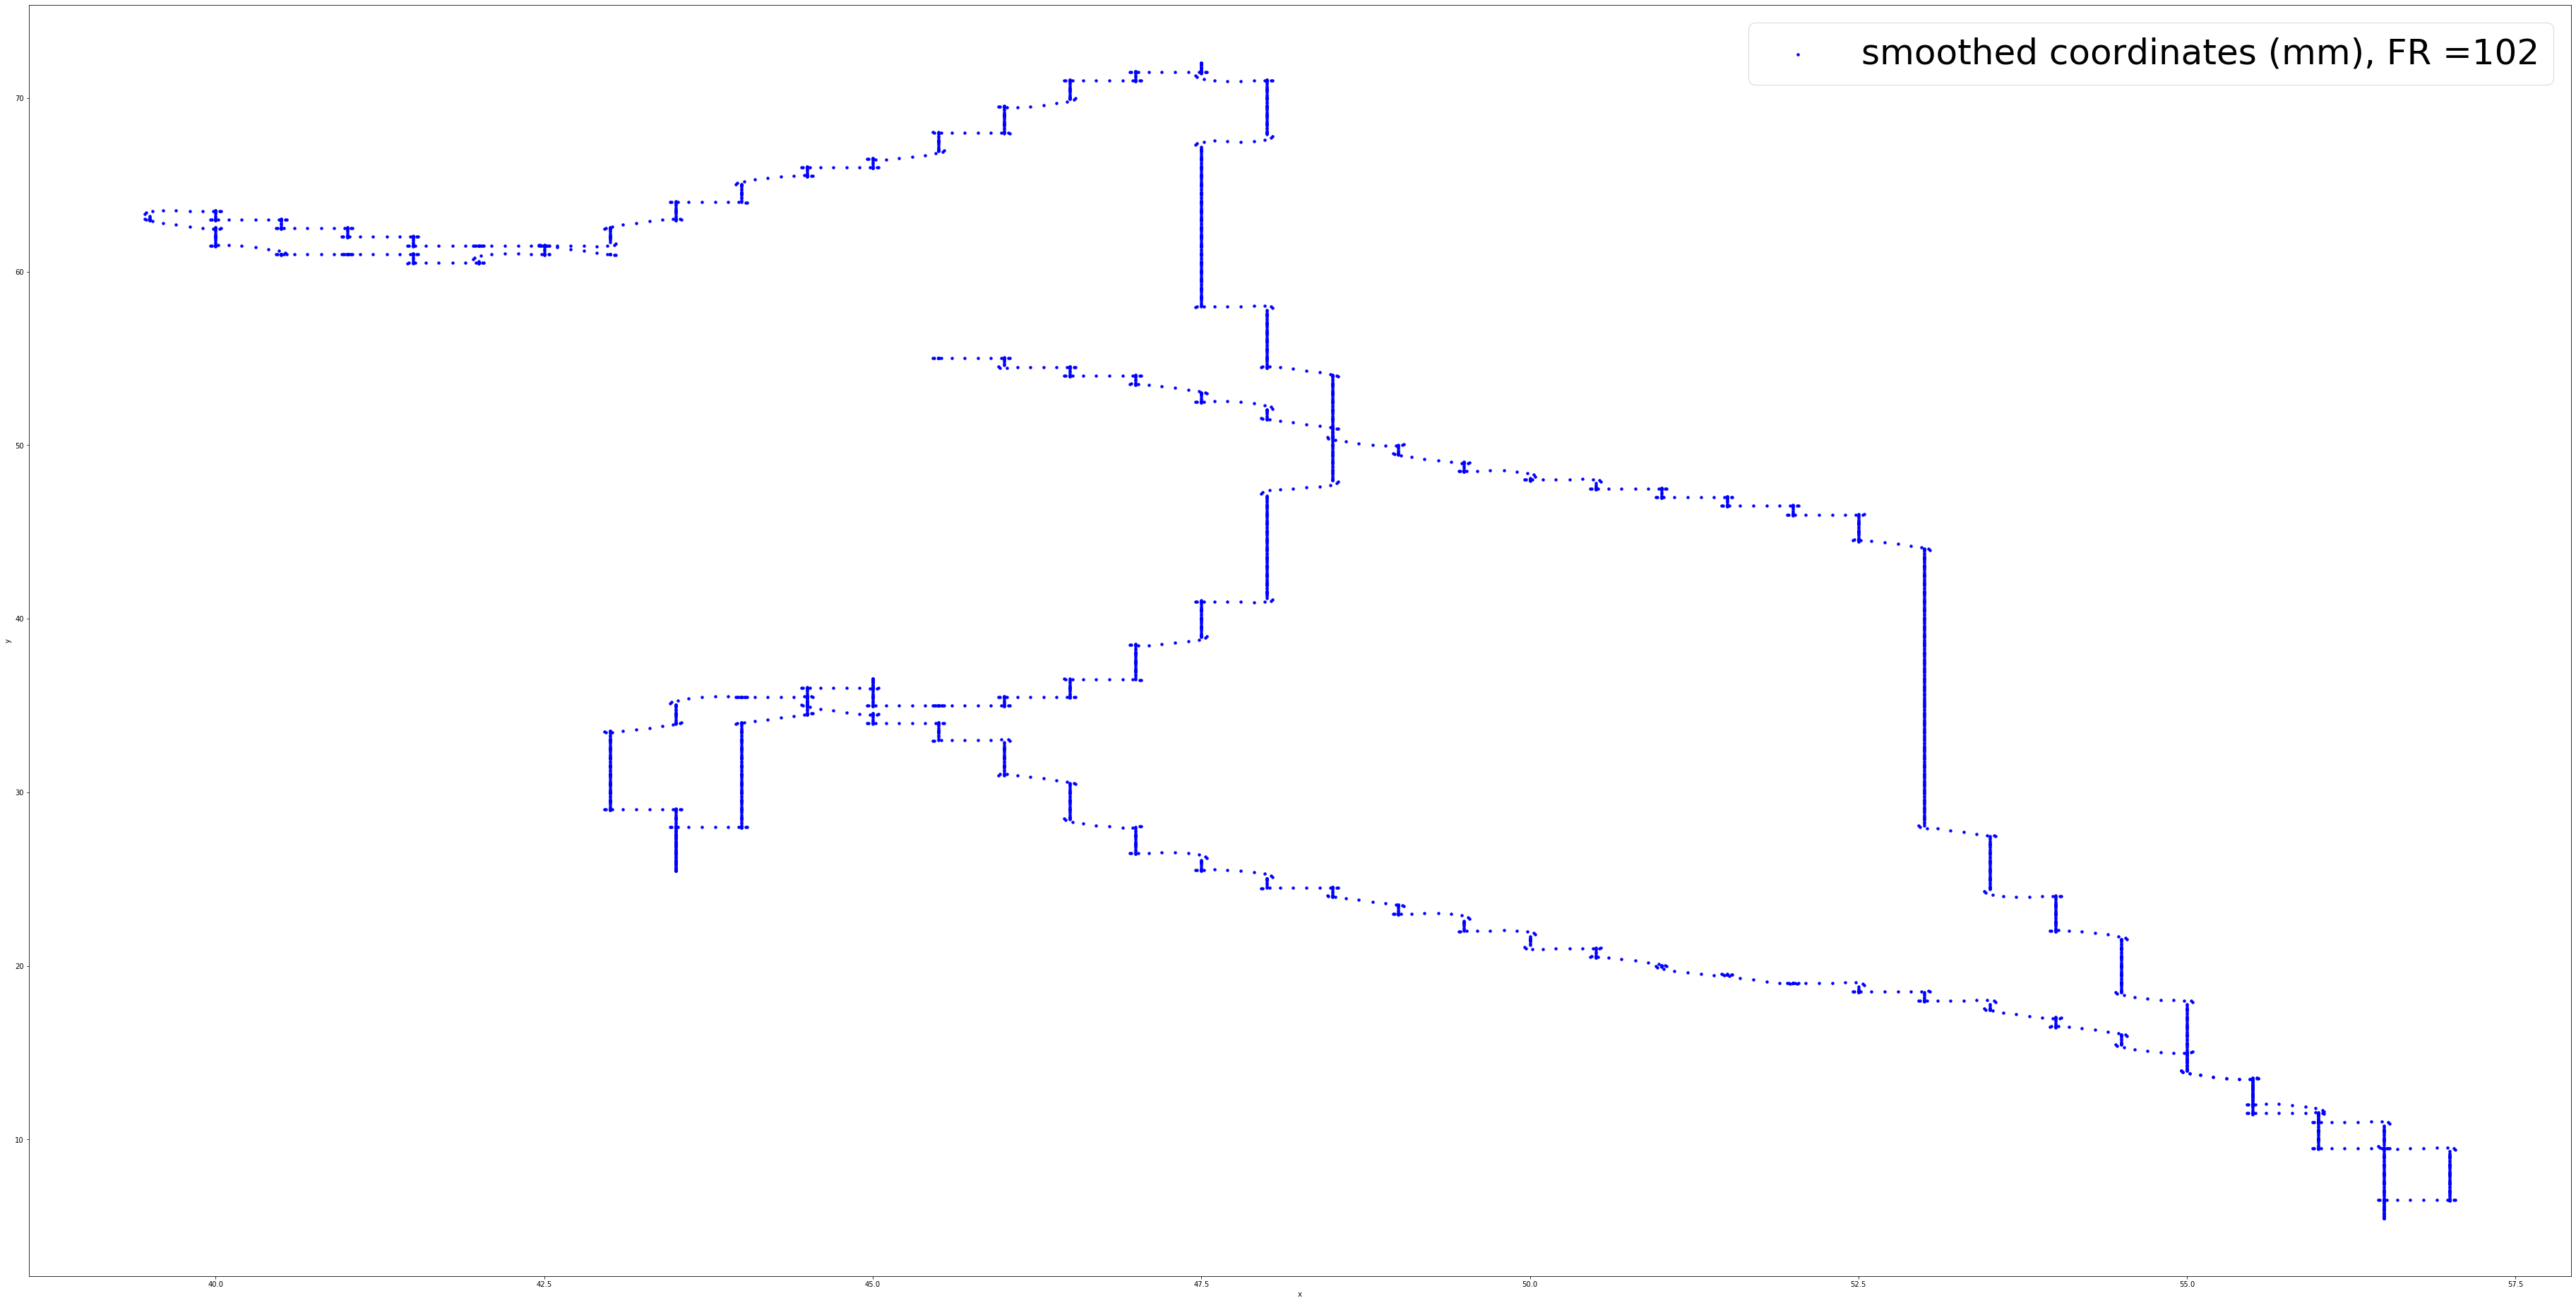

In [14]:
trajectory_new.PlotCurve(animals_low34[1])
trajectory_new.PlotCurve(animals_high34[0])
trajectory_new.PlotCurve(animals_high34[40])

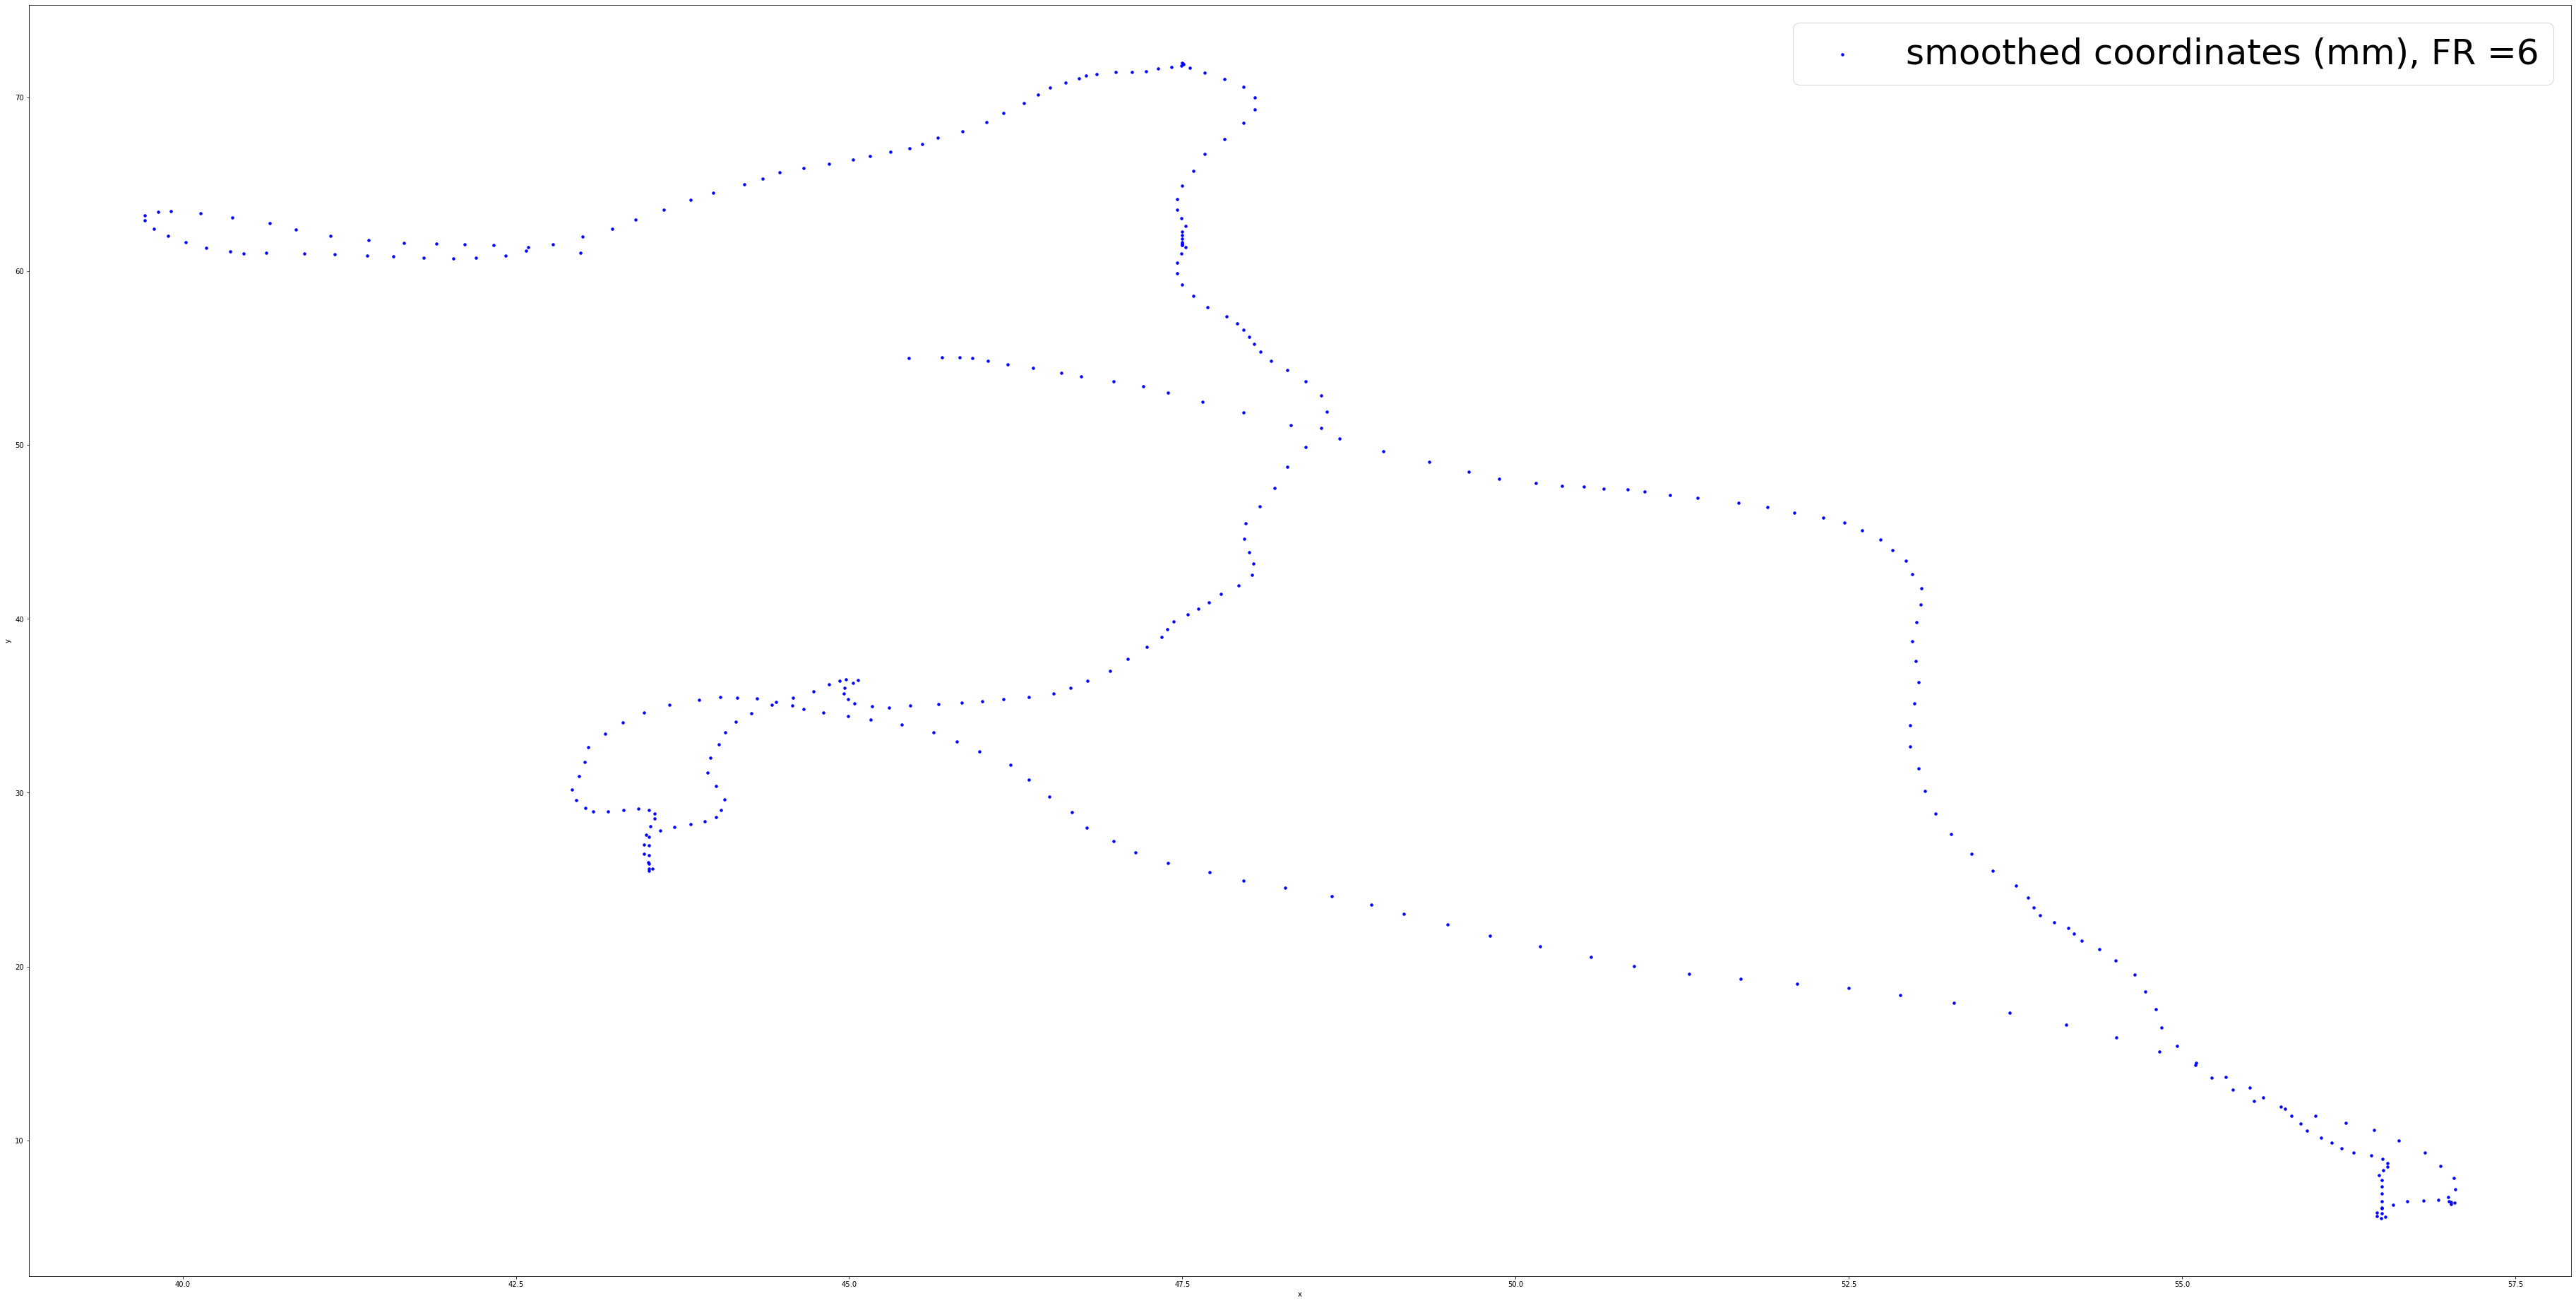

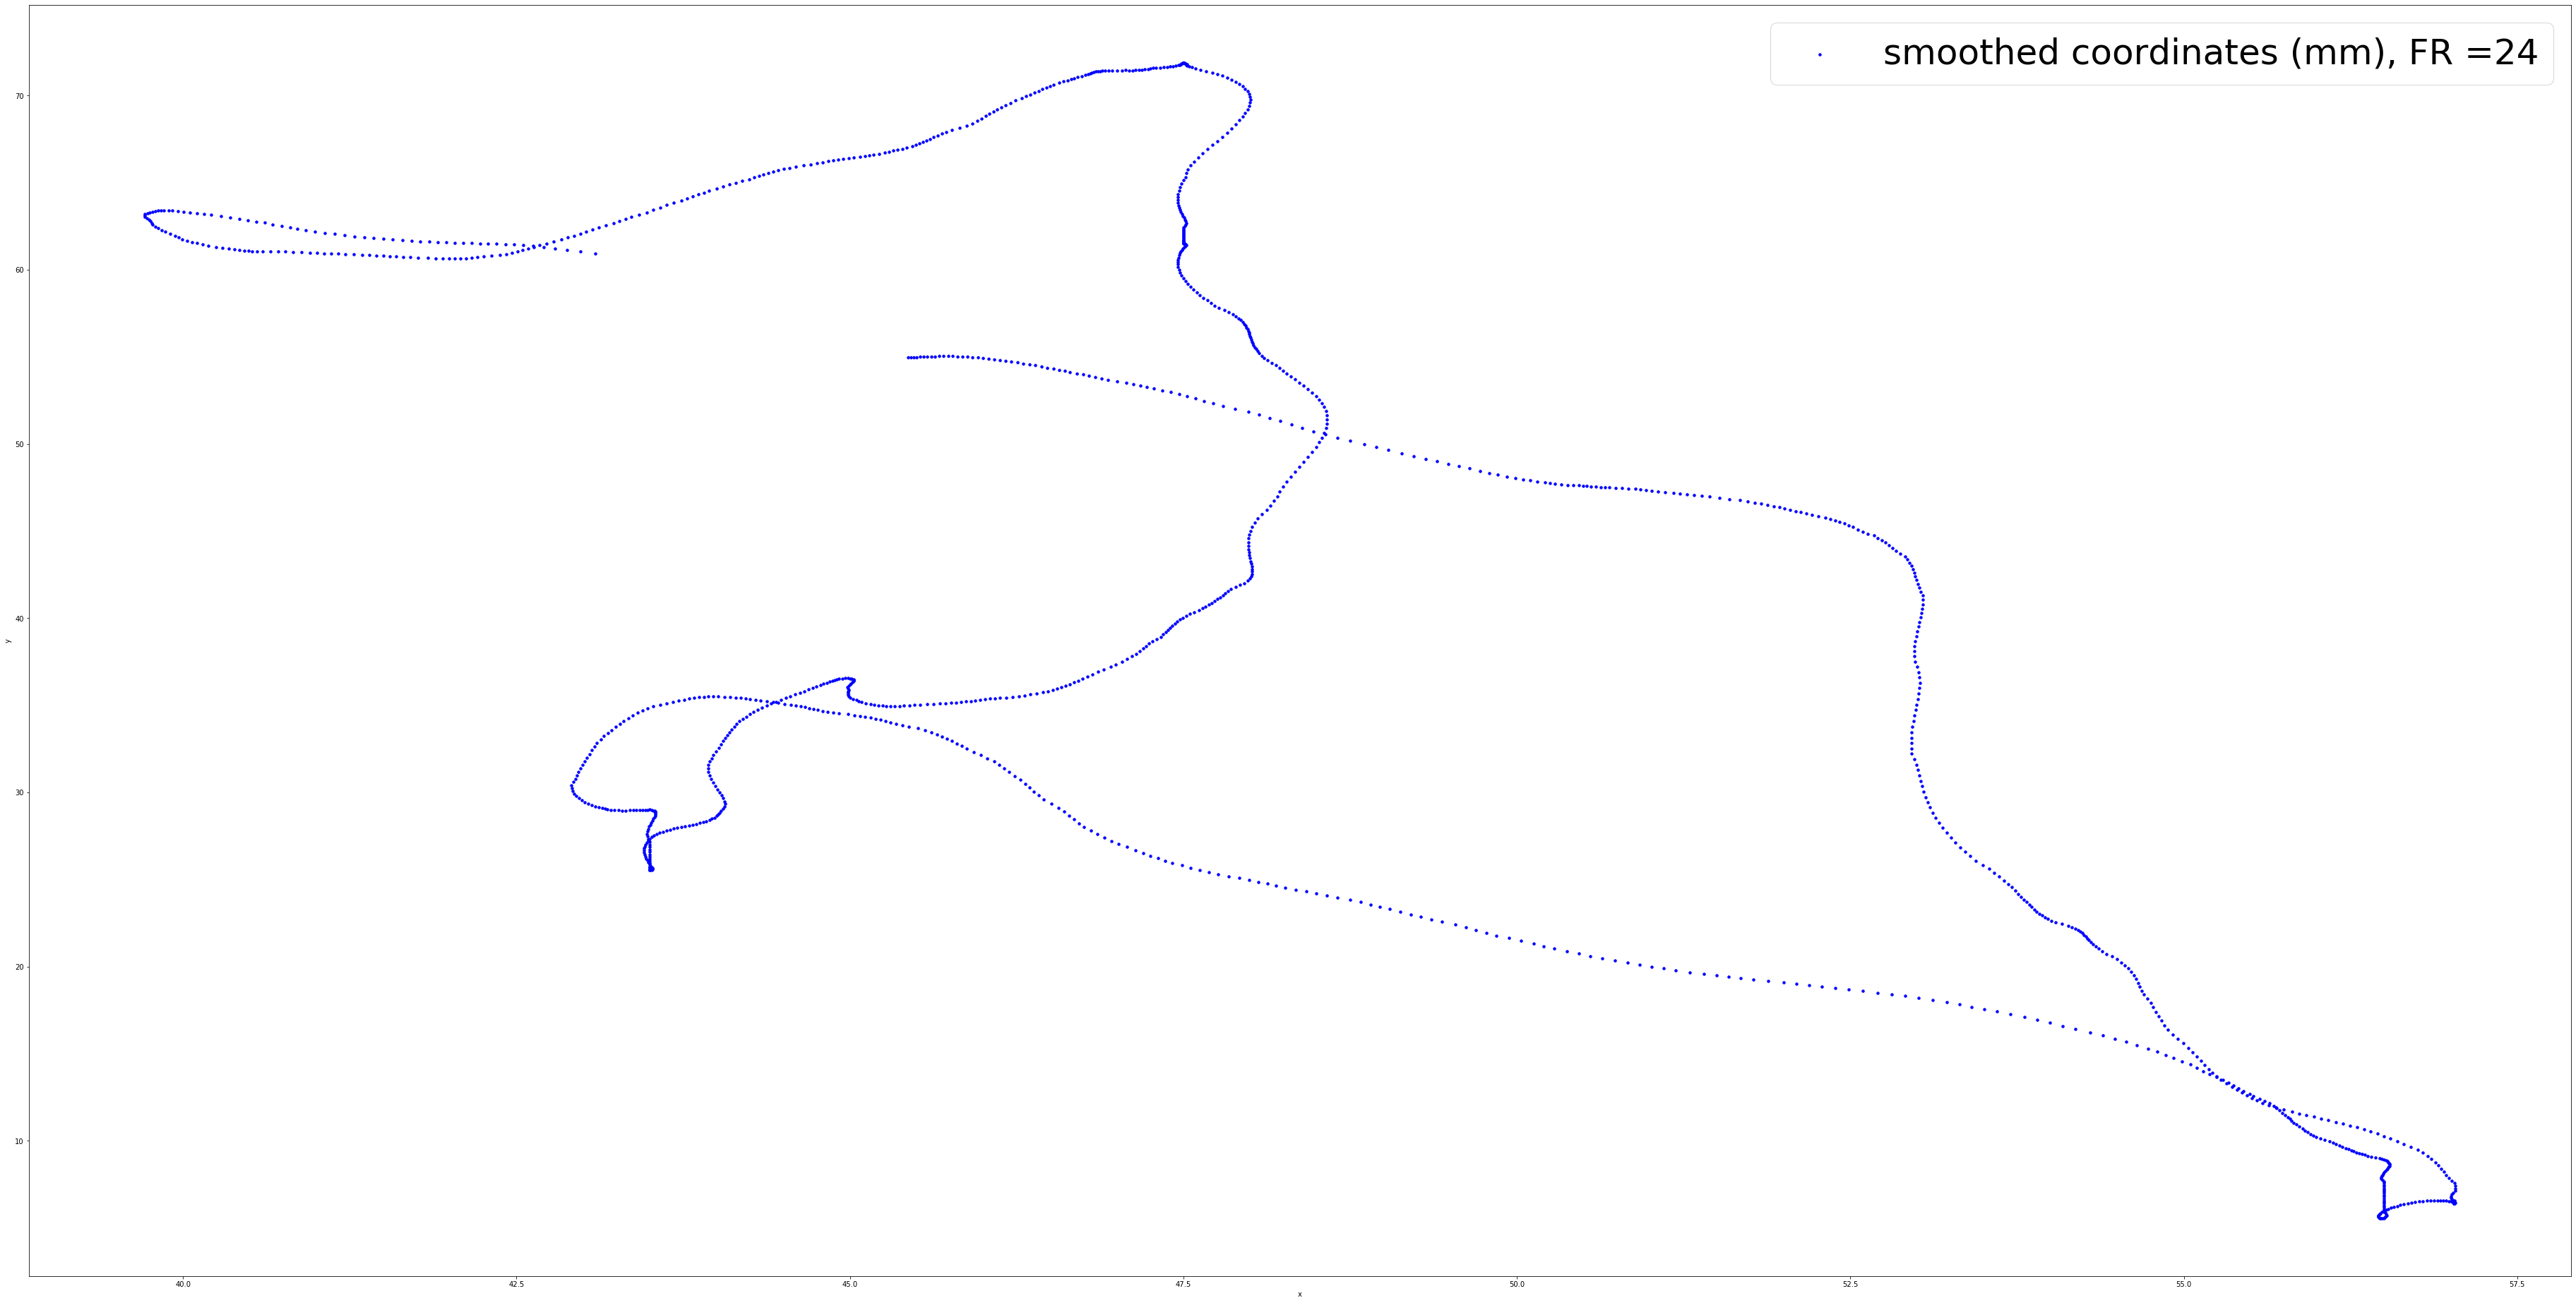

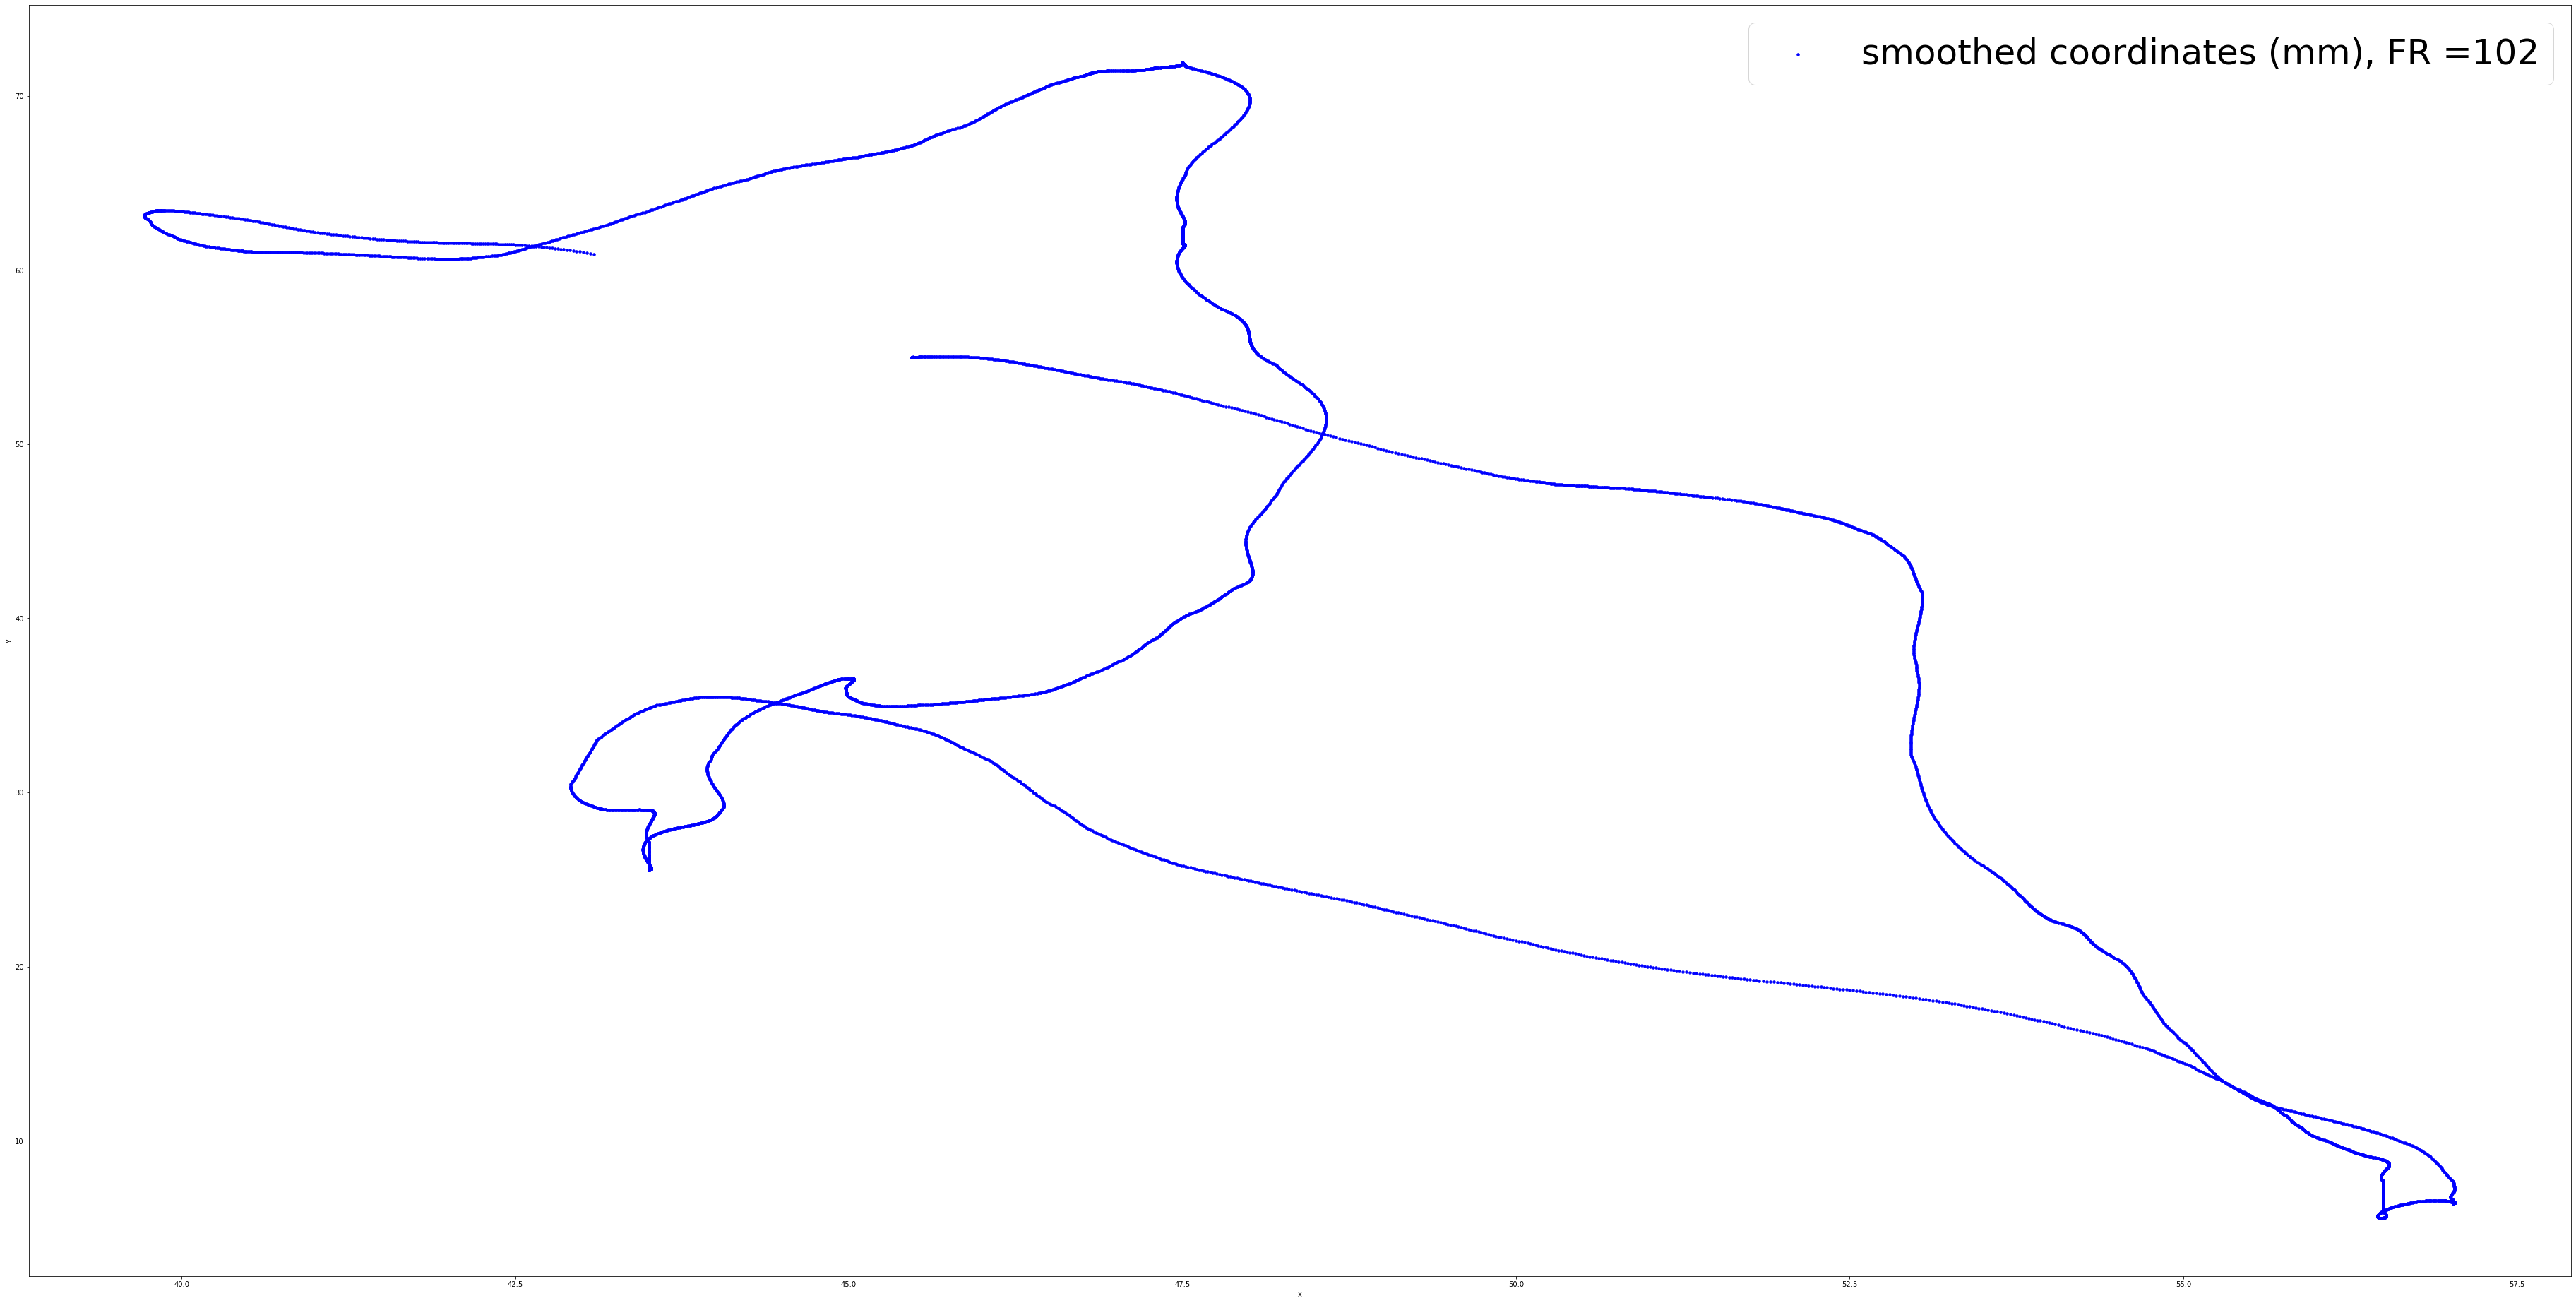

In [15]:
#window length has to be sufficiently large, perhaps try window length = FR (or FR +1 if FR is even)
trajectory_old.PlotCurve(animals_low34[1])
trajectory_old.PlotCurve(animals_high34[0])
trajectory_old.PlotCurve(animals_high34[40])

In [16]:
os.chdir('/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests')
import trajectory_old_ord3

importing Jupyter notebook from trajectory_old_ord3.ipynb


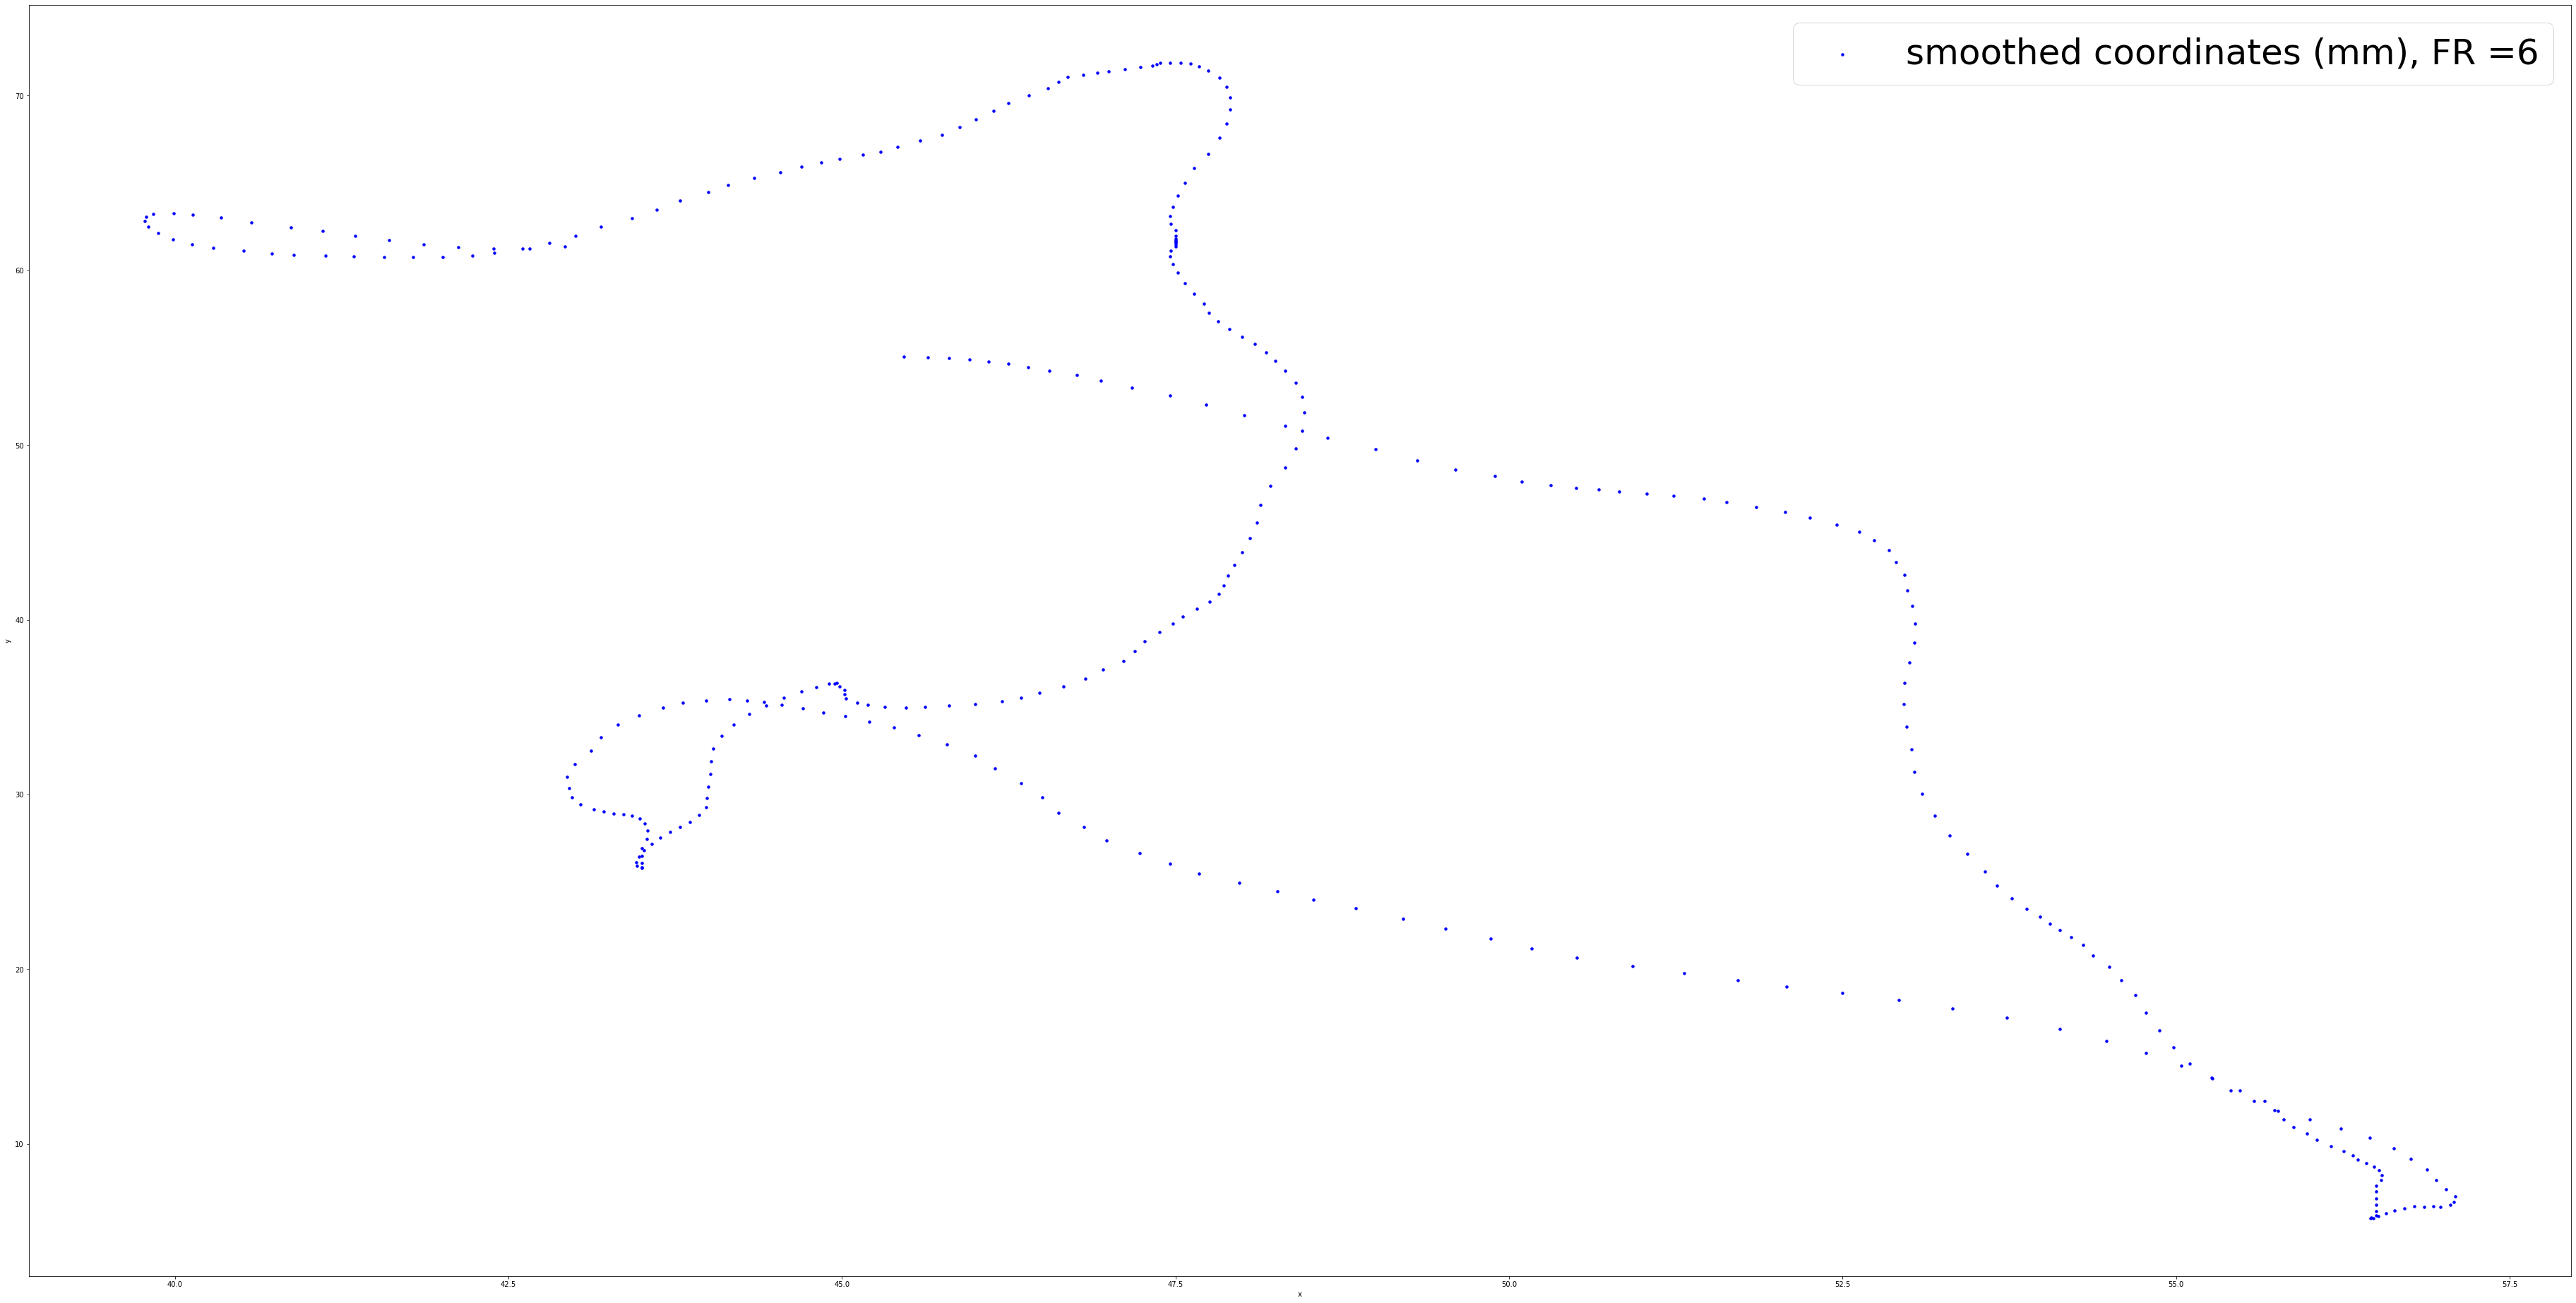

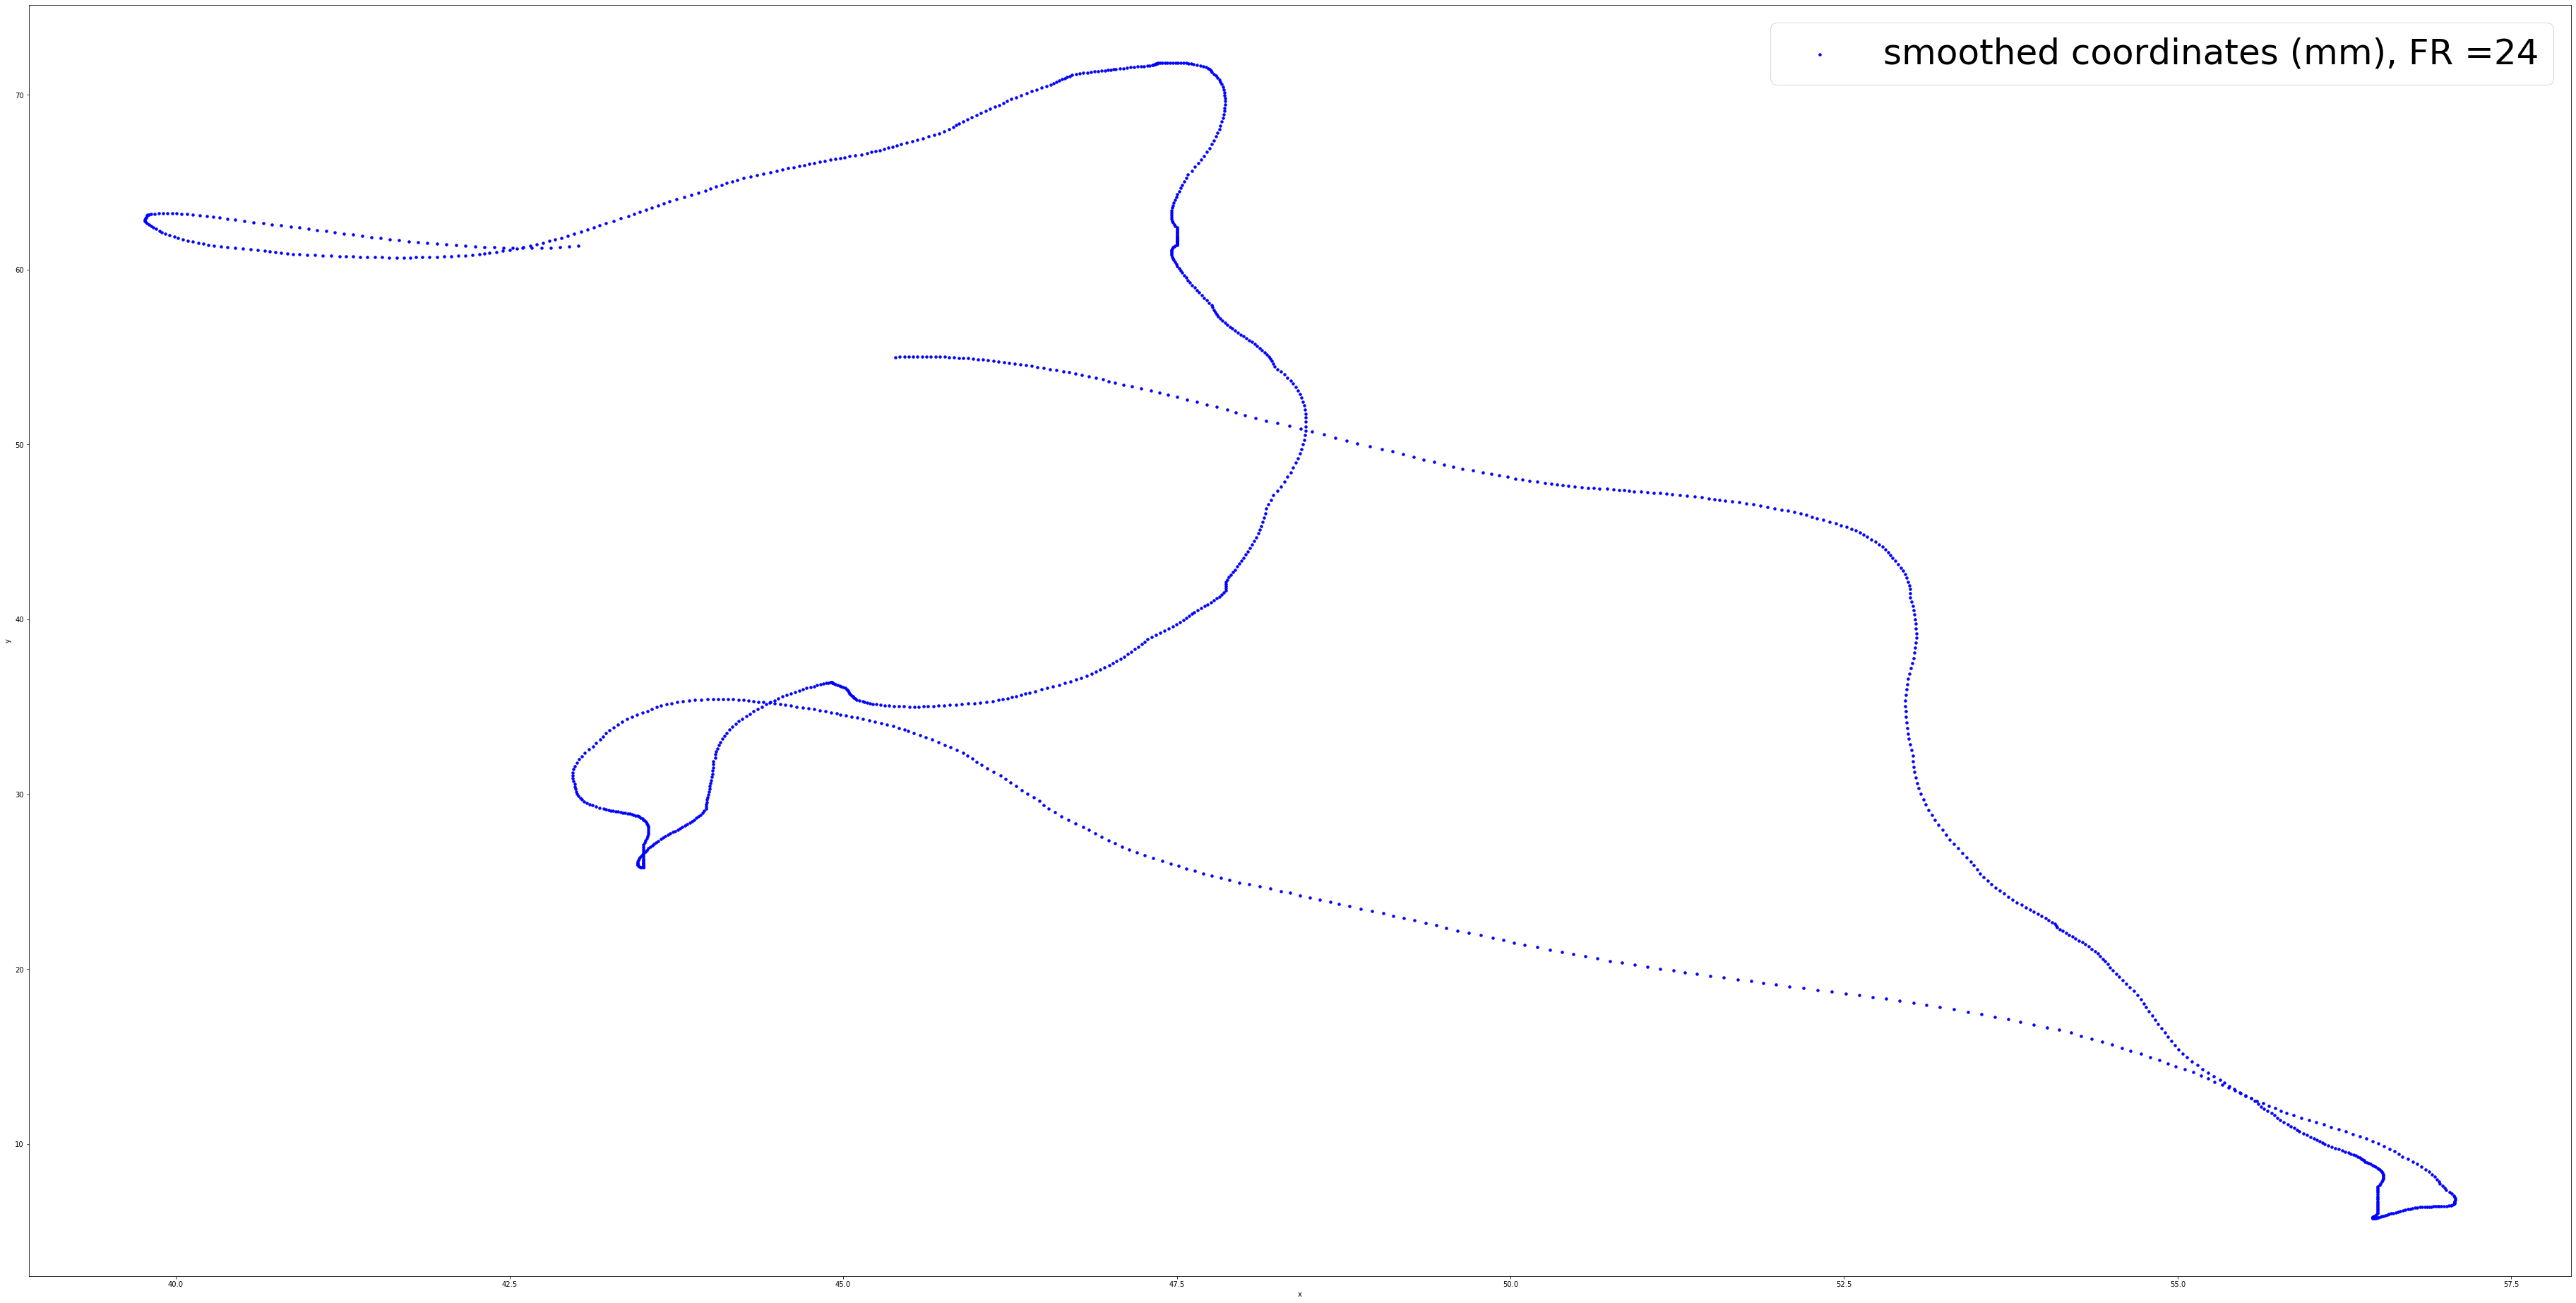

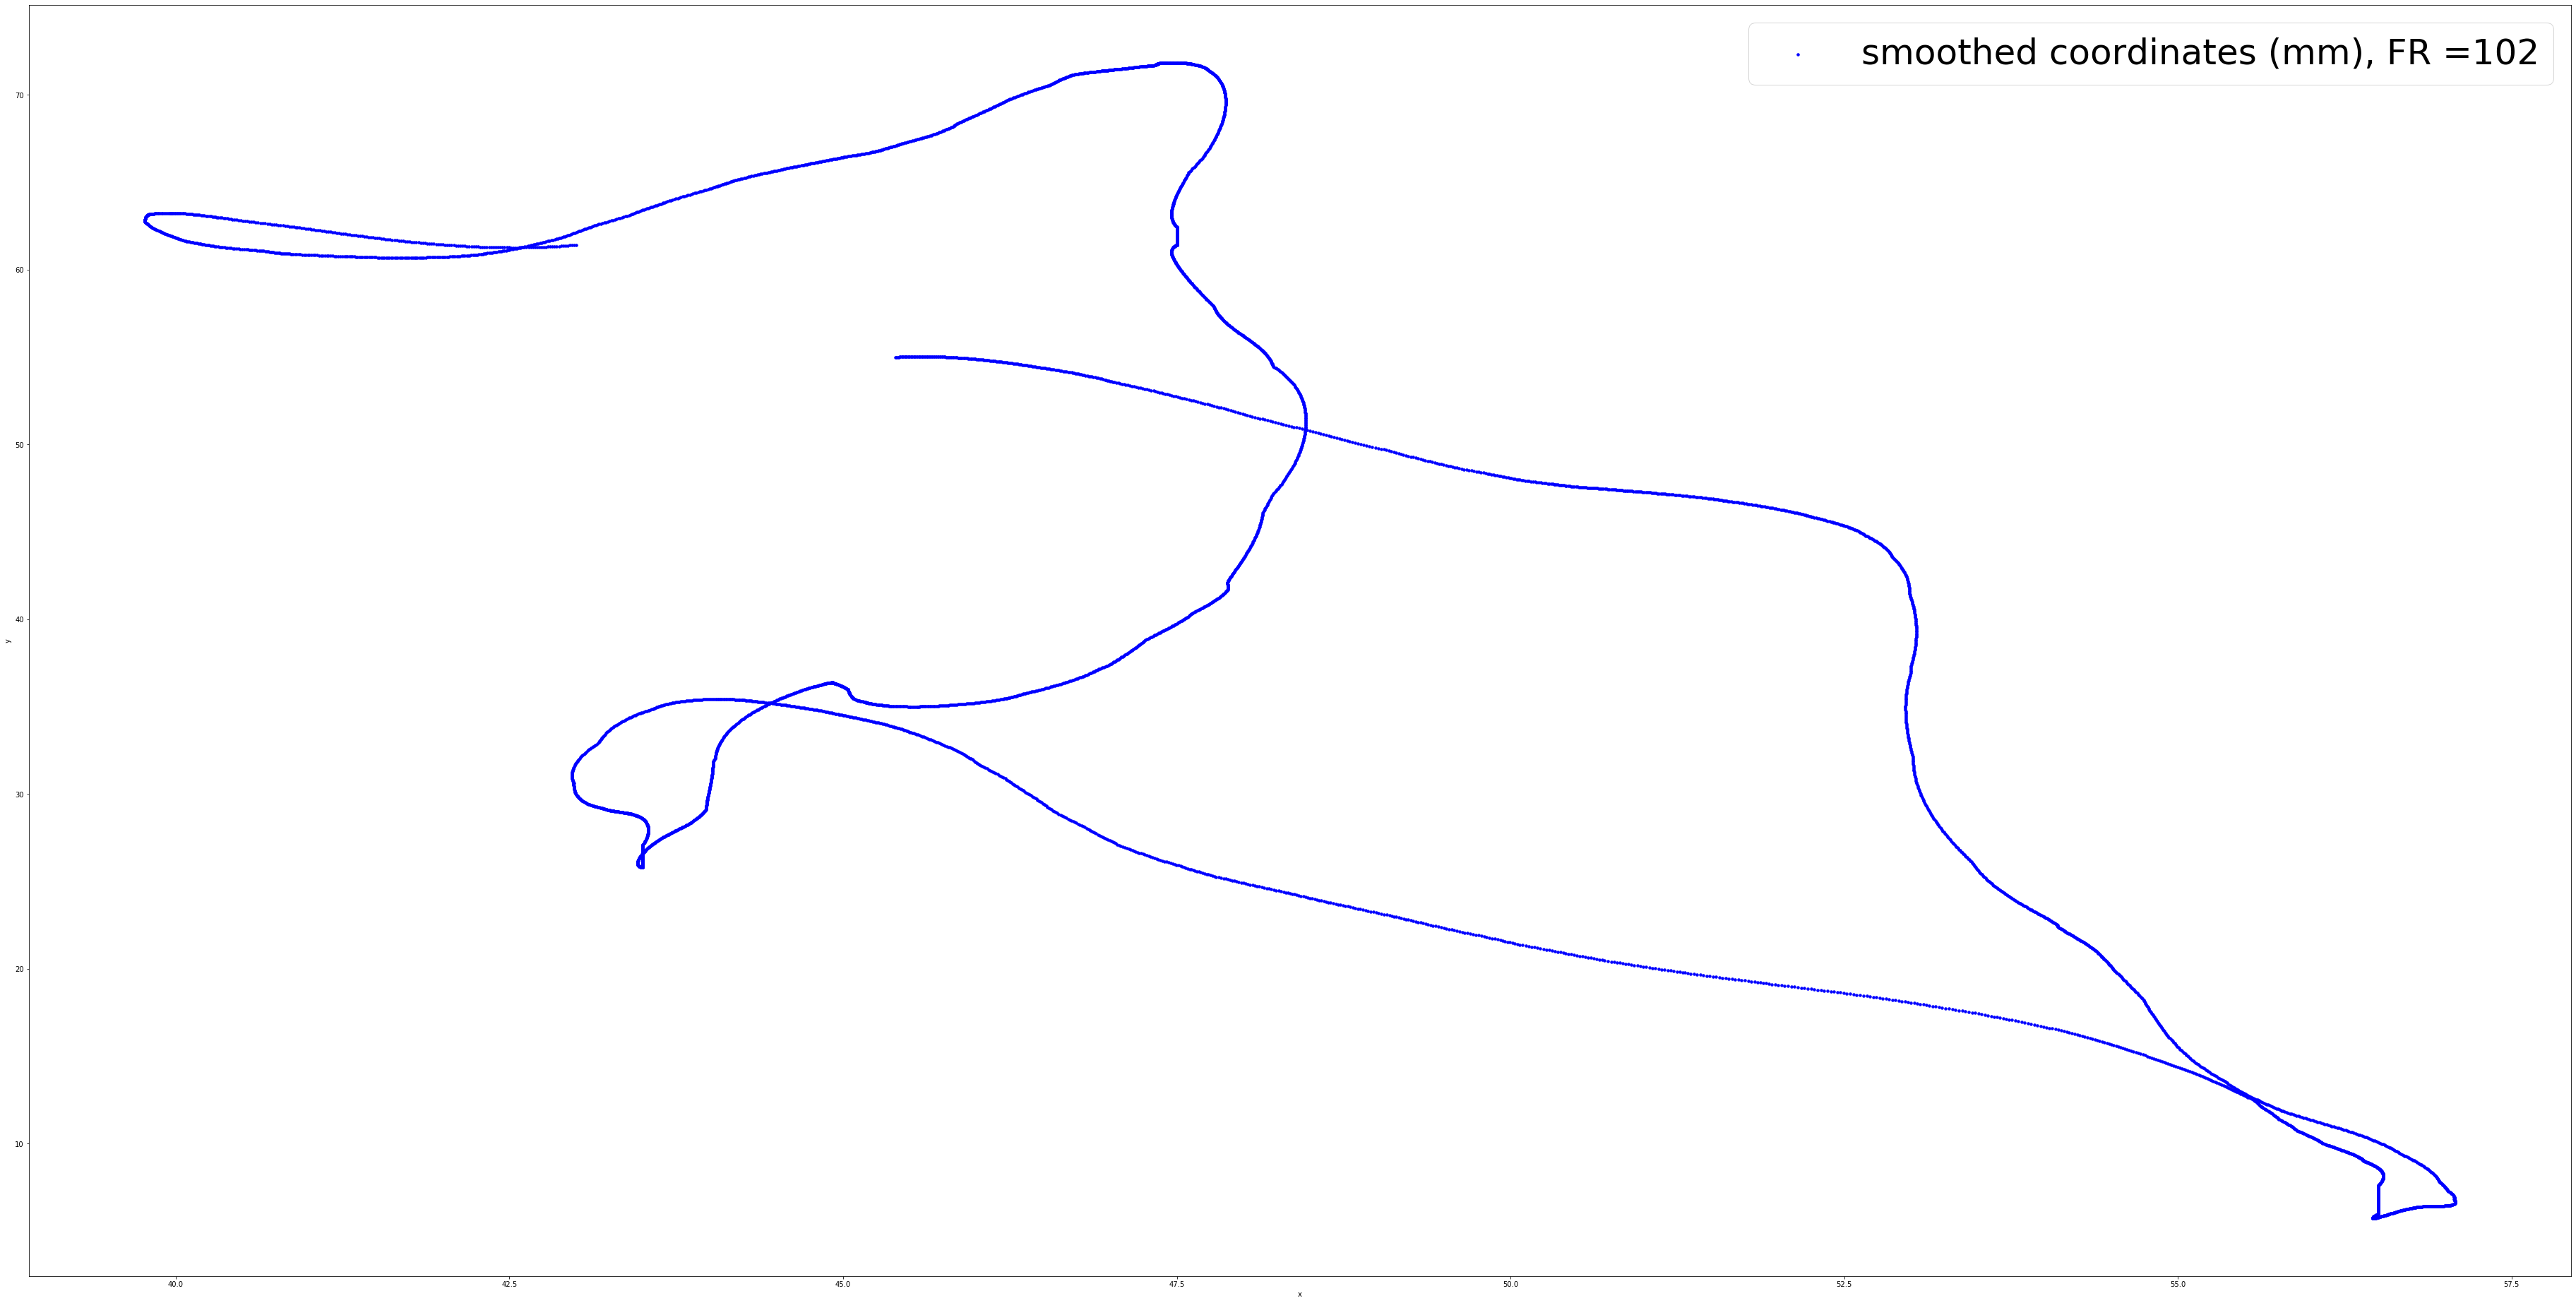

In [17]:
trajectory_old_ord3.PlotCurve(animals_low34[1])
trajectory_old_ord3.PlotCurve(animals_high34[0])
trajectory_old_ord3.PlotCurve(animals_high34[40])

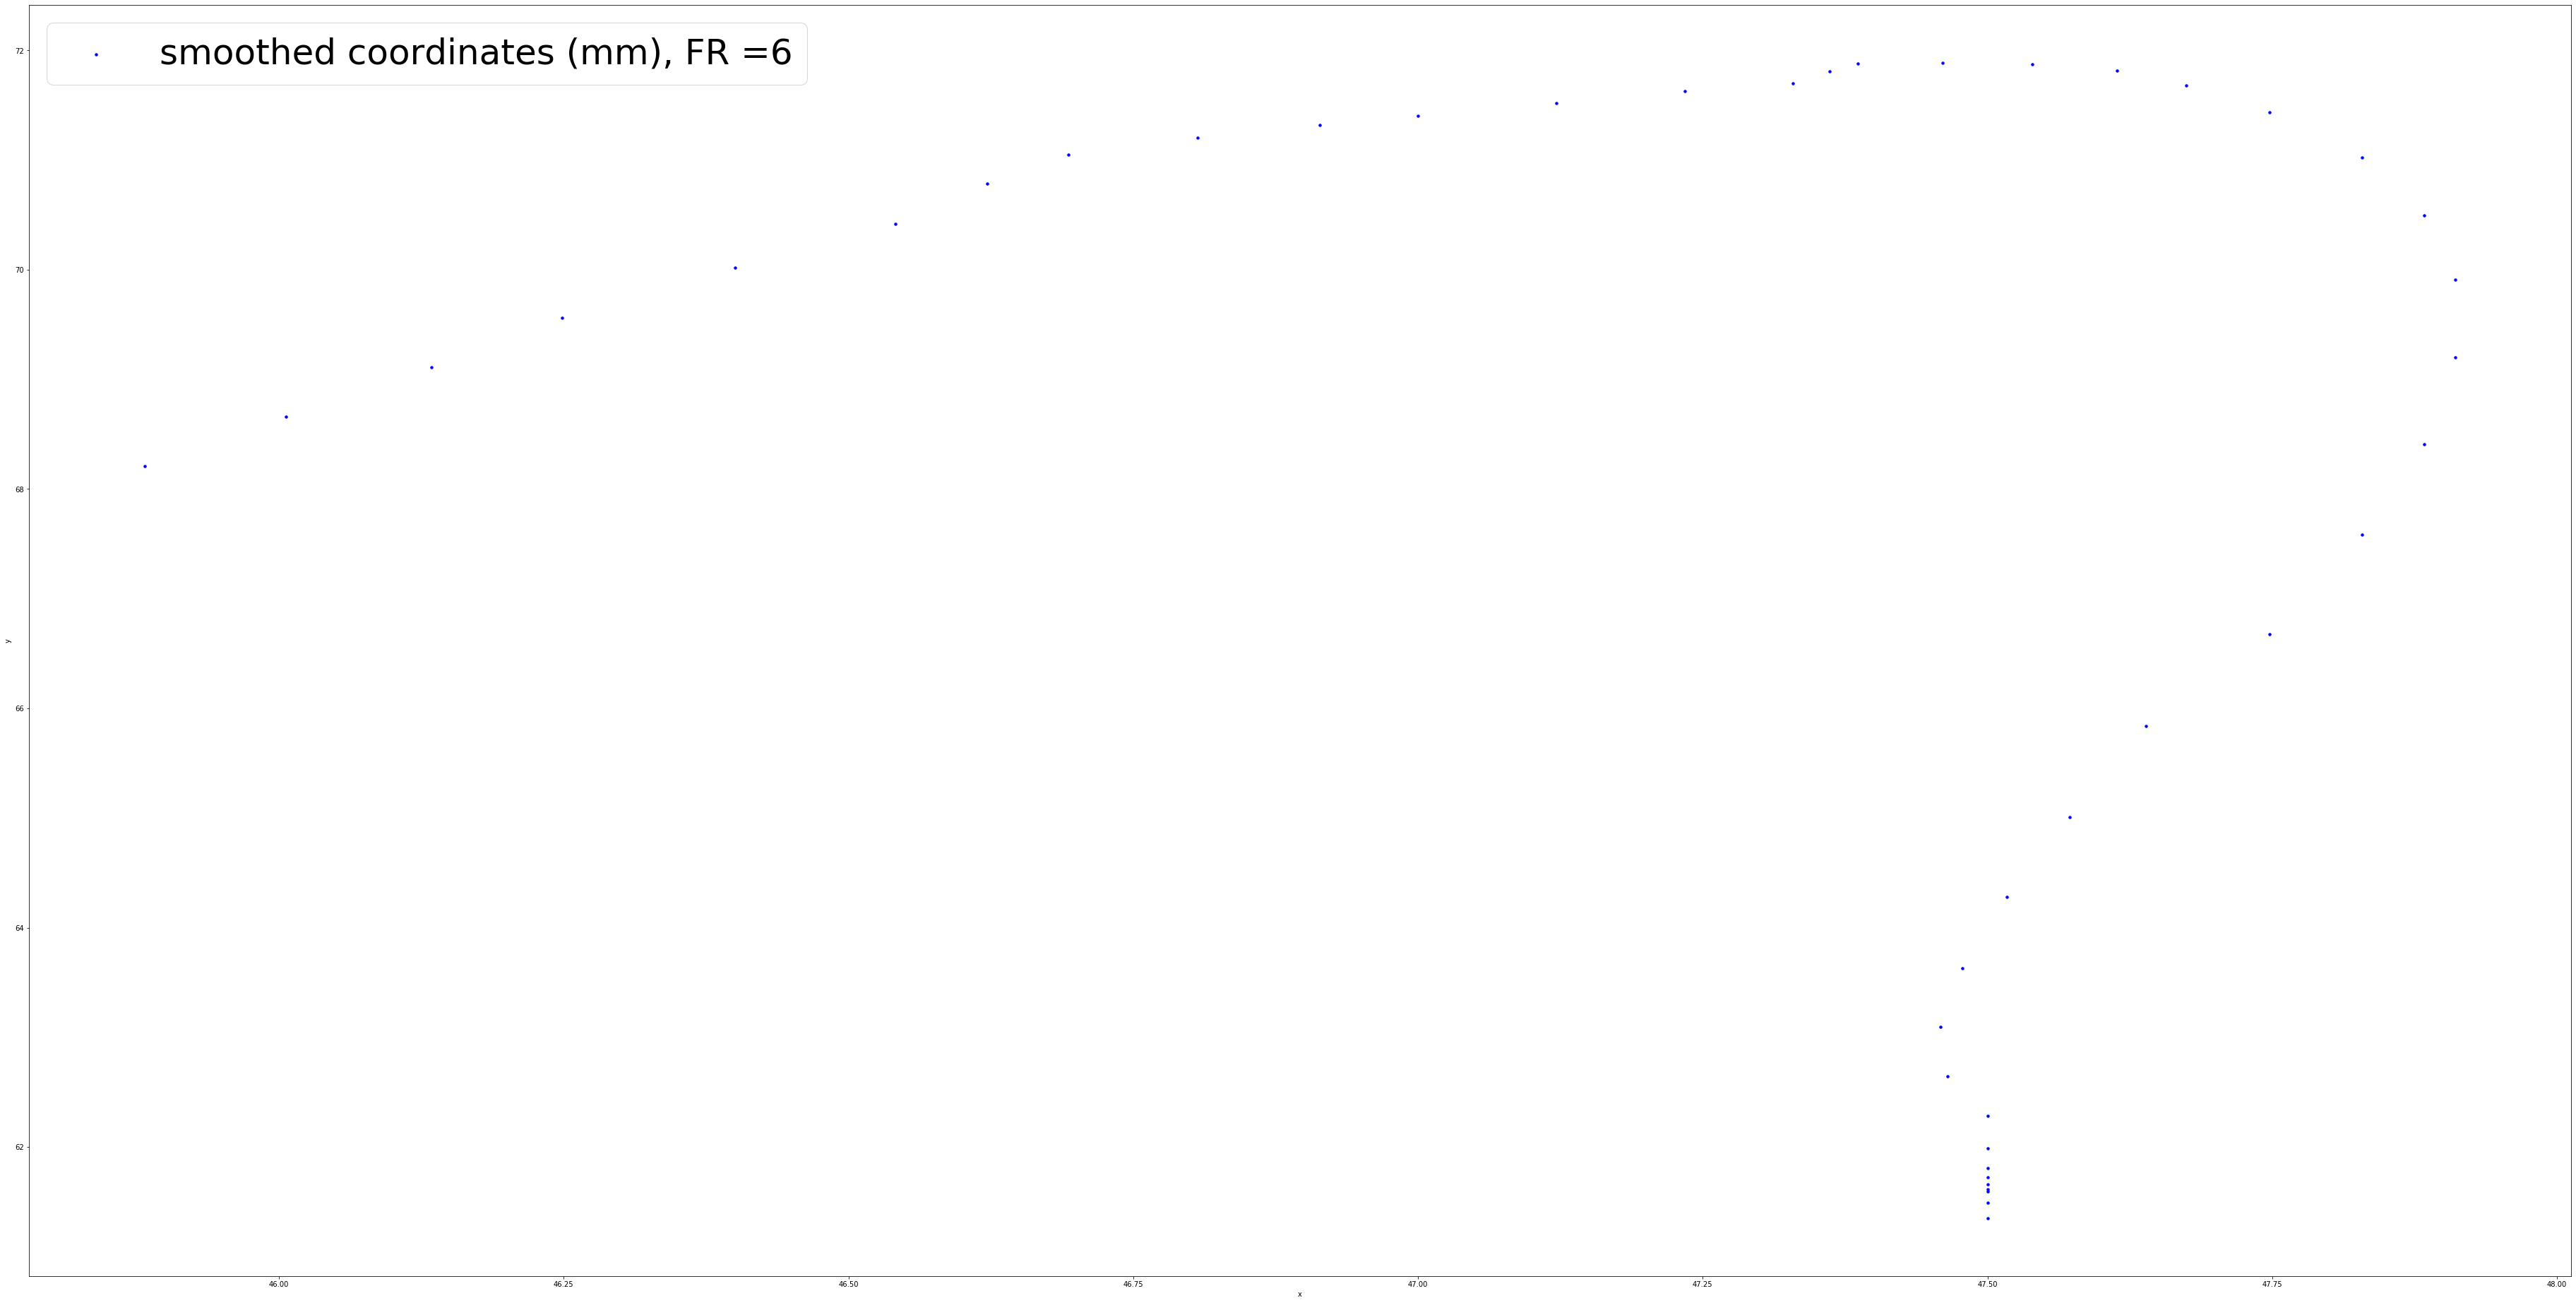

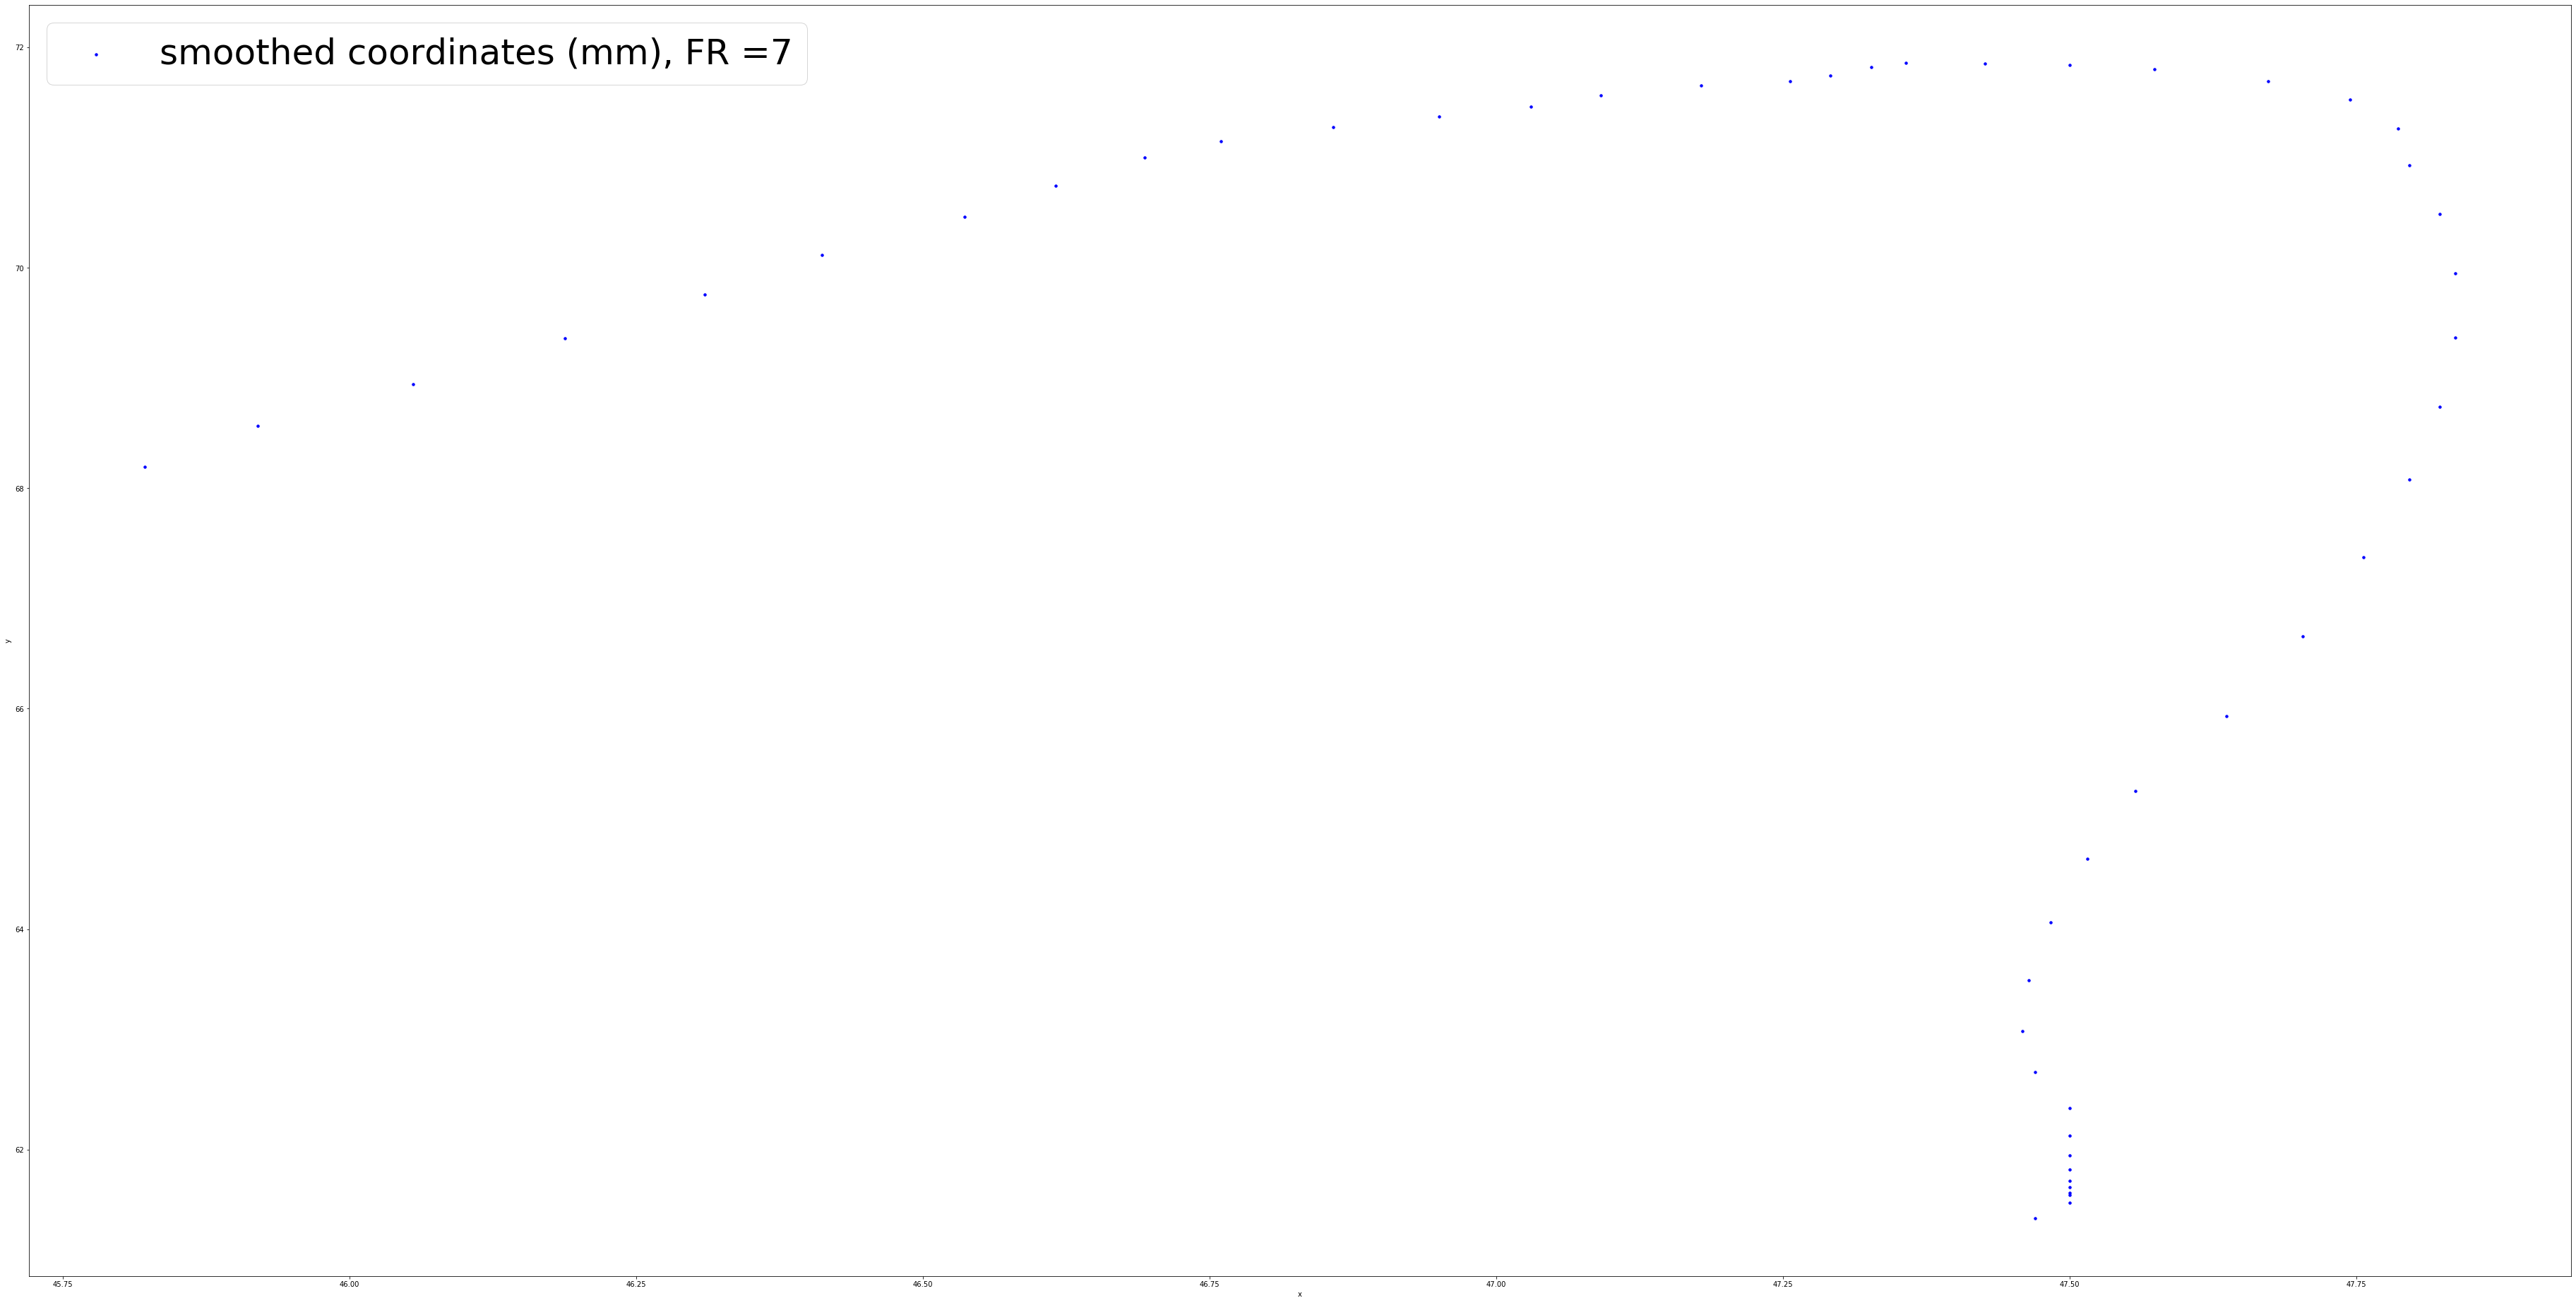

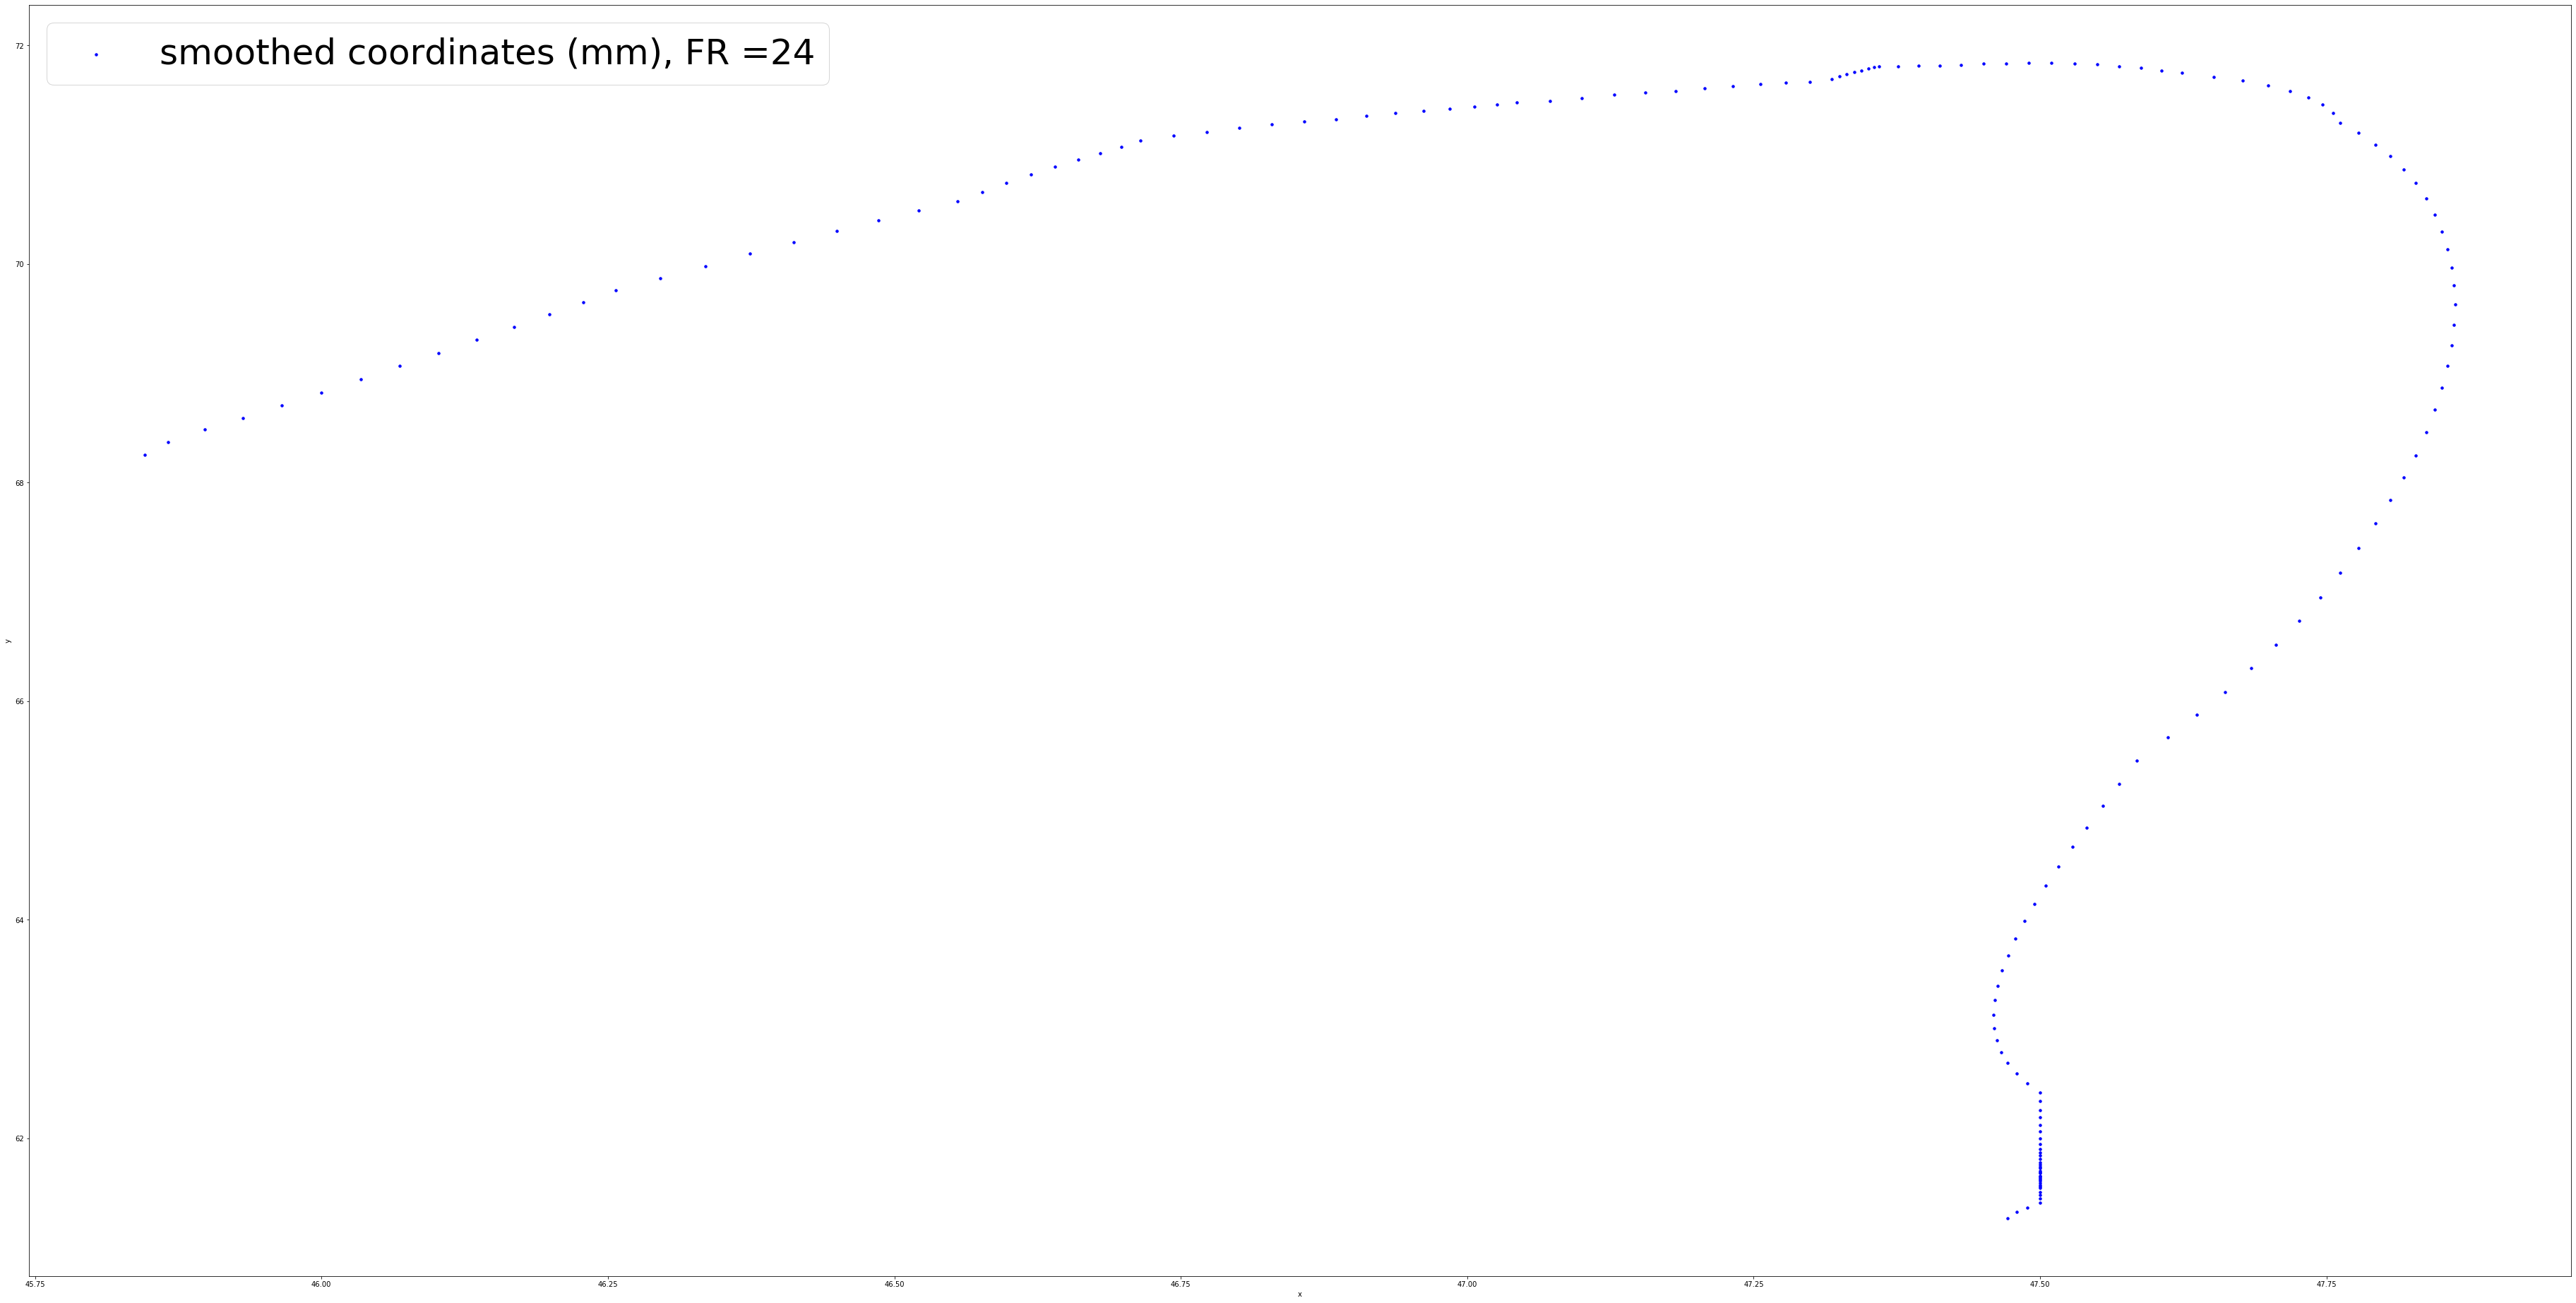

In [18]:
trajectory_old_ord3.PlotCurve(animals_low34[1], zoom_in_for_fr_range = range(50,93))
trajectory_old_ord3.PlotCurve(animals_low34[2], zoom_in_for_fr_range = range(58,108))
trajectory_old_ord3.PlotCurve(animals_high34[0], zoom_in_for_fr_range = range(200,370))

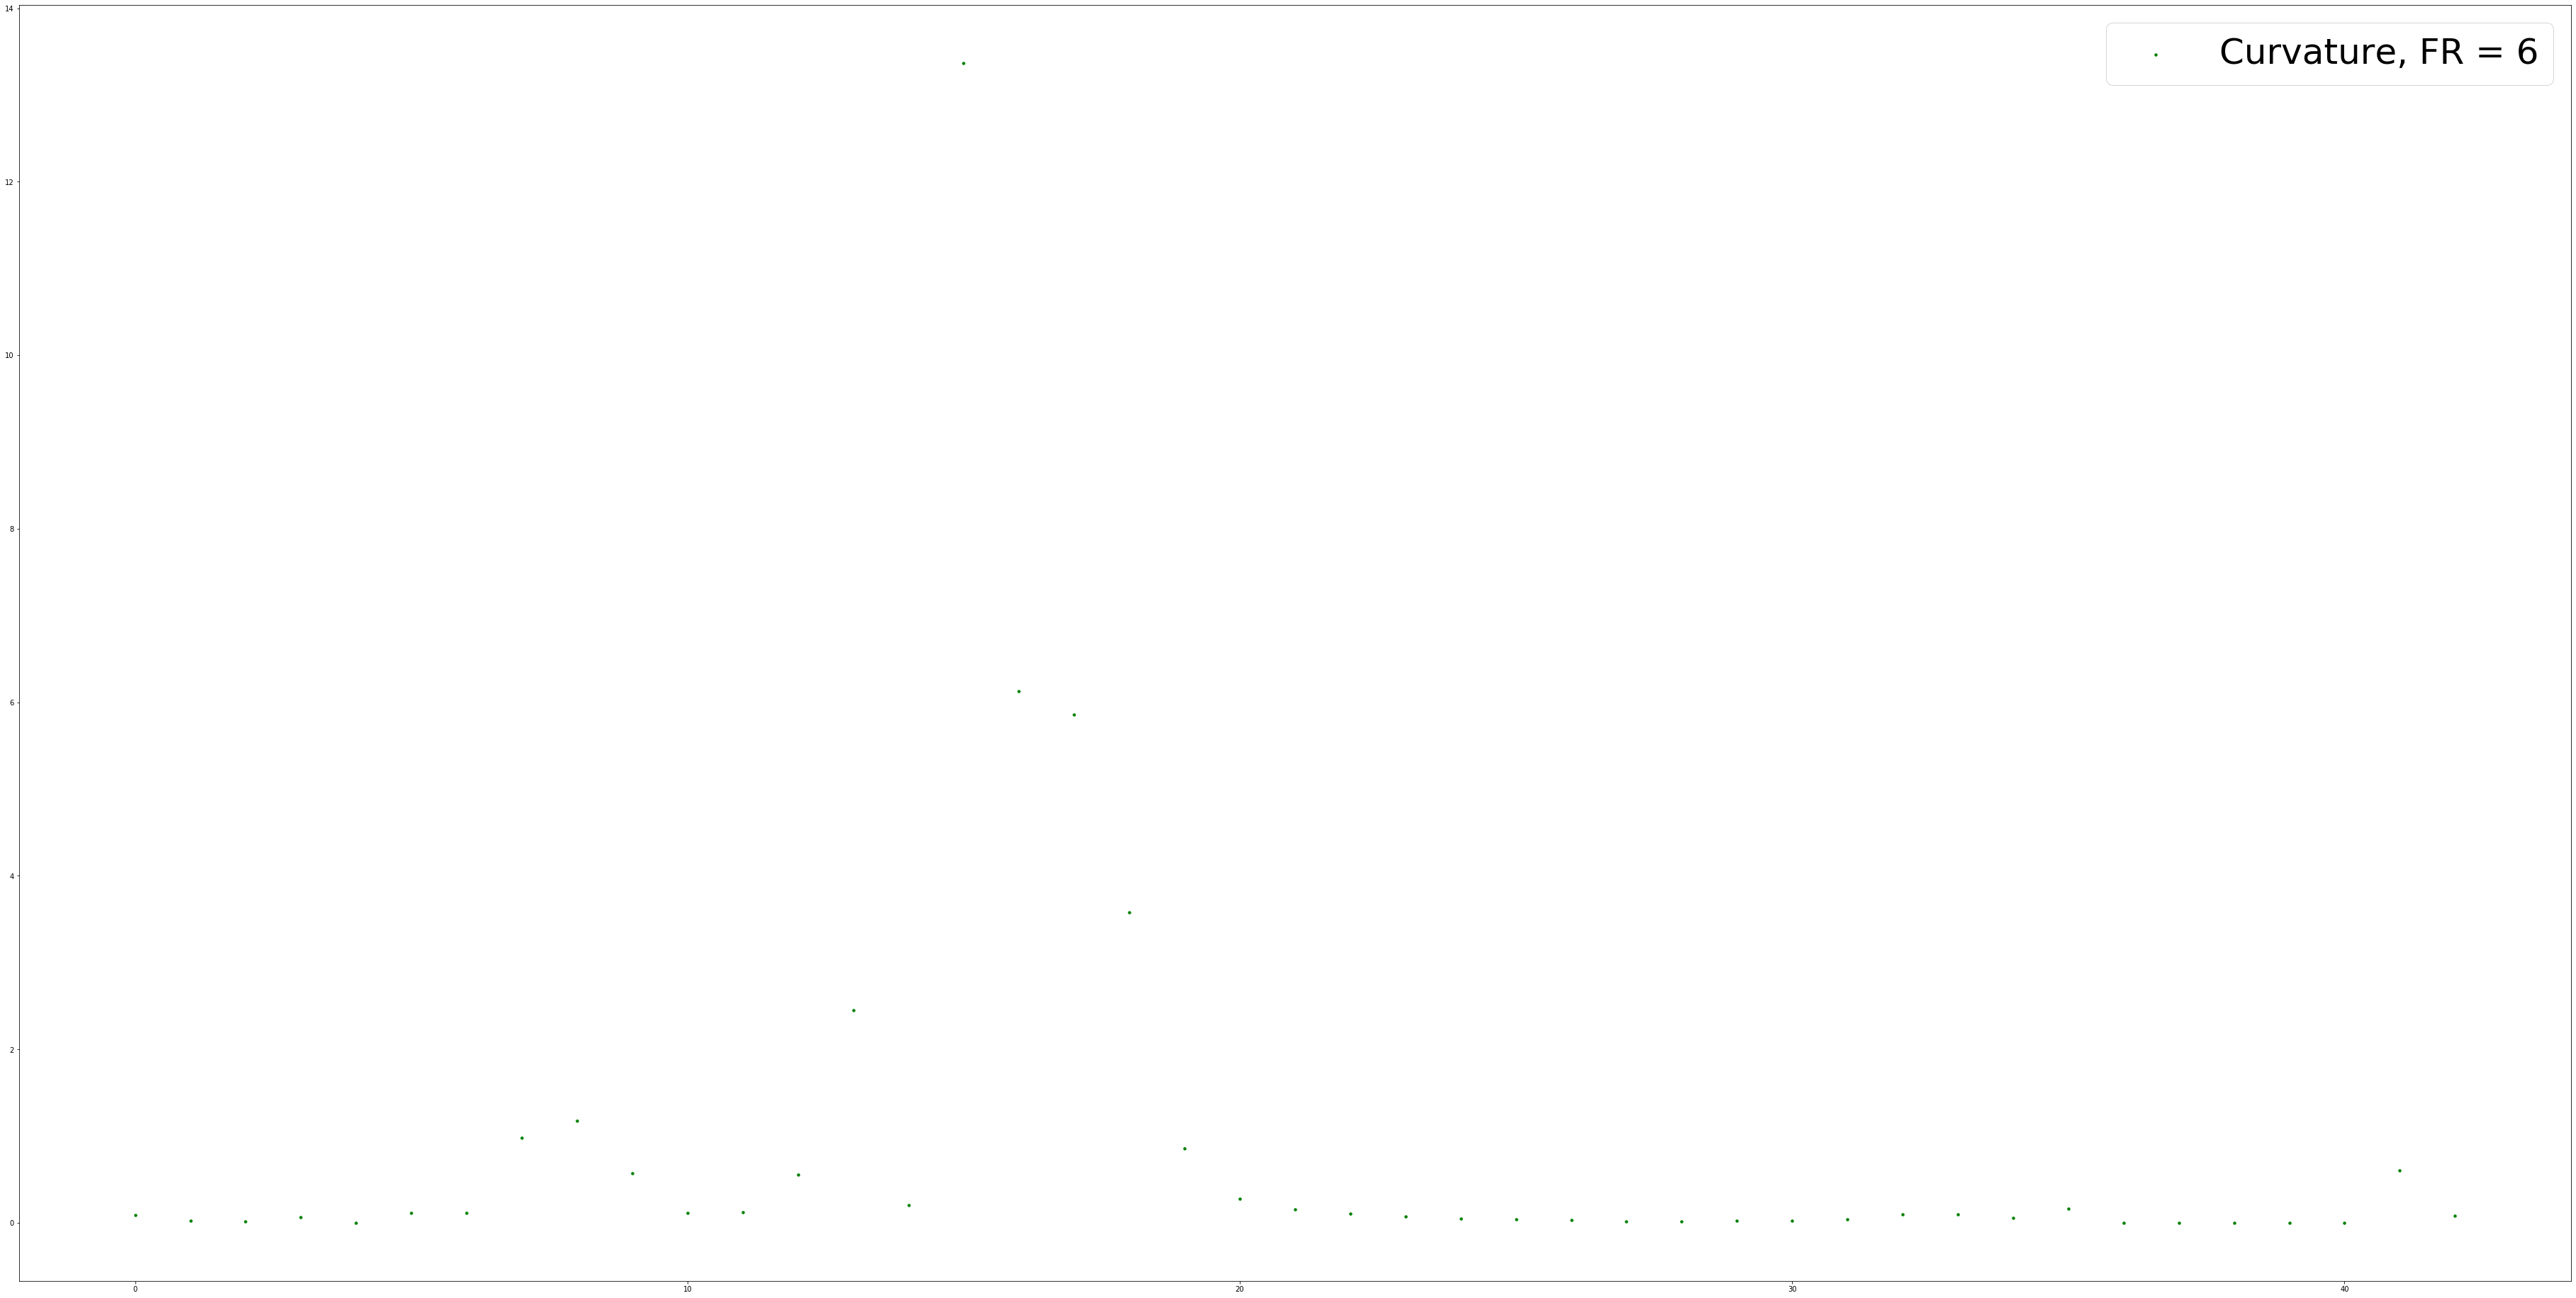

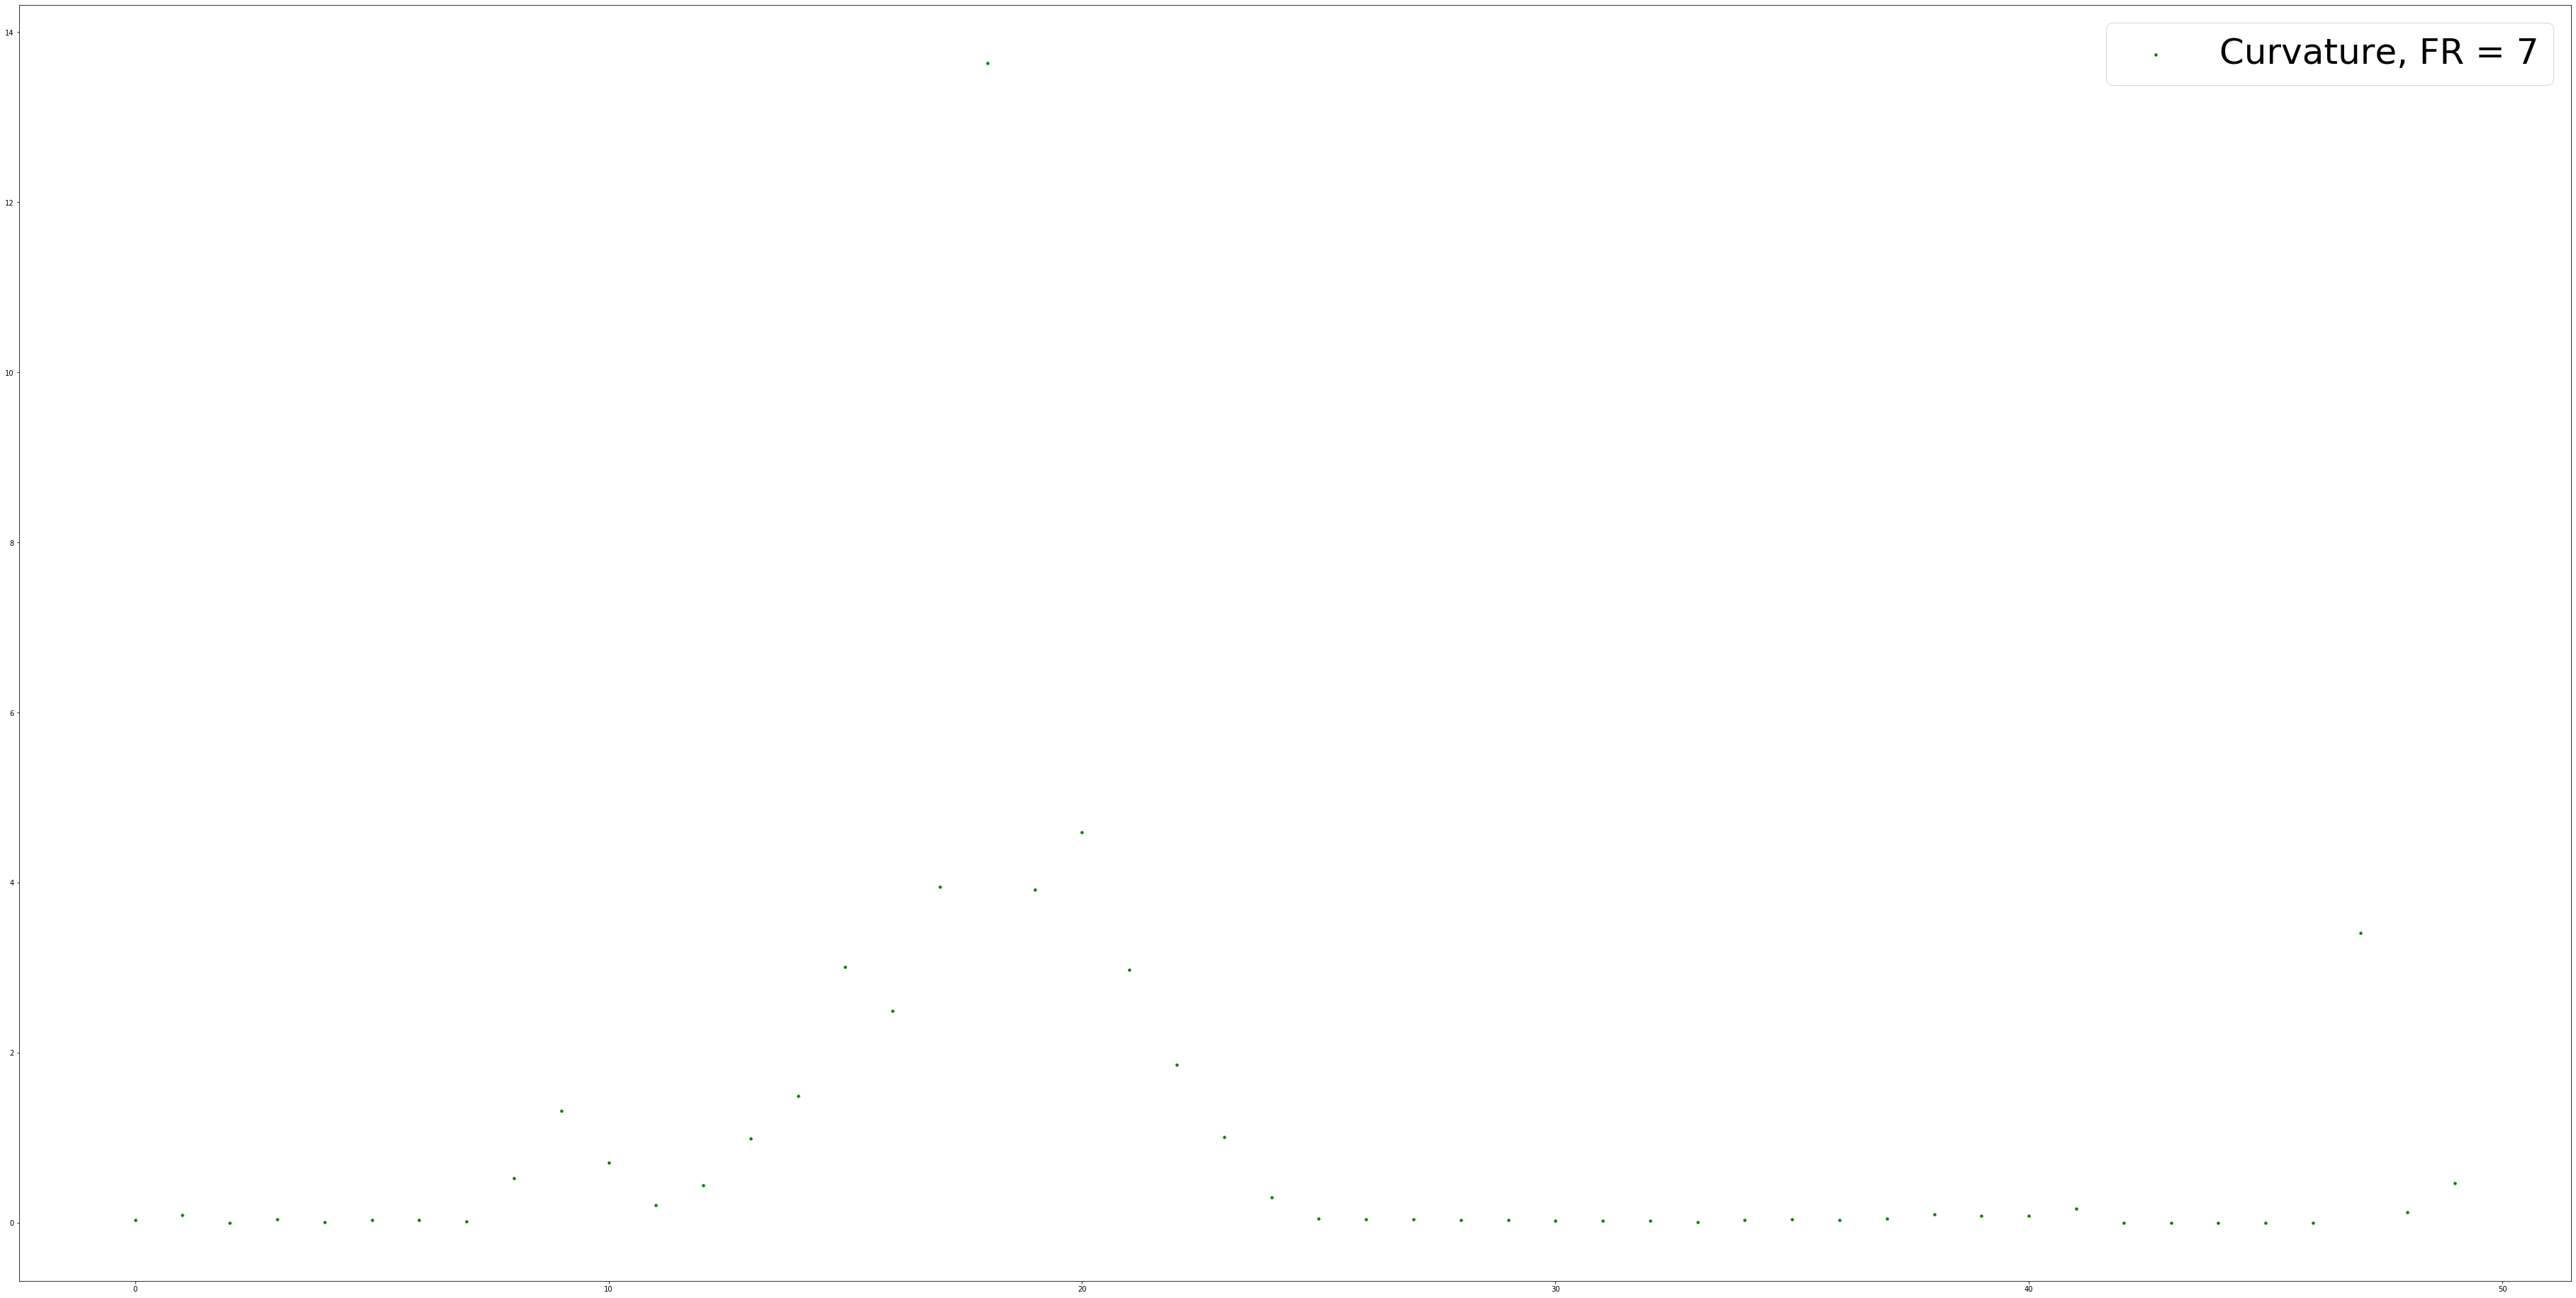

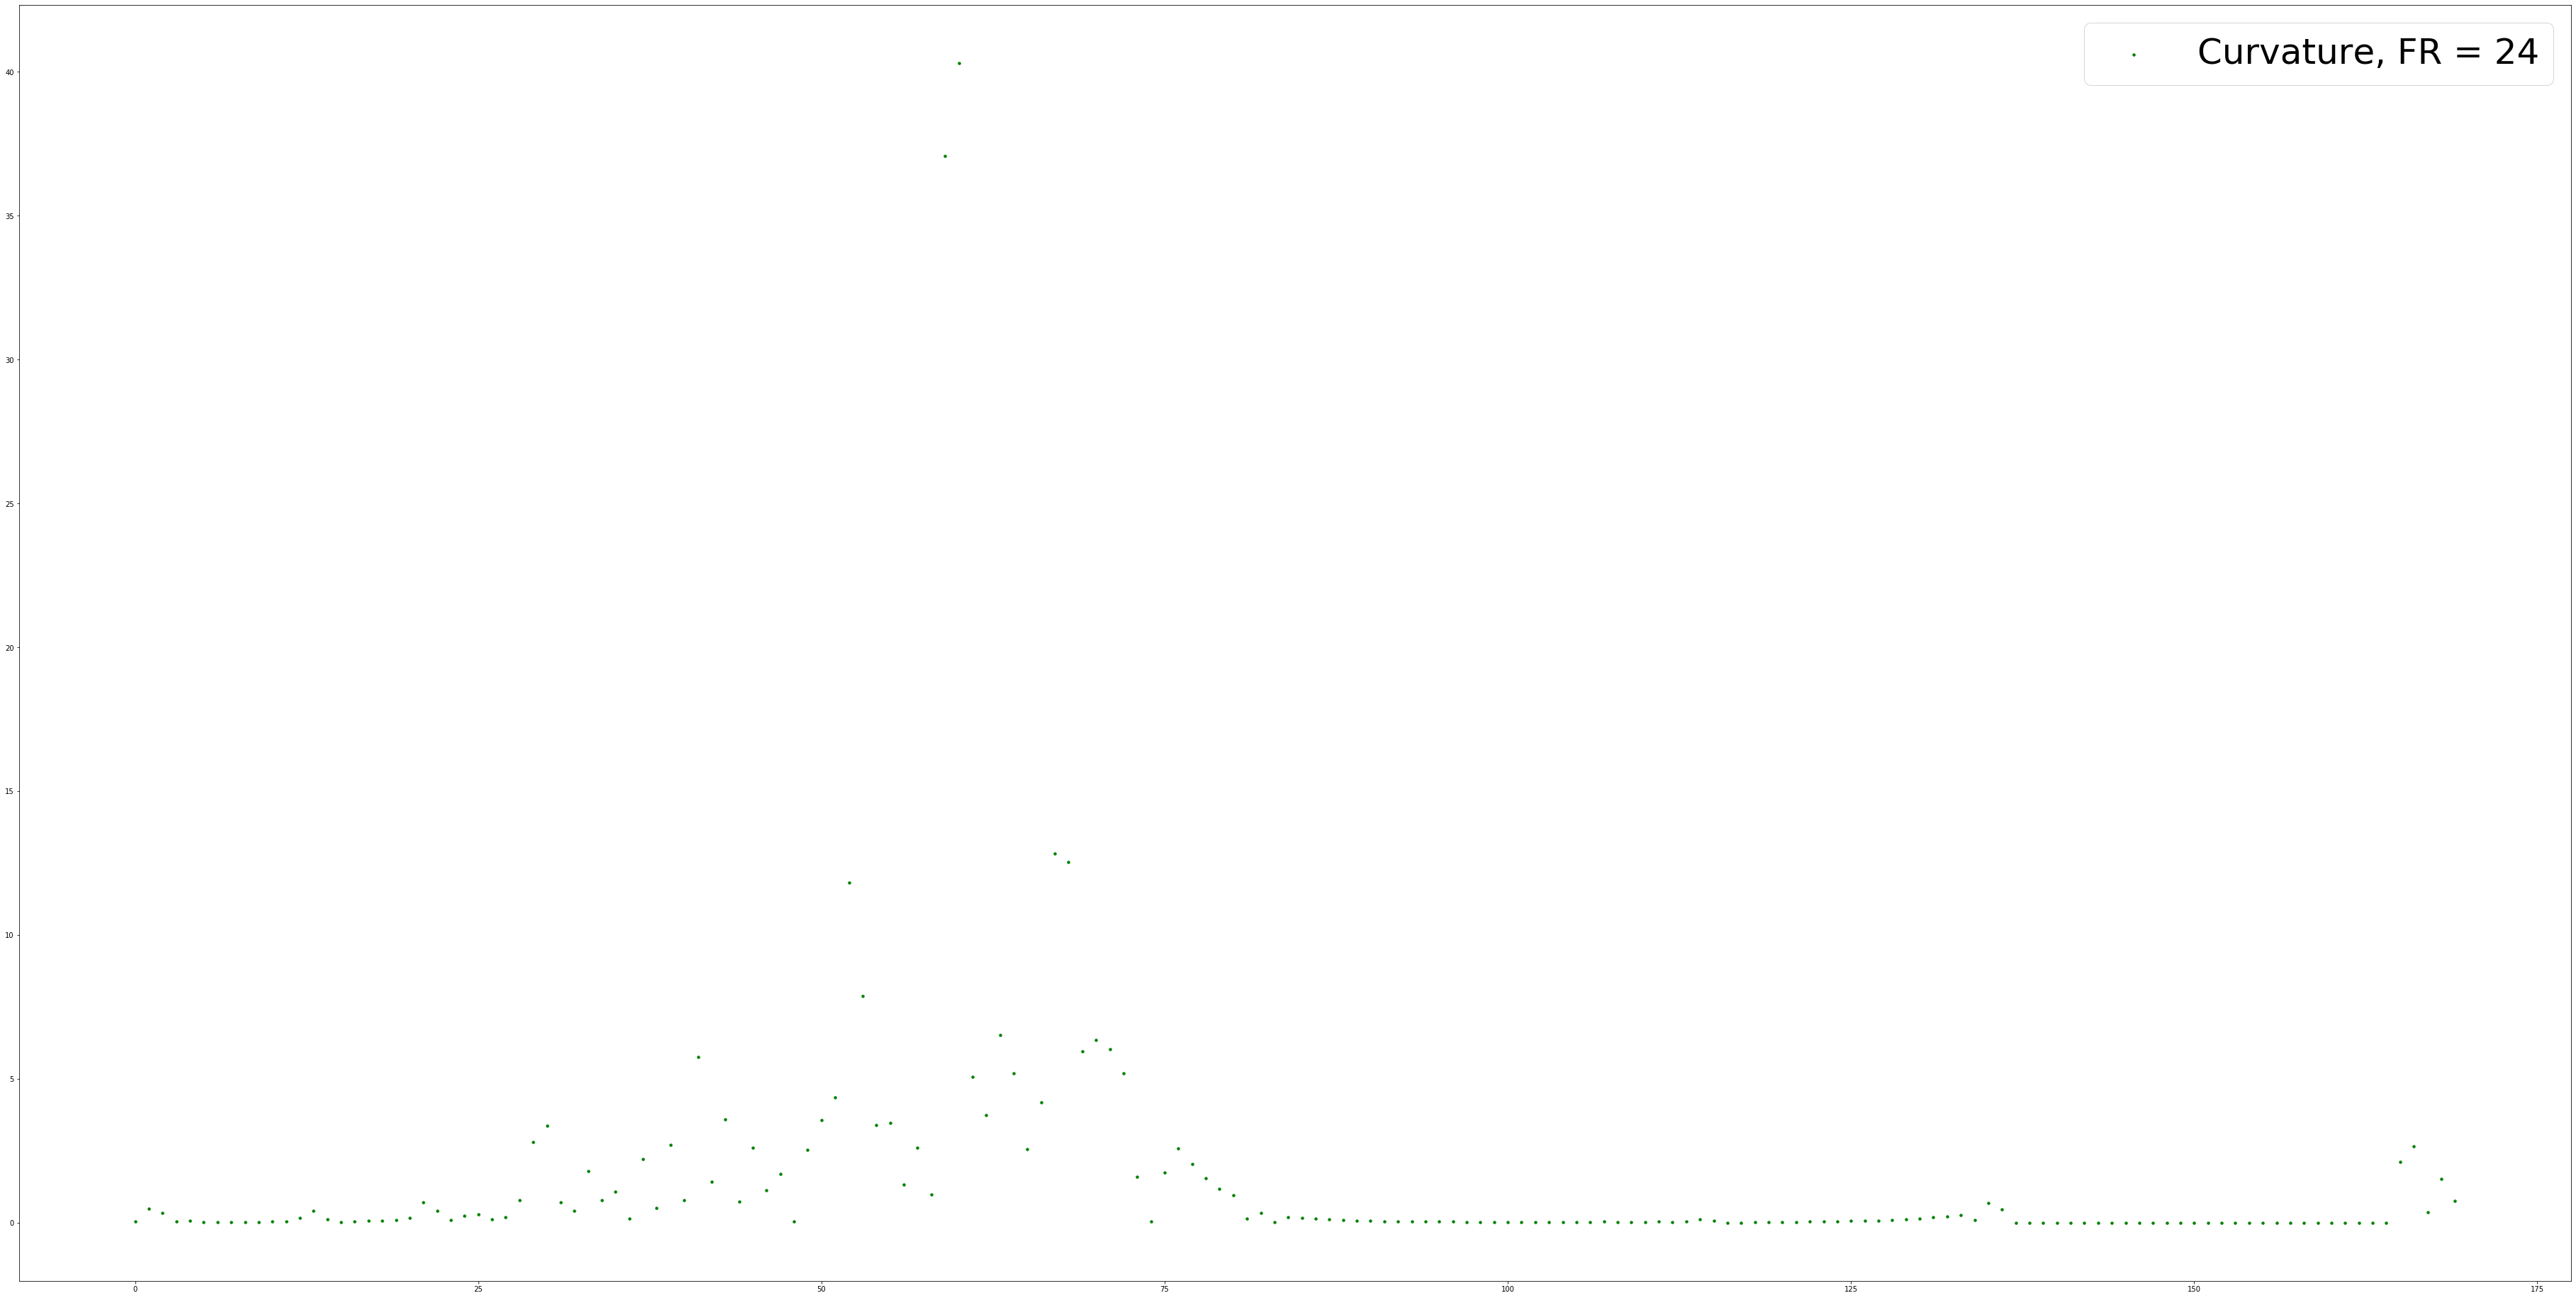

In [21]:
trajectory_old_ord3.PlotCurve(animals_low34[1], mode = 'curvature', zoom_in_for_fr_range = range(50,93))
trajectory_old_ord3.PlotCurve(animals_low34[2], mode = 'curvature', zoom_in_for_fr_range = range(58,108))
trajectory_old_ord3.PlotCurve(animals_high34[0], mode = 'curvature', zoom_in_for_fr_range = range(200,370))

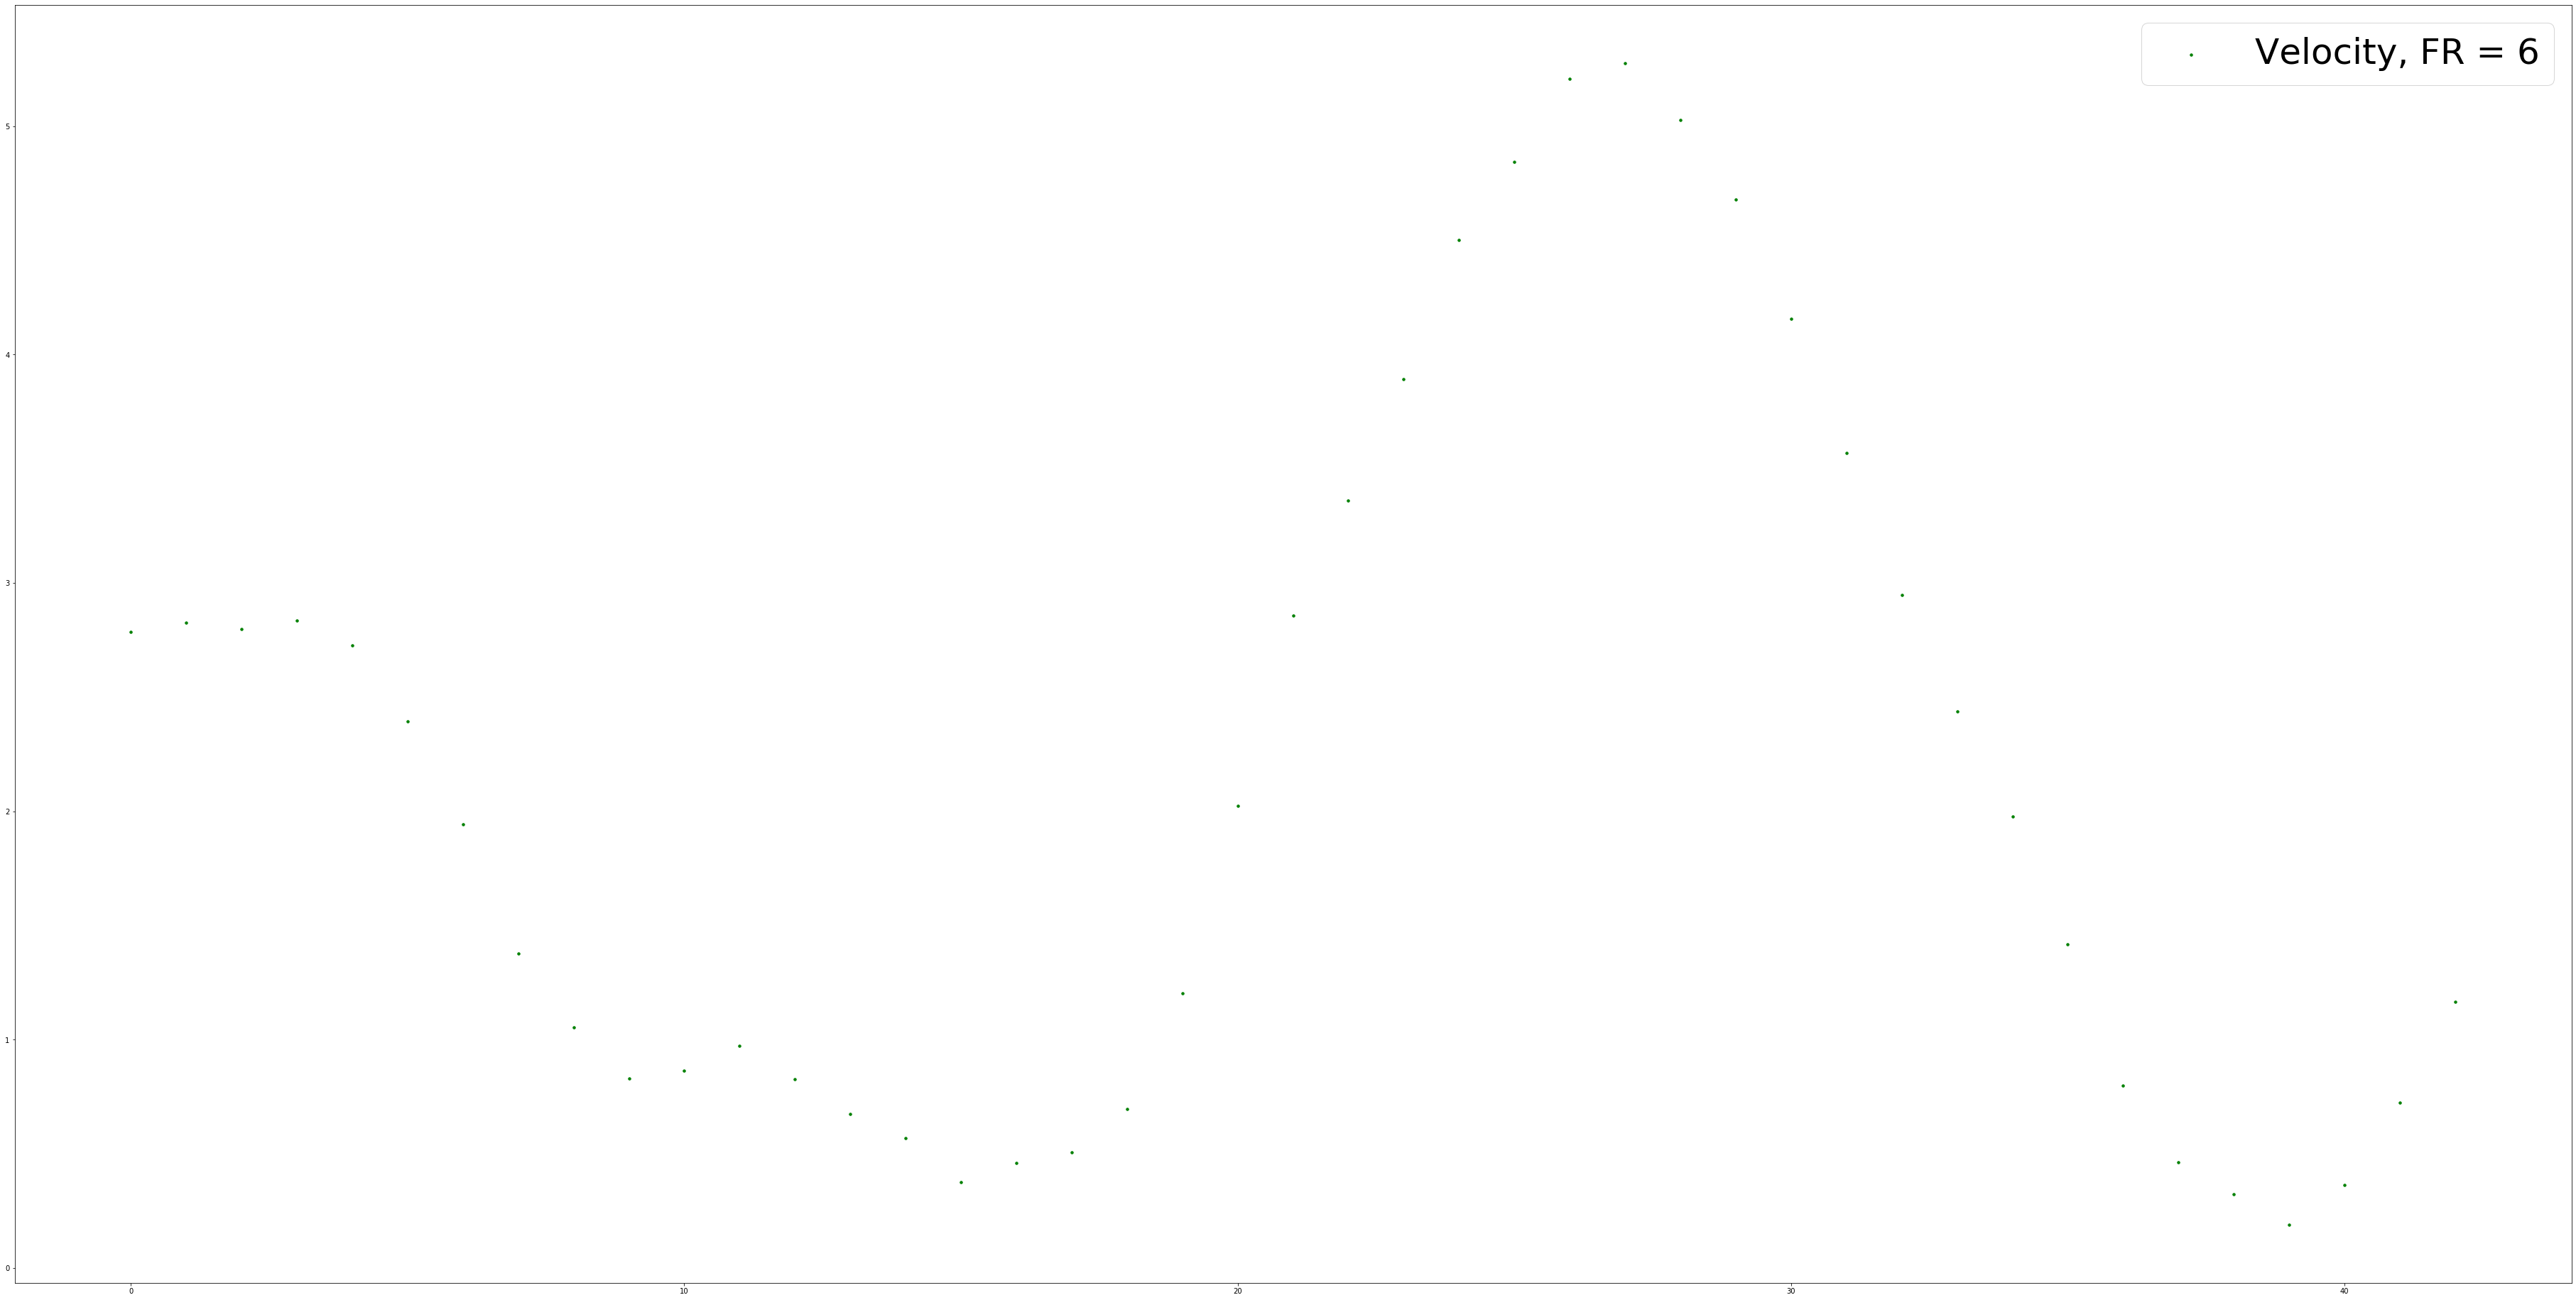

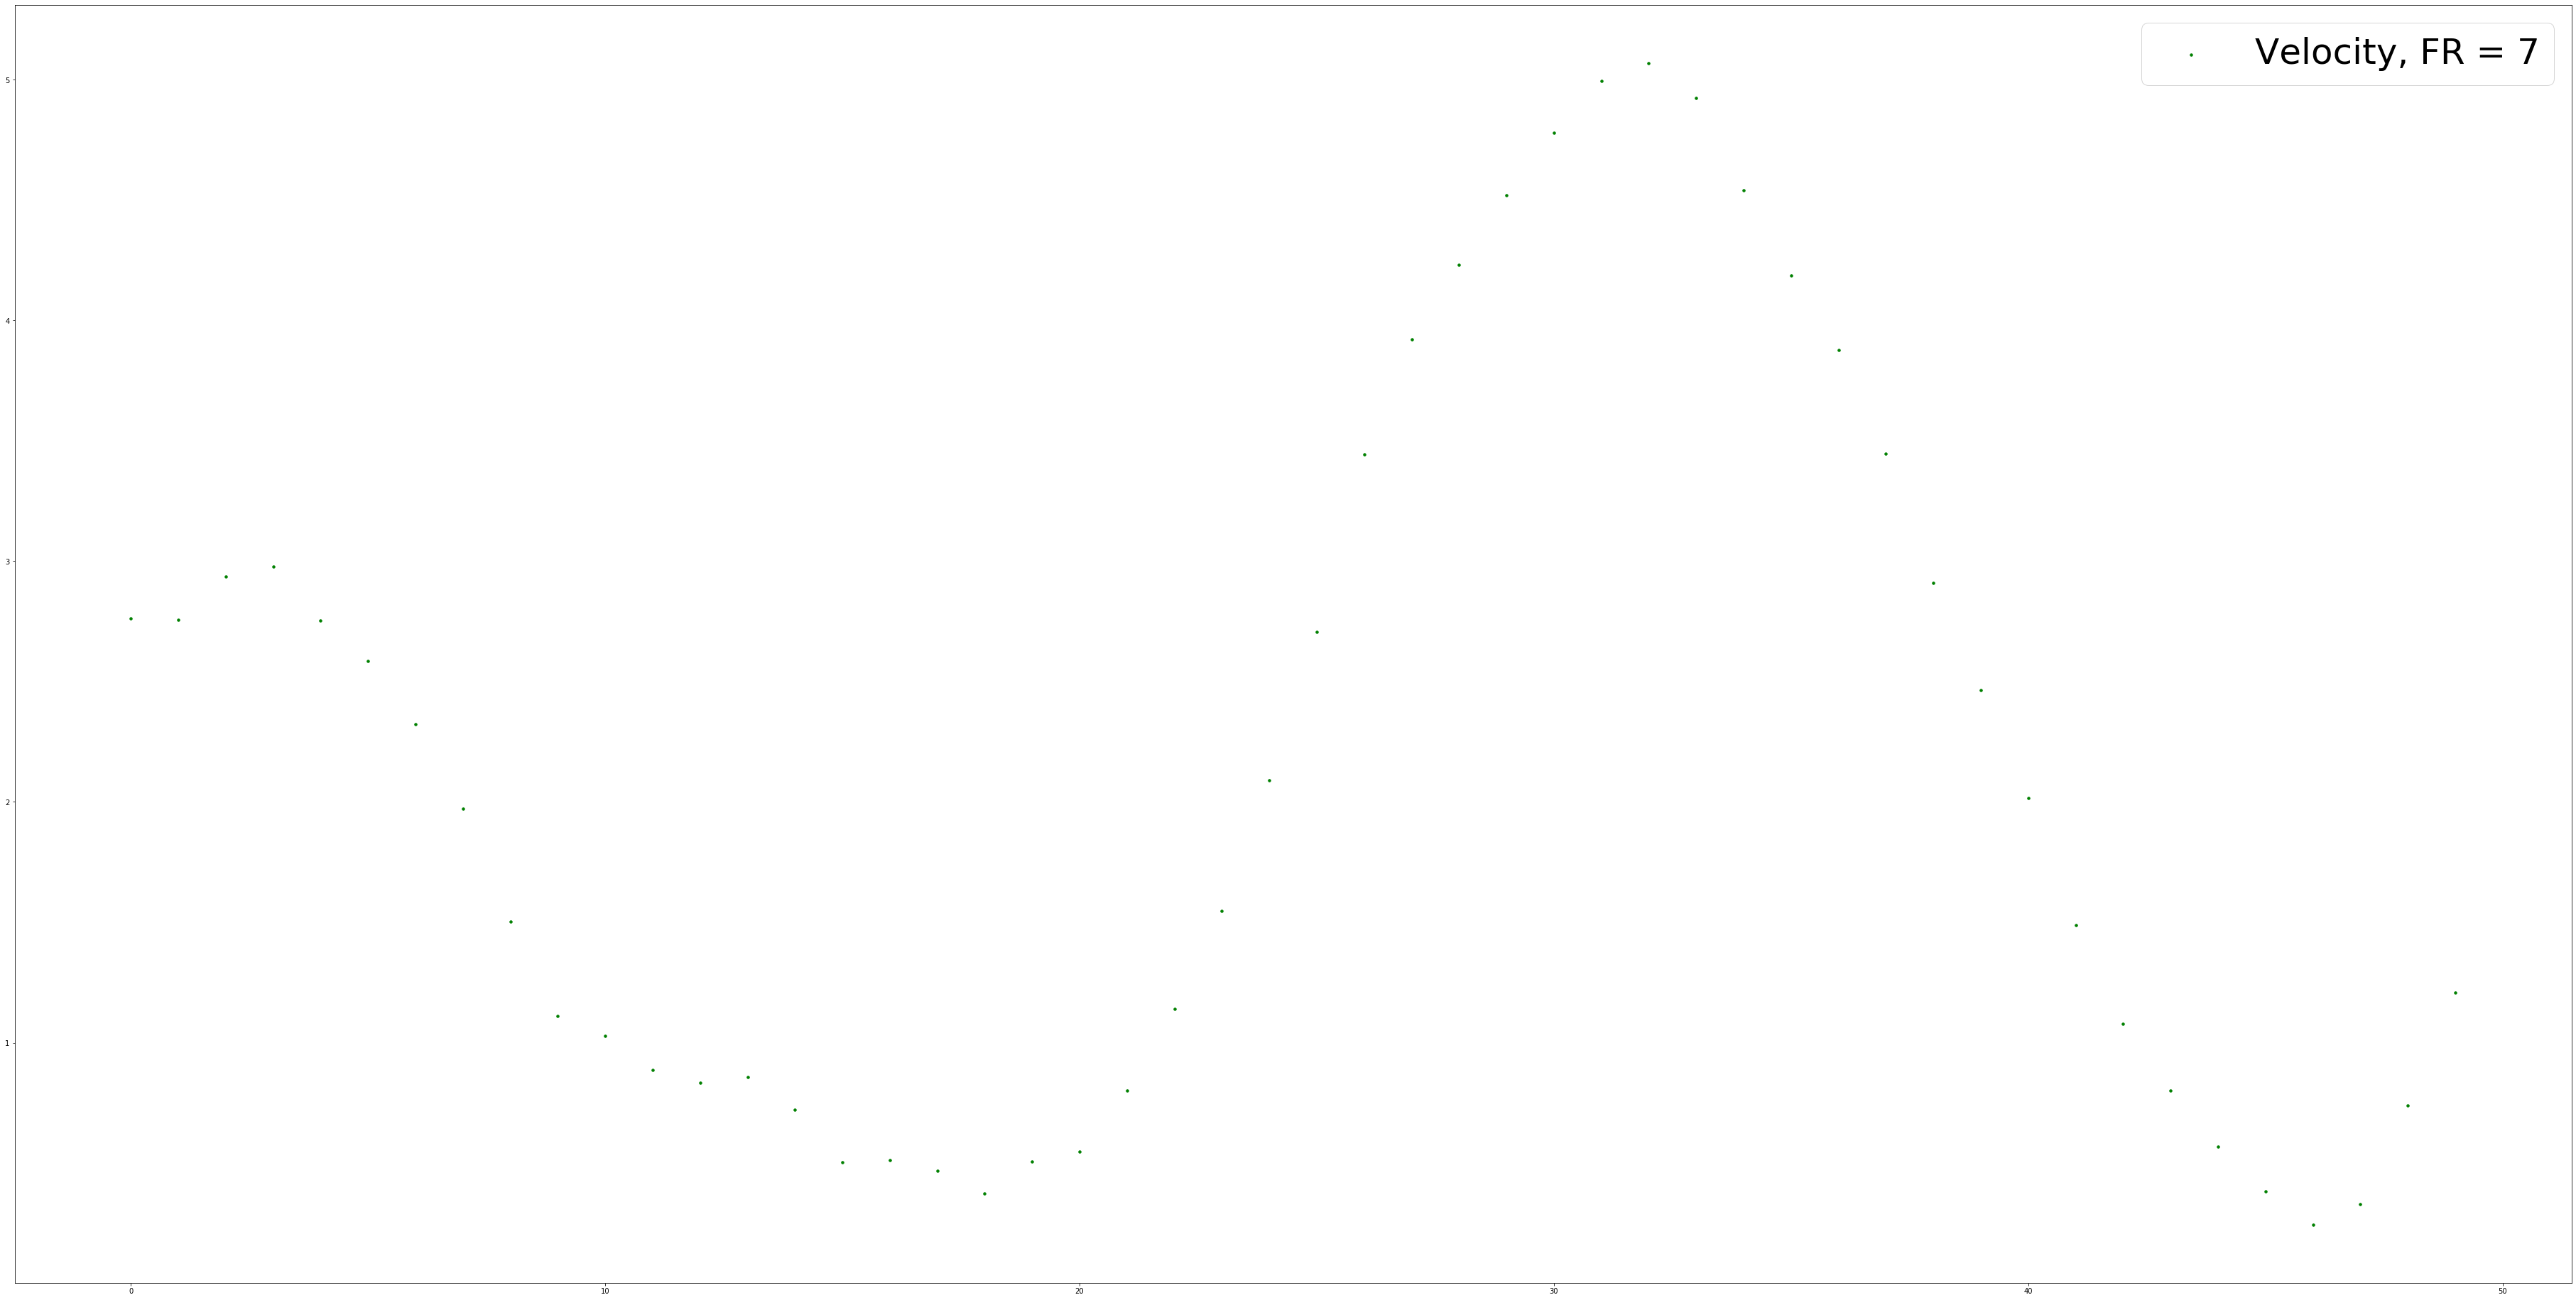

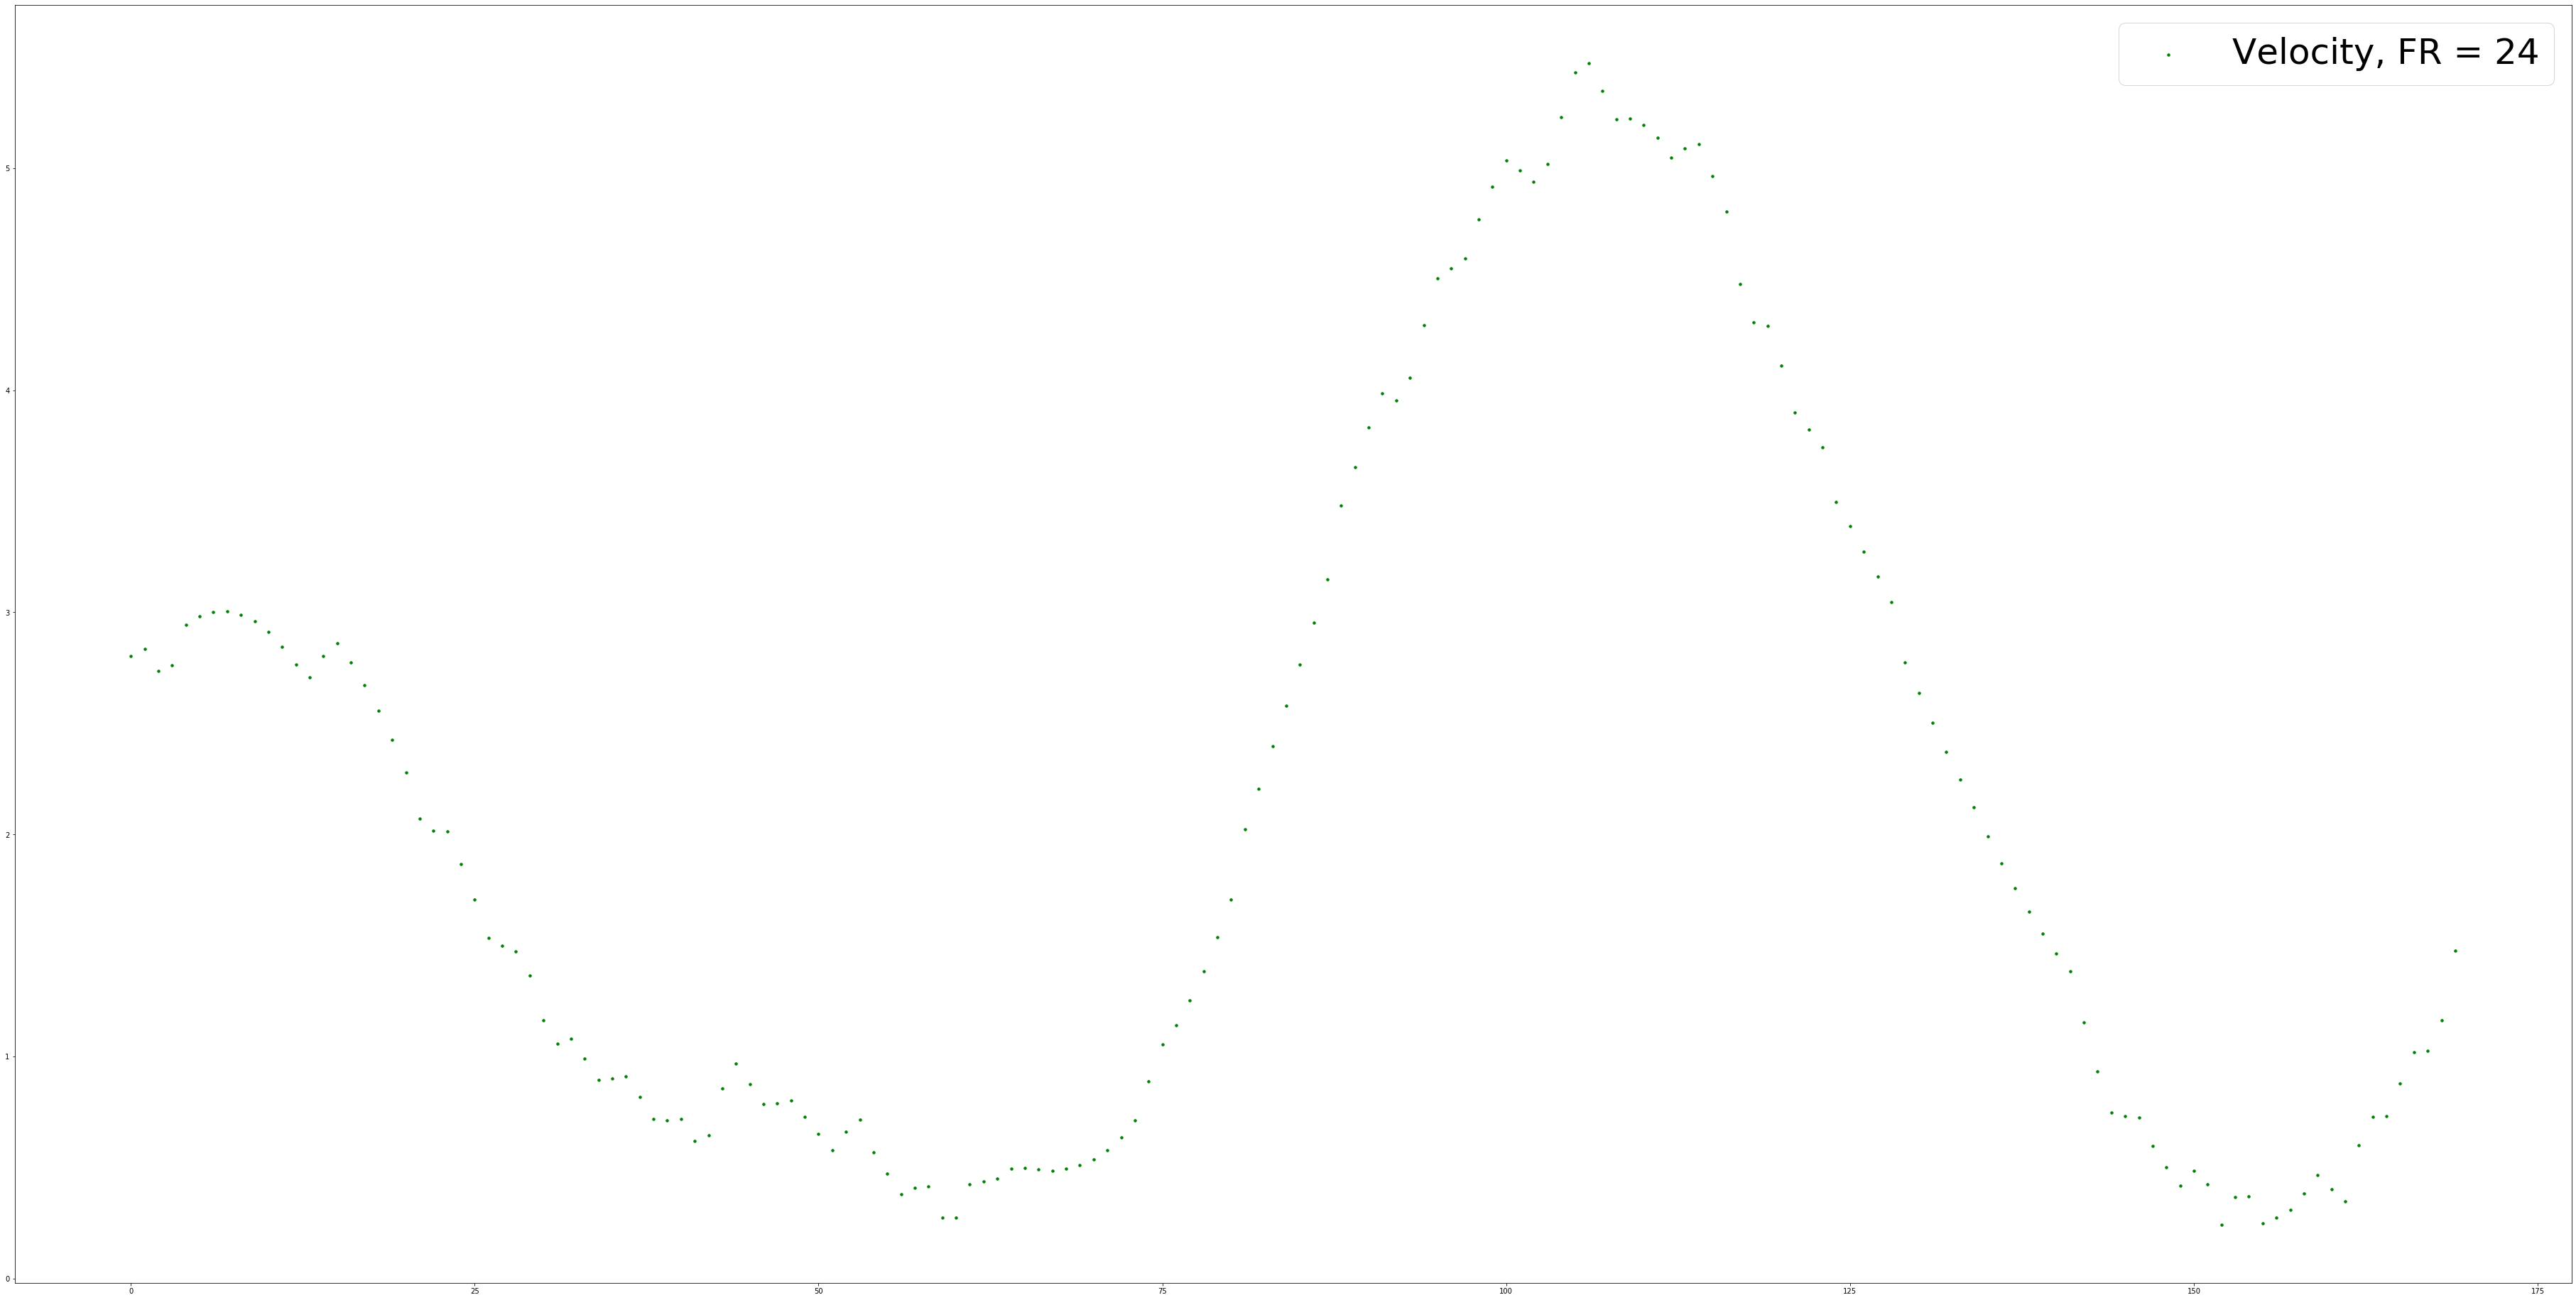

In [22]:
trajectory_old_ord3.PlotCurve(animals_low34[1], mode = 'velocity', zoom_in_for_fr_range = range(50,93))
trajectory_old_ord3.PlotCurve(animals_low34[2], mode = 'velocity', zoom_in_for_fr_range = range(58,108))
trajectory_old_ord3.PlotCurve(animals_high34[0], mode = 'velocity', zoom_in_for_fr_range = range(200,370))